# 관광지별 최적칼럼찾기


In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [205]:
import pandas as pd
seoul=pd.read_csv('/content/drive/MyDrive/웨더고프로젝트/ver1(210717)/seoul.csv')
weather=pd.read_csv('/content/drive/MyDrive/웨더고프로젝트/ver1(210717)/KMAWeatherMonth.csv', encoding='CP949', parse_dates=['일시'] )

In [206]:
weather['지점명'].unique()

array(['서울'], dtype=object)

In [208]:
weather['date'] = weather['일시'].dt.strftime('%Y%m')
weather['date']=weather['date'].astype(int)

In [ ]:
date=weather[['date']]
date

In [3]:
tour=seoul.iloc[:, 51:-1]

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
!pip install catboost

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error , r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import xgboost
import lightgbm
import scipy
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
import catboost
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [7]:
# 원래는 기온, 습도으로 해주어야 하나, 여기서는 평균 기온과 평균 습도로 열지수의 평균을 구해주도록 하겠다.
weather['열지수']=0
i=0

for i in range(0,108):
    Tc=weather.loc[i, '평균기온(°C)']
    T=(Tc*1.8)+32
    R=weather.loc[i, '평균상대습도(%)']*1/100
    
    h1= -42.379
    h2=2.04901523*T
    h3=10.14333127*R
    h4=-0.22475541*T*R
    h5=-6.83783*(pow(10, -3))*((pow(T, 2)))
    h6=-5.481717*(pow(10, -2))*(pow(R, 2))
    h7=1.22874*(pow(10,-3))*T*R
    h8=8.5282*(pow(10, -4))*T*(pow(R, 2))
    h9=-1.99*(pow(10, -6))*(pow(T, 2))*(pow(R, 2))
    
    Heat_index=h1+h2+h3+h4+h5+h6+h7+h8+h9
    
    weather['열지수'][i]=Heat_index
    i+=1

# Model Choice

In [8]:
class regression_select:
    def smape(a, f):
        a=a.values
        a=a.reshape(1,-1)
        f=f.reshape(1,-1)
        score=(1/len(a))*(np.sum(2*np.abs(f-a)/(np.abs(a)+np.abs(f)))*100)
        return score

    def linear(x_train,y_train, x_test, y_test):
        lr=LinearRegression()
        lr.fit(x_train, y_train)
        y_pred=lr.predict(x_test)
        train_score=lr.score(x_train, y_train)
        test_score=lr.score(x_test, y_test)
        mse=mean_squared_error(y_test, y_pred)
        rmse=np.sqrt(mse)
        smape_score=regression_select.smape(y_test, y_pred)
        return rmse, smape_score, train_score, test_score

    def ridge(x_train,y_train, x_test, y_test):
        ridge = Ridge()
        ridge.fit(x_train, y_train)
        y_pred=ridge.predict(x_test)
        train_score=ridge.score(x_train, y_train)
        test_score=ridge.score(x_test, y_test)
        mse=mean_squared_error(y_test, y_pred)
        rmse=np.sqrt(mse)
        smape_score=regression_select.smape(y_test, y_pred)
        return rmse, smape_score, train_score, test_score

    def lasso(x_train,y_train, x_test, y_test):
        lasso = Lasso()
        lasso.fit(x_train, y_train)
        y_pred=lasso.predict(x_test)
        train_score=lasso.score(x_train, y_train)
        test_score=lasso.score(x_test, y_test)
        mse=mean_squared_error(y_test, y_pred)
        rmse=np.sqrt(mse)
        smape_score=regression_select.smape(y_test, y_pred)
        return rmse, smape_score, train_score, test_score

    def elasticnet(x_train,y_train, x_test, y_test):
        en = ElasticNet()
        en.fit(x_train, y_train)
        y_pred=en.predict(x_test)
        train_score=en.score(x_train, y_train)
        test_score=en.score(x_test, y_test)
        mse=mean_squared_error(y_test, y_pred)
        rmse=np.sqrt(mse)
        smape_score=regression_select.smape(y_test, y_pred)
        return rmse, smape_score, train_score, test_score

    def xgboost(x_train,y_train, x_test, y_test):
        xgb = xgboost.XGBRegressor(random_state=42)
        xgb.fit(x_train, y_train)
        y_pred=xgb.predict(x_test)
        train_score=xgb.score(x_train, y_train)
        test_score=xgb.score(x_test, y_test)
        mse=mean_squared_error(y_test, y_pred)
        rmse=np.sqrt(mse)
        smape_score=regression_select.smape(y_test, y_pred)
        return rmse, smape_score, train_score, test_score

    def lgbm(x_train,y_train, x_test, y_test):
         lgbm = lightgbm.LGBMRegressor(random_state=42)
         lgbm.fit(x_train, y_train)
         y_pred=lgbm.predict(x_test)
         train_score=lgbm.score(x_train, y_train)
         test_score=lgbm.score(x_test, y_test)
         mse=mean_squared_error(y_test, y_pred)
         rmse=np.sqrt(mse)
         smape_score=regression_select.smape(y_test, y_pred)
         return rmse, smape_score, train_score, test_score

    def ada(x_train,y_train, x_test, y_test):
         ada = AdaBoostRegressor(random_state=42)
         ada.fit(x_train, y_train)
         y_pred=ada.predict(x_test)
         train_score=ada.score(x_train, y_train)
         test_score=ada.score(x_test, y_test)
         mse=mean_squared_error(y_test, y_pred)
         rmse=np.sqrt(mse)
         smape_score=regression_select.smape(y_test, y_pred)
         return rmse, smape_score, train_score, test_score

    def gradient(x_train,y_train, x_test, y_test):
         gb = GradientBoostingRegressor(random_state=42)
         gb.fit(x_train, y_train)
         y_pred=gb.predict(x_test)
         train_score=gb.score(x_train, y_train)
         test_score=gb.score(x_test, y_test)
         mse=mean_squared_error(y_test, y_pred)
         rmse=np.sqrt(mse)
         smape_score=regression_select.smape(y_test, y_pred)
         return rmse, smape_score, train_score, test_score

    def decision(x_train,y_train, x_test, y_test):
         dt =DecisionTreeRegressor(random_state=42)
         dt.fit(x_train, y_train)
         y_pred=dt.predict(x_test)
         train_score=dt.score(x_train, y_train)
         test_score=dt.score(x_test, y_test)
         mse=mean_squared_error(y_test, y_pred)
         rmse=np.sqrt(mse)
         smape_score=regression_select.smape(y_test, y_pred)
         return rmse, smape_score, train_score, test_score

    def randomforest(x_train,y_train, x_test, y_test):
         rf = RandomForestRegressor(random_state=42)
         rf.fit(x_train, y_train)
         y_pred=rf.predict(x_test)
         train_score=rf.score(x_train, y_train)
         test_score=rf.score(x_test, y_test)
         mse=mean_squared_error(y_test, y_pred)
         rmse=np.sqrt(mse)
         smape_score=regression_select.smape(y_test, y_pred)
         return rmse, smape_score, train_score, test_score

    #def svr(x_train,y_train, x_test, y_test):
        # sv_regressor = SVR(kernel='linear', C=1.0, epsilon=0.1)
        # sv_regressor.fit(x_train, y_train)
        # y_pred=sv_regressor.predict(x_test)
        # train_score=sv_regressor.score(x_train, y_train)
        # test_score=sv_regressor.score(x_test, y_test)
        # mse=mean_squared_error(y_test, y_pred)
        # rmse=np.sqrt(mse)
        #y_test_1=pd.Series(y_test)
        #smape_score=regression_select.smape(y_test_1, y_pred)
        # return rmse, smape_score, train_score, test_score

    def catboost(x_train,y_train, x_test, y_test):
         cb = catboost.CatBoostRegressor(random_state=42)
         cb.fit(x_train, y_train)
         y_pred=cb.predict(x_test)
         train_score=cb.score(x_train, y_train)
         test_score=cb.score(x_test, y_test)
         mse=mean_squared_error(y_test, y_pred)
         rmse=np.sqrt(mse)
         smape_score=regression_select.smape(y_test, y_pred)
         return rmse, smape_score, train_score, test_score

In [9]:
class regression_model:
    def model_choice(x_train,y_train, x_test, y_test):
        model=pd.DataFrame(columns=['모델','rmse','smape','train_score','test_score'])
        linear_rmse=regression_select.linear(x_train,y_train, x_test, y_test)[0]
        linear_smape=regression_select.linear(x_train,y_train, x_test, y_test)[1]
        linear_train_score=regression_select.linear(x_train,y_train, x_test, y_test)[2]
        linear_test_score=regression_select.linear(x_train,y_train, x_test, y_test)[3]

        model=model.append({'모델':'linear', 'rmse':linear_rmse,
                            'smape':linear_smape,
                            'train_score':linear_train_score,
                            'test_score':linear_test_score}, ignore_index=True)
    

        ridge_rmse=regression_select.ridge(x_train,y_train, x_test, y_test)[0]
        ridge_smape=regression_select.ridge(x_train,y_train, x_test, y_test)[1]
        ridge_train_score=regression_select.ridge(x_train,y_train, x_test, y_test)[2]
        ridge_test_score=regression_select.ridge(x_train,y_train, x_test, y_test)[3]

        model=model.append({'모델':'ridge', 'rmse':ridge_rmse,
                            'smape':ridge_smape,
                            'train_score':ridge_train_score,
                            'test_score':ridge_test_score}, ignore_index=True)
        

        lasso_rmse=regression_select.lasso(x_train,y_train, x_test, y_test)[0]
        lasso_smape=regression_select.lasso(x_train,y_train, x_test, y_test)[1]
        lasso_train_score=regression_select.lasso(x_train,y_train, x_test, y_test)[2]
        lasso_test_score=regression_select.lasso(x_train,y_train, x_test, y_test)[3]

        model=model.append({'모델':'lasso', 'rmse':lasso_rmse,
                            'smape':lasso_smape,
                            'train_score':lasso_train_score,
                            'test_score':lasso_test_score}, ignore_index=True)
        

        elasticnet_rmse=regression_select.elasticnet(x_train,y_train, x_test, y_test)[0]
        elasticnet_smape=regression_select.elasticnet(x_train,y_train, x_test, y_test)[1]
        elasticnet_train_score=regression_select.elasticnet(x_train,y_train, x_test, y_test)[2]
        elasticnet_test_score=regression_select.elasticnet(x_train,y_train, x_test, y_test)[3]

        model=model.append({'모델':'elasticnet', 'rmse':elasticnet_rmse,
                            'smape':elasticnet_smape,
                            'train_score':elasticnet_train_score,
                            'test_score':elasticnet_test_score}, ignore_index=True)
        

        xgboost_rmse=regression_select.xgboost(x_train,y_train, x_test, y_test)[0]
        xgboost_smape=regression_select.xgboost(x_train,y_train, x_test, y_test)[1]
        xgboost_train_score=regression_select.xgboost(x_train,y_train, x_test, y_test)[2]
        xgboost_test_score=regression_select.xgboost(x_train,y_train, x_test, y_test)[3]

        model=model.append({'모델':'xgboost', 'rmse':xgboost_rmse,
                            'smape':xgboost_smape,
                            'train_score':xgboost_train_score,
                            'test_score':xgboost_test_score}, ignore_index=True)
    

        lgbm_rmse=regression_select.lgbm(x_train,y_train, x_test, y_test)[0]
        lgbm_smape=regression_select.lgbm(x_train,y_train, x_test, y_test)[1]
        lgbm_train_score=regression_select.lgbm(x_train,y_train, x_test, y_test)[2]
        lgbm_test_score=regression_select.lgbm(x_train,y_train, x_test, y_test)[3]

        model=model.append({'모델':'lightgbm', 'rmse':lgbm_rmse,
                            'smape':lgbm_smape,
                            'train_score':lgbm_train_score,
                            'test_score':lgbm_test_score}, ignore_index=True)

        ada_rmse=regression_select.ada(x_train,y_train, x_test, y_test)[0]
        ada_smape=regression_select.ada(x_train,y_train, x_test, y_test)[1]
        ada_train_score=regression_select.ada(x_train,y_train, x_test, y_test)[2]
        ada_test_score=regression_select.ada(x_train,y_train, x_test, y_test)[3]

        model=model.append({'모델':'ada', 'rmse':ada_rmse,
                            'smape':ada_smape,
                            'train_score':ada_train_score,
                            'test_score':ada_test_score}, ignore_index=True)
        
        gradient_rmse=regression_select.gradient(x_train,y_train, x_test, y_test)[0]
        gradient_smape=regression_select.gradient(x_train,y_train, x_test, y_test)[1]
        gradient_train_score=regression_select.gradient(x_train,y_train, x_test, y_test)[2]
        gradient_test_score=regression_select.gradient(x_train,y_train, x_test, y_test)[3]

        model=model.append({'모델':'gradient', 'rmse':gradient_rmse,
                            'smape':gradient_smape,
                            'train_score':gradient_train_score,
                            'test_score':gradient_test_score}, ignore_index=True)
        
        decision_rmse=regression_select.decision(x_train,y_train, x_test, y_test)[0]
        decision_smape=regression_select.decision(x_train,y_train, x_test, y_test)[1]
        decision_train_score=regression_select.decision(x_train,y_train, x_test, y_test)[2]
        decision_test_score=regression_select.decision(x_train,y_train, x_test, y_test)[3]

        model=model.append({'모델':'decision', 'rmse':decision_rmse,
                            'smape':decision_smape,
                            'train_score':decision_train_score,
                            'test_score':decision_test_score}, ignore_index=True)

        randomforest_rmse=regression_select.randomforest(x_train,y_train, x_test, y_test)[0]
        randomforest_smape=regression_select.randomforest(x_train,y_train, x_test, y_test)[1]
        randomforest_train_score=regression_select.randomforest(x_train,y_train, x_test, y_test)[2]
        randomforest_test_score=regression_select.randomforest(x_train,y_train, x_test, y_test)[3]

        model=model.append({'모델':'randomforest', 'rmse':randomforest_rmse,
                            'smape':randomforest_smape,
                            'train_score':randomforest_train_score,
                            'test_score':randomforest_test_score}, ignore_index=True)
        
        #svr_rmse=regression_select.svr(x_train,y_train, x_test, y_test)[0]
        #svr_smape=regression_select.svr(x_train,y_train, x_test, y_test)[1]
        #svr_train_score=regression_select.svr(x_train,y_train, x_test, y_test)[2]
        #svr_test_score=regression_select.svr(x_train,y_train, x_test, y_test)[3]

        #model=model.append({'모델':'svr', 'rmse':svr_rmse,
        #                     'smape':svr_smape
         #                   'train_score':svr_train_score,
         #                   'test_score':svr_test_score}, ignore_index=True)
        

        catboost_rmse=regression_select.catboost(x_train,y_train, x_test, y_test)[0]
        catboost_smape=regression_select.catboost(x_train,y_train, x_test, y_test)[1]
        catboost_train_score=regression_select.catboost(x_train,y_train, x_test, y_test)[2]
        catboost_test_score=regression_select.catboost(x_train,y_train, x_test, y_test)[3]

        model=model.append({'모델':'catboost', 'rmse':catboost_rmse,
                            'smape':catboost_smape,
                            'train_score':catboost_train_score,
                            'test_score':catboost_test_score}, ignore_index=True)
              
        model=model.sort_values('test_score', ascending=False)

        return model

In [10]:
def model_list(df, df_2):
    df=df
    df_2=df_2
    x_train=df.iloc[:-12, :]
    y_train=df_2.iloc[:-12, :]
    x_test=df.iloc[-12:, :]
    y_test=df_2.iloc[-12:, :]
    model_choice=regression_model.model_choice(x_train, y_train, x_test, y_test)
    return model_choice

In [11]:
df_weather=weather.iloc[:, 3:]
df_weather.head(1)

,평균기온(°C),평균최고기온(°C),평균최저기온(°C),최고기온(°C),최저기온(°C),최고기온 나타난날(yyyymmdd),최저기온 나타난날(yyyymmdd),평균현지기압(hPa),평균해면기압(hPa),최고해면기압(hPa),최저해면기압(hPa),최고해면기압 나타난날(yyyymmdd),최저해면기압 나타난날(yyyymmdd),평균수증기압(hPa),최고수증기압(hPa),최저수증기압(hPa),최고수증기압 나타난날(yyyymmdd),최저수증기압 나타난날(yyyymmdd),평균이슬점온도(°C),평균상대습도(%),최소상대습도(%),최소상대습도 나타난날(yyyymmdd),월합강수량(00~24h만)(mm),일최다강수량(mm),1시간최다강수량(mm),10분최다강수량(mm),일최다강수량 나타난날(yyyymmdd),1시간최다강수량 나타난날(yyyymmdd),10분최다강수량 나타난날(yyyymmdd),소형총증발량(mm),소형일최대증발량(mm),대형총증발량(mm),대형일최대증발량(mm),소형일최대증발량 나타난날(yyyymmdd),대형일최대증발량 나타난날(yyyymmdd),평균풍속(m/s),최대풍속(m/s),최대순간풍속(m/s),최대풍속 풍향(16방위),최대순간풍속 풍향(16방위),최대풍속 나타난날(yyyymmdd),최대순간풍속 나타난날(yyyymmdd),최다풍향(16방위),평균운량(1/10),평균중하층운량(1/10),합계 일조시간(hr),일조율(%),합계 일사량(MJ/m2),최심적설(cm),최심신적설(cm),3시간신적설합(cm),최심적설 나타난날(yyyymmdd),최심신적설 나타난날(yyyymmdd),평균 최저초상온도(°C),최저초상온도(°C),최저초상온도 나타난날(yyyymmdd),평균지면온도(°C),0.05m평균지중온도(°C),0.1m평균지중온도(°C),0.2m평균지중온도(°C),0.3m평균지중온도(°C),0.5m평균지중온도(°C),1.0m평균지중온도(°C),1.5m평균지중온도(°C),3.0m평균지중온도(°C),5.0m평균지중온도(°C),열지수
0,-7.2,-3.4,-10.5,0.3,-17.8,20110114,20110116,1016.1,1027.3,1039.6,1014.9,20110127,20110111,2.0,4.5,0.7,20110123,20110116,-15.3,54,19,20110119,8.9,5.3,NaN,NaN,20110123,NaN,NaN,37.5,1.7,NaN,NaN,20110112,NaN,2.8,8.0,14.4,270,320,20110115,20110115,270,2.7,1.8,218.5,71.15,308.49,6.0,6.0,12.2,20110124.0,20110123.0,-16.1,-22.2,20110117,-4.7,-3.3,-2.7,-2.2,-1.1,1.5,5.3,8.3,14.6,17.2,-2


In [114]:
df_weather=df_weather.fillna(0)

경복궁
--

In [ ]:
x=df_weather.copy()
y=tour.iloc[:, 0]
y=pd.DataFrame(y)

In [ ]:
result1=model_list(x, y)

In [ ]:
result1

,모델,rmse,smape,train_score,test_score
6,ada,64478.483088,194.602198,0.915948,0.579846
9,randomforest,66564.792581,230.803163,0.947170,0.552216
4,xgboost,71972.981284,245.405290,0.996575,0.476498
7,gradient,73958.834878,252.490046,0.998651,0.447211
3,elasticnet,81750.434705,240.160729,0.815472,0.324603
8,decision,83055.259633,289.122476,1.000000,0.302870
5,lightgbm,96844.565712,320.571282,0.909707,0.052172
2,lasso,108700.933692,392.825196,0.881871,-0.194114
1,ridge,136389.457688,741.219528,0.937702,-0.879926
0,linear,170846.693757,949.129105,0.948819,-1.949798


종묘
--

In [ ]:
x=df_weather.copy()
y=tour.iloc[:, 1]
y=pd.DataFrame(y)

In [ ]:
result2=model_list(x, y)

In [ ]:
result2

,모델,rmse,smape,train_score,test_score
6,ada,10321.758954,315.370811,0.901212,0.079560
5,lightgbm,11932.511811,426.747490,0.888906,-0.230133
4,xgboost,13625.663961,383.735877,0.996749,-0.603997
3,elasticnet,15970.111429,582.047036,0.635589,-1.203455
9,randomforest,17721.804187,485.769513,0.940048,-1.713340
7,gradient,20974.822764,561.558829,0.997856,-2.800886
2,lasso,21917.224433,730.473971,0.716315,-3.150108
8,decision,23018.014758,594.525785,1.000000,-3.577454
1,ridge,27707.803201,1021.090294,0.846652,-5.632732
0,linear,31144.782677,1181.494389,0.886448,-7.380287


창경궁
--

In [ ]:
x=df_weather.copy()
y=tour.iloc[:, 2]
y=pd.DataFrame(y)

In [ ]:
result3=model_list(x, y)

In [ ]:
result3

,모델,rmse,smape,train_score,test_score
7,gradient,17022.926144,315.988679,0.998864,0.572871
9,randomforest,17875.737085,274.224706,0.948520,0.529003
5,lightgbm,18668.957540,277.942846,0.942741,0.486275
6,ada,18697.225121,320.441608,0.914398,0.484718
4,xgboost,18948.640794,302.061705,0.998169,0.470767
3,elasticnet,22969.511723,407.184403,0.809193,0.222332
8,decision,24297.826641,391.299192,1.000000,0.129787
1,ridge,25107.565725,552.297667,0.886476,0.070820
2,lasso,26947.938802,418.440283,0.835243,-0.070389
0,linear,32164.426141,689.066859,0.901713,-0.524903


창덕궁
--

In [ ]:
x=df_weather.copy()
y=tour.iloc[:, 3]
y=pd.DataFrame(y)
result4=model_list(x, y)

In [ ]:
result4

,모델,rmse,smape,train_score,test_score
4,xgboost,26276.509497,267.876265,0.996587,0.724204
5,lightgbm,27691.826573,281.683156,0.922413,0.693694
6,ada,29655.228993,261.841302,0.920970,0.648719
9,randomforest,32138.289324,265.031110,0.948956,0.587430
7,gradient,37455.769091,255.615132,0.999030,0.439611
3,elasticnet,39960.611124,372.130209,0.801786,0.362153
2,lasso,48055.128673,467.648542,0.831822,0.077573
1,ridge,51382.354935,821.161118,0.909506,-0.054582
8,decision,52171.551629,417.265588,1.000000,-0.087226
0,linear,64393.322599,865.412931,0.930108,-0.656282


남산골한옥마을
--

In [ ]:
x=df_weather.copy()
y=tour.iloc[:, 4]
y=pd.DataFrame(y)
result5=model_list(x, y)

In [ ]:
result5

,모델,rmse,smape,train_score,test_score
6,ada,17295.826749,146.344146,0.939098,0.771352
9,randomforest,19452.039646,169.334372,0.965498,0.710788
7,gradient,20409.730355,178.905285,0.999327,0.681610
4,xgboost,21038.046968,228.326749,0.998458,0.661705
5,lightgbm,25482.883153,240.313727,0.966202,0.503656
3,elasticnet,36663.475454,452.553410,0.832619,-0.027431
8,decision,37305.169880,392.802298,1.000000,-0.063710
2,lasso,45333.928446,589.034190,0.889690,-0.570840
1,ridge,48124.067026,689.838095,0.934433,-0.770149
0,linear,61205.228917,893.514532,0.947120,-1.863270


덕수궁
--

In [ ]:
x=df_weather.copy()
y=tour.iloc[:, 5]
y=pd.DataFrame(y)
result6=model_list(x, y)

In [ ]:
result6

,모델,rmse,smape,train_score,test_score
3,elasticnet,53380.063597,346.344726,0.557691,0.054412
7,gradient,53844.320023,337.060373,0.997806,0.037893
9,randomforest,63826.052590,480.662936,0.895921,-0.351884
6,ada,65348.061166,454.011867,0.900773,-0.417128
2,lasso,67834.637188,416.314063,0.655075,-0.527026
4,xgboost,68321.365393,434.882001,0.995611,-0.549019
5,lightgbm,68641.983522,495.766094,0.685395,-0.563591
1,ridge,72337.510257,610.853447,0.822889,-0.736484
8,decision,74474.968440,466.917832,1.000000,-0.840620
0,linear,75806.351332,637.871922,0.871469,-0.907018


서울시립미술관 본관
--

In [ ]:
x=df_weather.copy()
y=tour.iloc[:, 6]
y=pd.DataFrame(y)
result7=model_list(x, y)

In [ ]:
result7

,모델,rmse,smape,train_score,test_score
8,decision,66366.862664,322.496668,1.000000,0.173861
9,randomforest,69046.289367,340.586700,0.865028,0.105807
3,elasticnet,70548.400912,476.512261,0.509579,0.066477
5,lightgbm,71670.924312,370.655455,0.804969,0.036533
6,ada,72254.967978,349.776021,0.813332,0.020767
7,gradient,74464.908793,395.763117,0.990742,-0.040050
4,xgboost,74504.959040,422.836468,0.990184,-0.041169
2,lasso,89269.659439,706.789302,0.605982,-0.494715
1,ridge,156801.676994,1486.971916,0.827114,-3.611605
0,linear,194415.136035,1511.136409,0.867162,-6.089423


국립중앙박물관
--

In [ ]:
x=df_weather.copy()
y=tour.iloc[:, 7]
y=pd.DataFrame(y)
result8=model_list(x, y)

In [ ]:
result8

,모델,rmse,smape,train_score,test_score
4,xgboost,31806.732860,136.010225,0.994388,0.851520
7,gradient,39310.625190,155.054624,0.996086,0.773196
9,randomforest,41420.248226,168.404431,0.912604,0.748200
8,decision,41998.987788,172.713212,1.000000,0.741114
6,ada,43764.727239,194.836300,0.831372,0.718888
5,lightgbm,67369.131407,185.796531,0.859391,0.333880
3,elasticnet,70465.542160,260.179253,0.614662,0.271241
2,lasso,80822.869277,338.418223,0.692053,0.041264
1,ridge,95796.611965,409.647122,0.807021,-0.346886
0,linear,103829.837434,456.353333,0.820607,-0.582249


태릉 · 강릉 · 조선왕릉전시관
--

In [ ]:
x=df_weather.copy()
y=tour.iloc[:, 8]
y=pd.DataFrame(y)
result9=model_list(x, y)

In [ ]:
result9

,모델,rmse,smape,train_score,test_score
6,ada,2667.051138,373.241103,0.924369,0.848715
4,xgboost,2908.526065,398.432935,0.998333,0.820080
7,gradient,3002.267982,437.318581,0.999190,0.808296
8,decision,3502.674609,488.066370,1.000000,0.739065
9,randomforest,3809.231073,356.278247,0.940462,0.691391
5,lightgbm,3856.432177,437.590048,0.936160,0.683696
3,elasticnet,4242.008412,369.180040,0.740268,0.617284
2,lasso,4266.569010,556.791278,0.809519,0.612840
1,ridge,5107.802349,907.731873,0.890625,0.445117
0,linear,6530.759868,1032.765272,0.920092,0.092888


서대문자연사박물관
--

In [ ]:
x=df_weather.copy()
y=tour.iloc[:, 9]
y=pd.DataFrame(y)
result10=model_list(x, y)

In [ ]:
result10

,모델,rmse,smape,train_score,test_score
9,randomforest,5829.085024,256.189760,0.900701,-0.023434
4,xgboost,5896.076430,241.754635,0.995212,-0.047093
7,gradient,5948.565481,256.309979,0.996616,-0.065819
6,ada,6181.239294,251.521720,0.843629,-0.150828
5,lightgbm,6510.357573,249.258741,0.846749,-0.276641
8,decision,10135.525143,591.563907,1.000000,-2.094223
3,elasticnet,10806.596892,355.770164,0.527026,-2.517524
2,lasso,11204.805363,457.218708,0.630946,-2.781532
1,ridge,13821.781962,527.578764,0.760703,-4.754230
0,linear,14458.514996,602.419488,0.780140,-5.296606


서대문형무소역사관
--

In [ ]:
x=df_weather.copy()
y=tour.iloc[:, 10]
y=pd.DataFrame(y)
result11=model_list(x, y)

In [ ]:
result11

,모델,rmse,smape,train_score,test_score
3,elasticnet,32649.131634,480.995723,0.602425,0.106412
7,gradient,33097.945952,427.212171,0.997762,0.081675
9,randomforest,33725.132282,438.284101,0.907679,0.046542
4,xgboost,34982.609200,465.248184,0.994722,-0.025885
5,lightgbm,35131.889963,485.461143,0.869338,-0.034659
6,ada,38287.658699,519.624362,0.892607,-0.228887
2,lasso,38632.978339,586.809663,0.699222,-0.251153
8,decision,44029.883549,649.499742,1.000000,-0.625134
1,ridge,50644.542761,954.022197,0.809747,-1.150104
0,linear,61319.602894,1239.879237,0.830902,-2.152048


트릭아이미술관
--

In [ ]:
x=df_weather.copy()
y=tour.iloc[:, 11]
y=pd.DataFrame(y)
result12=model_list(x, y)

In [ ]:
result12

,모델,rmse,smape,train_score,test_score
4,xgboost,3250.999643,514.958918,0.997476,-3.823319
9,randomforest,4417.552855,600.773153,0.916168,-7.905855
6,ada,4604.397347,864.190700,0.945011,-8.675150
8,decision,5446.345885,523.498117,1.000000,-12.537004
7,gradient,6020.088740,576.613025,0.999124,-15.539330
5,lightgbm,7566.039232,1009.482665,0.758632,-25.124579
3,elasticnet,8459.118758,1829.919558,0.703331,-31.655953
1,ridge,8601.061455,1578.280599,0.879092,-32.761072
2,lasso,9216.743132,1567.680751,0.769118,-37.767437
0,linear,10213.203308,1785.459253,0.903169,-46.603192


헌릉ㆍ인릉
--

In [ ]:
x=df_weather.copy()
y=tour.iloc[:, 12]
y=pd.DataFrame(y)
result13=model_list(x, y)

In [ ]:
result13

,모델,rmse,smape,train_score,test_score
9,randomforest,1528.182885,357.239727,0.962198,0.451479
4,xgboost,1560.460966,386.836861,0.999273,0.428062
7,gradient,1572.006446,393.149647,0.999502,0.419568
5,lightgbm,1668.095339,454.981100,0.974018,0.346441
6,ada,1670.391068,392.427510,0.953616,0.344641
3,elasticnet,1873.726112,502.555329,0.889793,0.175377
2,lasso,1892.498079,664.420782,0.910426,0.158772
8,decision,1897.939475,446.591173,1.000000,0.153927
1,ridge,1911.173190,644.015867,0.939129,0.142087
0,linear,2034.525284,805.379705,0.953908,0.027770


선릉·정릉
--

In [ ]:
x=df_weather.copy()
y=tour.iloc[:, 13]
y=pd.DataFrame(y)
result14=model_list(x, y)

In [ ]:
result14

,모델,rmse,smape,train_score,test_score
5,lightgbm,6470.362560,190.966429,0.919899,0.763840
9,randomforest,6637.297767,175.436318,0.950644,0.751497
6,ada,7111.570692,195.024390,0.954559,0.714714
7,gradient,7298.251812,197.905500,0.999156,0.699539
4,xgboost,7324.206575,202.685254,0.996529,0.697399
3,elasticnet,7426.829849,251.721704,0.818190,0.688859
8,decision,8150.577577,221.458071,1.000000,0.625263
2,lasso,8672.978995,285.460239,0.882388,0.575687
0,linear,8705.875212,404.823980,0.926030,0.572462
1,ridge,10706.943523,473.488602,0.907147,0.353333


#최적 칼럼 찾기 

Hypothesis 1. MODEL Focusing to 2019 TEST 
--

adaboost regressor의 경우에는 초기값에 따라 결과가 계속 바뀌므로, 모델 후보에서 제외 해줍니다.

In [13]:
class regression_columns:
    def model_choice(x_train,y_train, x_test, y_test, i):
        model=pd.DataFrame(columns=['모델','column_num','rmse','smape','train_score','test_score'])
        linear_rmse=regression_select.linear(x_train,y_train, x_test, y_test)[0]
        linear_smape=regression_select.linear(x_train,y_train, x_test, y_test)[1]
        linear_train_score=regression_select.linear(x_train,y_train, x_test, y_test)[2]
        linear_test_score=regression_select.linear(x_train,y_train, x_test, y_test)[3]

        model=model.append({'모델':'linear','column_num':i, 'rmse':linear_rmse,
                            'smape':linear_smape,
                            'train_score':linear_train_score,
                            'test_score':linear_test_score}, ignore_index=True)
    

        ridge_rmse=regression_select.ridge(x_train,y_train, x_test, y_test)[0]
        ridge_smape=regression_select.ridge(x_train,y_train, x_test, y_test)[1]
        ridge_train_score=regression_select.ridge(x_train,y_train, x_test, y_test)[2]
        ridge_test_score=regression_select.ridge(x_train,y_train, x_test, y_test)[3]

        model=model.append({'모델':'ridge','column_num':i, 'rmse':ridge_rmse,
                            'smape':ridge_smape,
                            'train_score':ridge_train_score,
                            'test_score':ridge_test_score}, ignore_index=True)
        

        lasso_rmse=regression_select.lasso(x_train,y_train, x_test, y_test)[0]
        lasso_smape=regression_select.lasso(x_train,y_train, x_test, y_test)[1]
        lasso_train_score=regression_select.lasso(x_train,y_train, x_test, y_test)[2]
        lasso_test_score=regression_select.lasso(x_train,y_train, x_test, y_test)[3]

        model=model.append({'모델':'lasso','column_num':i, 'rmse':lasso_rmse,
                            'smape':lasso_smape,
                            'train_score':lasso_train_score,
                            'test_score':lasso_test_score}, ignore_index=True)
        

        elasticnet_rmse=regression_select.elasticnet(x_train,y_train, x_test, y_test)[0]
        elasticnet_smape=regression_select.elasticnet(x_train,y_train, x_test, y_test)[1]
        elasticnet_train_score=regression_select.elasticnet(x_train,y_train, x_test, y_test)[2]
        elasticnet_test_score=regression_select.elasticnet(x_train,y_train, x_test, y_test)[3]

        model=model.append({'모델':'elasticnet','column_num':i, 'rmse':elasticnet_rmse,
                            'smape':elasticnet_smape,
                            'train_score':elasticnet_train_score,
                            'test_score':elasticnet_test_score}, ignore_index=True)
        

        xgboost_rmse=regression_select.xgboost(x_train,y_train, x_test, y_test)[0]
        xgboost_smape=regression_select.xgboost(x_train,y_train, x_test, y_test)[1]
        xgboost_train_score=regression_select.xgboost(x_train,y_train, x_test, y_test)[2]
        xgboost_test_score=regression_select.xgboost(x_train,y_train, x_test, y_test)[3]

        model=model.append({'모델':'xgboost','column_num':i, 'rmse':xgboost_rmse,
                            'smape':xgboost_smape,
                            'train_score':xgboost_train_score,
                            'test_score':xgboost_test_score}, ignore_index=True)
    

        lgbm_rmse=regression_select.lgbm(x_train,y_train, x_test, y_test)[0]
        lgbm_smape=regression_select.lgbm(x_train,y_train, x_test, y_test)[1]
        lgbm_train_score=regression_select.lgbm(x_train,y_train, x_test, y_test)[2]
        lgbm_test_score=regression_select.lgbm(x_train,y_train, x_test, y_test)[3]

        model=model.append({'모델':'lightgbm','column_num':i, 'rmse':lgbm_rmse,
                            'smape':lgbm_smape,
                            'train_score':lgbm_train_score,
                            'test_score':lgbm_test_score}, ignore_index=True)

        #ada_rmse=regression_select.ada(x_train,y_train, x_test, y_test)[0]
        #ada_smape=regression_select.ada(x_train,y_train, x_test, y_test)[1]
        #ada_train_score=regression_select.ada(x_train,y_train, x_test, y_test)[2]
        #ada_test_score=regression_select.ada(x_train,y_train, x_test, y_test)[3]

        #model=model.append({'모델':'ada', 'rmse':ada_rmse,
        
         #                   'train_score':ada_train_score,
          #                  'test_score':ada_test_score}, ignore_index=True)
        
        gradient_rmse=regression_select.gradient(x_train,y_train, x_test, y_test)[0]
        gradient_smape=regression_select.gradient(x_train,y_train, x_test, y_test)[1]
        gradient_train_score=regression_select.gradient(x_train,y_train, x_test, y_test)[2]
        gradient_test_score=regression_select.gradient(x_train,y_train, x_test, y_test)[3]

        model=model.append({'모델':'gradient','column_num':i, 'rmse':gradient_rmse,
                            'smape':gradient_smape,
                            'train_score':gradient_train_score,
                            'test_score':lgbm_test_score}, ignore_index=True)
        
        decision_rmse=regression_select.decision(x_train,y_train, x_test, y_test)[0]
        decision_smape=regression_select.decision(x_train,y_train, x_test, y_test)[1]
        decision_train_score=regression_select.decision(x_train,y_train, x_test, y_test)[2]
        decision_test_score=regression_select.decision(x_train,y_train, x_test, y_test)[3]

        model=model.append({'모델':'decision','column_num':i, 'rmse':decision_rmse,
                            'smape':decision_smape,
                            'train_score':decision_train_score,
                            'test_score':decision_test_score}, ignore_index=True)

        randomforest_rmse=regression_select.randomforest(x_train,y_train, x_test, y_test)[0]
        randomforest_smape=regression_select.randomforest(x_train,y_train, x_test, y_test)[1]
        randomforest_train_score=regression_select.randomforest(x_train,y_train, x_test, y_test)[2]
        randomforest_test_score=regression_select.randomforest(x_train,y_train, x_test, y_test)[3]

        model=model.append({'모델':'randomforest','column_num':i, 'rmse':randomforest_rmse,
                            'smape':randomforest_smape,
                            'train_score':randomforest_train_score,
                            'test_score':randomforest_test_score}, ignore_index=True)
        
        #svr_rmse=regression_select.svr(x_train,y_train, x_test, y_test)[0]
         #svr_smape=regression_select.svr(x_train,y_train, x_test, y_test)[1]
        #svr_train_score=regression_select.svr(x_train,y_train, x_test, y_test)[2]
        #svr_test_score=regression_select.svr(x_train,y_train, x_test, y_test)[3]

        #model=model.append({'모델':'svr', 'rmse':svr_rmse,
          #                      'smape':svr_smape
         #                   'train_score':svr_train_score,
         #                   'test_score':svr_test_score}, ignore_index=True)
        

        #catboost_rmse=regression_select.catboost(x_train,y_train, x_test, y_test)[0]
        #catboost_smape=regression_select.catboost(x_train,y_train, x_test, y_test)[1]
        #catboost_train_score=regression_select.catboost(x_train,y_train, x_test, y_test)[2]
        #catboost_test_score=regression_select.catboost(x_train,y_train, x_test, y_test)[3]

        #model=model.append({'모델':'catboost', 'rmse':catboost_rmse,
        #                       'smape':catboost_smape
               #           'train_score':catboost_train_score,
               #             'test_score':catboost_test_score}, ignore_index=True)
              
        model=model.sort_values('test_score', ascending=False)

        return model

In [14]:
def columns_list(df, df_2, i):
    df=df
    df_2=df_2
    i=i 
    x_train=df.iloc[:-12, :]
    y_train=df_2.iloc[:-12, :]
    x_test=df.iloc[-12:, :]
    y_test=df_2.iloc[-12:, :]
    columns_choice=regression_columns.model_choice(x_train, y_train, x_test, y_test,i)
    return columns_choice

#경복궁 



In [ ]:
x=df_weather[[ '0.05m평균지중온도(°C)', '최대풍속(m/s)', '평균풍속(m/s)',
              '최심신적설 나타난날(yyyymmdd)','최심적설(cm)',
              #### 위의 칼럼은 최적 칼럼에 포함, 아래 함수를 통해 하나씩 추가###
               '최심적설 나타난날(yyyymmdd)', #변동사항 무
              ### 아래 칼럼들은 최적 칼럼 후보, 아래 함수를 통해 하나씩 추가 ###

               
              '평균기온(°C)', '평균최고기온(°C)', '평균최저기온(°C)', '최고기온(°C)', '최저기온(°C)',
       '최고기온 나타난날(yyyymmdd)', '최저기온 나타난날(yyyymmdd)', '평균현지기압(hPa)',
       '평균해면기압(hPa)', '최고해면기압(hPa)', '최저해면기압(hPa)', '최고해면기압 나타난날(yyyymmdd)',
       '최저해면기압 나타난날(yyyymmdd)', '평균수증기압(hPa)', '최고수증기압(hPa)', '최저수증기압(hPa)',
       '최고수증기압 나타난날(yyyymmdd)', '최저수증기압 나타난날(yyyymmdd)', '평균이슬점온도(°C)',
       '평균상대습도(%)', '최소상대습도(%)', '최소상대습도 나타난날(yyyymmdd)', '월합강수량(00~24h만)(mm)',
       '일최다강수량(mm)', '1시간최다강수량(mm)', '10분최다강수량(mm)', '일최다강수량 나타난날(yyyymmdd)',
       '1시간최다강수량 나타난날(yyyymmdd)', '10분최다강수량 나타난날(yyyymmdd)', '소형총증발량(mm)',
       '소형일최대증발량(mm)', '대형총증발량(mm)', '대형일최대증발량(mm)', '소형일최대증발량 나타난날(yyyymmdd)',
       '대형일최대증발량 나타난날(yyyymmdd)', '최대순간풍속(m/s)',
       '최대풍속 풍향(16방위)', '최대순간풍속 풍향(16방위)', '최대풍속 나타난날(yyyymmdd)',
       '최대순간풍속 나타난날(yyyymmdd)', '최다풍향(16방위)', '평균운량(1/10)', '평균중하층운량(1/10)',
       '합계 일조시간(hr)', '일조율(%)', '합계 일사량(MJ/m2)',  '최심신적설(cm)',
       '3시간신적설합(cm)',
       '평균 최저초상온도(°C)', '최저초상온도(°C)', '최저초상온도 나타난날(yyyymmdd)', '평균지면온도(°C)',
       '0.1m평균지중온도(°C)', '0.2m평균지중온도(°C)', '0.3m평균지중온도(°C)',
       '0.5m평균지중온도(°C)', '1.0m평균지중온도(°C)', '1.5m평균지중온도(°C)', '3.0m평균지중온도(°C)',
       '5.0m평균지중온도(°C)', '열지수']]

y=tour.iloc[:, 0]
y=pd.DataFrame(y)

In [ ]:
def best_columns(x,y):
    best=pd.DataFrame(columns=['모델','column_num','rmse','smape','train_score','test_score'])
    
    for i in range(5,67):
        # 초기값 0, 67 이후 0에서 하나씩 증가
        x1=x.iloc[:, i] 
        x1=pd.DataFrame(x1) 
        x2=x.iloc[:, :5]  # 처음엔 넣어주면 안 됨, 초기 값 1, 이후 하나씩 증가
        x3=pd.concat([x2,x1], axis=1) # 처음엔 넣어주면 안 됨

        result=columns_list(x3, y, i) #처음에는 x1으로 넣어줘야 함, 이후 x3를 넣어줘야 함
        best=best.append({'모델':result.iloc[0, 0],'column_num':result.iloc[0, 1], 'rmse':result.iloc[0, 2],
                          'smape':result.iloc[0, 3],
                            'train_score':result.iloc[0, 4],
                            'test_score':result.iloc[0, 5]}, ignore_index=True)
    best=best.sort_values('test_score', ascending=False)
    best=best.head()

    return best

In [ ]:
col_list=best_columns(x,y)

In [ ]:
col_list

,모델,column_num,rmse,smape,train_score,test_score
0,lightgbm,5,36664.030079,116.358600,0.776141,0.864150
25,lightgbm,30,37450.200999,118.141179,0.779191,0.858262
26,lightgbm,31,37971.656748,116.580144,0.783552,0.854287
4,lightgbm,9,37995.606156,122.946011,0.779613,0.854103
50,lightgbm,55,39018.171587,125.710859,0.795716,0.846145


In [ ]:
x.iloc[:, 5]

0      20110124.0
1      20110201.0
2      20110324.0
3             0.0
4             0.0
          ...    
103           0.0
104           0.0
105           0.0
106           0.0
107    20191207.0
Name: 최심적설 나타난날(yyyymmdd), Length: 108, dtype: float64

추가한 칼럼
--

모델, rmse, smape, train_score, test_score
--

1) 0.05m평균지중온도(°C) 

lightgbm		48467.852784	0.718670	0.762597

2) 최대풍속(m/s)

lightgbm		40000.985144	0.772581	0.838296

3) 평균풍속(m/s)

lightgbm	36768.892668	0.775988	0.863372

4) 최심신적설 나타난날(yyyymmdd), 최심적설(cm)
--

lightgbm		36664.030079	116.358600, 0.776141	0.864150
--

5) 최심적설 나타난날(yyyymmdd), 변동사항 무

더 이상 올라가지 않으므로 1차 종료

In [115]:
GyeongBokGung=df_weather[[ '0.05m평균지중온도(°C)', '최대풍속(m/s)', '평균풍속(m/s)',
              '최심신적설 나타난날(yyyymmdd)','최심적설(cm)']]

#종묘


In [ ]:
df_weather.columns

In [ ]:
x=df_weather[['평균상대습도(%)','대형일최대증발량(mm)', '일조율(%)','평균풍속(m/s)', '최대풍속 풍향(16방위)',
              '평균운량(1/10)', '최심신적설(cm)',
              ###
              '일최다강수량(mm)', '최소상대습도(%)',
              #####
               
              

              '최다풍향(16방위)', '평균기온(°C)', '평균최고기온(°C)', '평균최저기온(°C)', '최고기온(°C)', '최저기온(°C)',
       '최고기온 나타난날(yyyymmdd)', '최저기온 나타난날(yyyymmdd)', '평균현지기압(hPa)',
       '평균해면기압(hPa)', '최고해면기압(hPa)', '최저해면기압(hPa)', '최고해면기압 나타난날(yyyymmdd)',
       '최저해면기압 나타난날(yyyymmdd)', '평균수증기압(hPa)', '최고수증기압(hPa)', '최저수증기압(hPa)',
       '최고수증기압 나타난날(yyyymmdd)', '최저수증기압 나타난날(yyyymmdd)', '평균이슬점온도(°C)',
        '최소상대습도 나타난날(yyyymmdd)', '월합강수량(00~24h만)(mm)',
       '1시간최다강수량(mm)', '10분최다강수량(mm)', '일최다강수량 나타난날(yyyymmdd)',
       '1시간최다강수량 나타난날(yyyymmdd)', '10분최다강수량 나타난날(yyyymmdd)', '소형총증발량(mm)',
       '소형일최대증발량(mm)', '대형총증발량(mm)',  '소형일최대증발량 나타난날(yyyymmdd)',
       '대형일최대증발량 나타난날(yyyymmdd)',  '최대풍속(m/s)', '최대순간풍속(m/s)',
       '최대순간풍속 풍향(16방위)', '최대풍속 나타난날(yyyymmdd)',
       '최대순간풍속 나타난날(yyyymmdd)',  '평균중하층운량(1/10)',
       '합계 일조시간(hr)', '합계 일사량(MJ/m2)', '최심적설(cm)',
       '3시간신적설합(cm)', '최심적설 나타난날(yyyymmdd)', '최심신적설 나타난날(yyyymmdd)',
       '평균 최저초상온도(°C)', '최저초상온도(°C)', '최저초상온도 나타난날(yyyymmdd)', '평균지면온도(°C)',
       '0.05m평균지중온도(°C)', '0.1m평균지중온도(°C)', '0.2m평균지중온도(°C)', '0.3m평균지중온도(°C)',
       '0.5m평균지중온도(°C)', '1.0m평균지중온도(°C)', '1.5m평균지중온도(°C)', '3.0m평균지중온도(°C)',
       '5.0m평균지중온도(°C)', '열지수']] 

y=tour.iloc[:, 1]
y=pd.DataFrame(y)

In [ ]:
def best_columns(x,y):
    best=pd.DataFrame(columns=['모델','column_num','rmse','smape','train_score','test_score'])
    
    for i in range(8,67):
        # 초기값 0, 67 이후 0에서 하나씩 증가
        x1=x.iloc[:, i] 
        x1=pd.DataFrame(x1) 
        x2=x.iloc[:, :8] # 처음엔 넣어주면 안 됨, 초기 값 1, 이후 하나씩 증가
        x3=pd.concat([x2,x1], axis=1) # 처음엔 넣어주면 안 됨

        result=columns_list(x3, y, i) #처음에는 x1으로 넣어줘야 함, 이후 x3를 넣어줘야 함
        best=best.append({'모델':result.iloc[0, 0],'column_num':result.iloc[0, 1], 'rmse':result.iloc[0, 2],
                          'smape':result.iloc[0, 3],
                            'train_score':result.iloc[0, 4],
                            'test_score':result.iloc[0,5]}, ignore_index=True)
    best=best.sort_values('test_score', ascending=False)
    best=best.head()

    return best

In [ ]:
col_list=best_columns(x,y)

In [ ]:
col_list

,모델,column_num,rmse,smape,train_score,test_score
0,lightgbm,8,5016.178262,188.689149,0.674216,0.782613
42,lightgbm,50,5019.382309,186.566753,0.667261,0.782335
43,lightgbm,51,5269.107845,189.561660,0.668208,0.760137
29,lightgbm,37,5293.167168,196.797388,0.689211,0.757942
41,lightgbm,49,5357.473128,197.270021,0.663747,0.752025


In [ ]:
x.iloc[:, 8]

0      19
1      15
2      12
3      10
4      15
       ..
103    28
104    24
105    23
106    14
107    17
Name: 최소상대습도(%), Length: 108, dtype: int64

추가한 칼럼
--

모델, rmse, smape, train_score, test_score
--

1) 평균상대습도(%)

decision		9050.879501	0.236075	0.292266

2)  대형일최대증발량(mm)

randomforest		7673.840917	0.837381	0.491239

3) 일조율(%)

lightgbm		6761.348551	0.512822	0.605038

4) 평균풍속(m/s)

lightgbm		5997.958673	0.601549	0.689190

5) 최대풍속 풍향(16방위)

lightgbm		5668.930935	0.627841	0.722355

6) 평균운량(1/10)

lightgbm		5311.534259	0.632478	0.756259

7) 최심신적설(cm)

lightgbm		5264.992240	0.631103	0.760512

- 떨어지기 시작하는 점

8) 일최다강수량(mm)

lightgbm	5268.417257	0.662924	0.760200

- 다시 올라감

9)  최소상대습도(%)
--

lightgbm 5016.178262	188.689149	0.674216	0.782613
--


############

10) 최다풍향(16방위)

lightgbm		5050.801047	0.683412	0.779601

- 다시 떨어지기 시작

11) 3시간신적설합(cm)

lightgbm	5050.801047	0.683412	0.779601


최소상대습도에서 변수추가 stop





In [116]:
JongMyo=df_weather[['평균상대습도(%)','대형일최대증발량(mm)', '일조율(%)','평균풍속(m/s)', '최대풍속 풍향(16방위)',
              '평균운량(1/10)', '최심신적설(cm)','일최다강수량(mm)', '최소상대습도(%)']]

#창경궁


In [ ]:
df_weather.columns

In [ ]:
x=df_weather[['평균최고기온(°C)', '평균지면온도(°C)', '평균수증기압(hPa)', 
              '최저기온(°C)', '최고해면기압(hPa)', '3시간신적설합(cm)',
              '월합강수량(00~24h만)(mm)','최대풍속(m/s)',  '평균 최저초상온도(°C)',
              '평균운량(1/10)','평균중하층운량(1/10)','평균해면기압(hPa)',
              '평균최저기온(°C)','5.0m평균지중온도(°C)',
               '대형일최대증발량 나타난날(yyyymmdd)',  '합계 일사량(MJ/m2)',
              '일조율(%)',
              ########
              '평균풍속(m/s)',
              
              #######
              '평균기온(°C)',  '최고기온(°C)', 
       '최고기온 나타난날(yyyymmdd)', '최저기온 나타난날(yyyymmdd)', '평균현지기압(hPa)',
        '최저해면기압(hPa)', '최고해면기압 나타난날(yyyymmdd)',
       '최저해면기압 나타난날(yyyymmdd)','최고수증기압(hPa)', '최저수증기압(hPa)',
       '최고수증기압 나타난날(yyyymmdd)', '최저수증기압 나타난날(yyyymmdd)', '평균이슬점온도(°C)',
       '평균상대습도(%)', '최소상대습도(%)', '최소상대습도 나타난날(yyyymmdd)', 
       '일최다강수량(mm)', '1시간최다강수량(mm)', '10분최다강수량(mm)', '일최다강수량 나타난날(yyyymmdd)',
       '1시간최다강수량 나타난날(yyyymmdd)', '10분최다강수량 나타난날(yyyymmdd)', '소형총증발량(mm)',
       '소형일최대증발량(mm)', '대형총증발량(mm)', '대형일최대증발량(mm)', '소형일최대증발량 나타난날(yyyymmdd)',
       '최대순간풍속(m/s)',
       '최대풍속 풍향(16방위)', '최대순간풍속 풍향(16방위)', '최대풍속 나타난날(yyyymmdd)',
       '최대순간풍속 나타난날(yyyymmdd)', '최다풍향(16방위)',  
       '합계 일조시간(hr)',  '최심적설(cm)', '최심신적설(cm)',
       '최심적설 나타난날(yyyymmdd)', '최심신적설 나타난날(yyyymmdd)',
       '최저초상온도(°C)', '최저초상온도 나타난날(yyyymmdd)',
       '0.05m평균지중온도(°C)', '0.1m평균지중온도(°C)', '0.2m평균지중온도(°C)', '0.3m평균지중온도(°C)',
       '0.5m평균지중온도(°C)', '1.0m평균지중온도(°C)', '1.5m평균지중온도(°C)', '3.0m평균지중온도(°C)',
        '열지수']]

y=tour.iloc[:, 2]
y=pd.DataFrame(y)      

In [ ]:
def best_columns(x,y):
    best=pd.DataFrame(columns=['모델','column_num','rmse','smape','train_score','test_score'])
    
    for i in range(18,67):
        # 초기값 0, 67 이후 0에서 하나씩 증가
        x1=x.iloc[:, i] 
        x1=pd.DataFrame(x1) 
        x2=x.iloc[:, :18] # 처음엔 넣어주면 안 됨, 초기 값 1, 이후 하나씩 증가
        x3=pd.concat([x2,x1], axis=1) # 처음엔 넣어주면 안 됨

        result=columns_list(x3, y, i) #처음에는 x1으로 넣어줘야 함, 이후 x3를 넣어줘야 함
        best=best.append({'모델':result.iloc[0, 0],'column_num':result.iloc[0, 1], 'rmse':result.iloc[0, 2],
                          'smape':result.iloc[0, 3],
                            'train_score':result.iloc[0, 4],
                            'test_score':result.iloc[0,5]}, ignore_index=True)
    best=best.sort_values('test_score', ascending=False)
    best=best.head()

    return best

In [ ]:
col_list=best_columns(x,y)

In [ ]:
col_list

,모델,column_num,rmse,smape,train_score,test_score
34,lasso,52,8502.290527,164.122129,0.667073,0.893448
17,lasso,35,8518.157164,156.602517,0.660530,0.893050
43,lasso,61,8532.236330,155.690214,0.660409,0.892696
32,lasso,50,8548.948642,155.123653,0.660547,0.892275
5,lasso,23,8579.934410,159.835105,0.660515,0.891493


In [ ]:
x.iloc[:, 52]

0      6.0
1      1.6
2      1.8
3      0.0
4      0.0
      ... 
103    0.0
104    0.0
105    0.0
106    0.0
107    0.0
Name: 최심적설(cm), Length: 108, dtype: float64

추가한 칼럼
--

모델, rmse, smape, train_score, test_score
--

1) 평균최고기온(°C)

lightgbm		17373.126551	294.320253	0.697193	0.555116

2) 평균지면온도(°C)

lightgbm		15987.835119	296.738534	0.765656	0.623236

3) 평균수증기압(hPa)

linear		13189.508813	245.274847	0.598573	0.743582

4) 최저기온(°C)

linear		11927.267542	221.867855	0.625099	0.790313

5) 최고해면기압(hPa)

linear	11229.481337	211.724754	0.635486	0.814130

6) 3시간신적설합(cm)

linear	10595.687241	197.692749	0.637621	0.834519

7) 월합강수량(00~24h만)(mm)

linear	10039.269390	176.456094	0.643599	0.851442

8) 최대풍속(m/s)

linear	9872.523822	168.264005	0.643847	0.856336

9)  평균 최저초상온도(°C)

linear	9609.707789	183.663855	0.651192	0.863883

10) 평균운량(1/10)

linear	9367.091158	182.125975	0.651404	0.870670

11) 평균중하층운량(1/10)

lasso	8861.764805	160.597826	0.654993	0.884247

12) 평균해면기압(hPa)

lasso	8804.409698	154.636034	0.655489	0.885741

13) 평균최저기온(°C)

lasso	8765.336714	157.355443	0.654378	0.886753

14) 5.0m평균지중온도(°C)

lasso	8671.580870	157.980146	0.654049	0.889162

15) 대형일최대증발량 나타난날(yyyymmdd)

lasso	8614.293054	159.571932	0.654813	0.890622

16) 합계 일사량(MJ/m2)

lasso	8559.401093	162.782038	0.660330	0.892012

17) 일조율(%)
--

lasso	8495.286940	157.808069	0.660627	0.893623
--

-  떨어지기 시작하는 지점

18) 평균풍속(m/s)

lasso	8497.317506	155.662231	0.660521	0.893572

19) 최심적설(cm)

lasso	8502.290527	164.122129	0.667073	0.893448

- 일조율에서 변수 추가 중지

In [117]:
ChangGyeongGung=df_weather[['평균최고기온(°C)', '평균지면온도(°C)', '평균수증기압(hPa)', 
              '최저기온(°C)', '최고해면기압(hPa)', '3시간신적설합(cm)',
              '월합강수량(00~24h만)(mm)','최대풍속(m/s)',  '평균 최저초상온도(°C)',
              '평균운량(1/10)','평균중하층운량(1/10)','평균해면기압(hPa)',
              '평균최저기온(°C)','5.0m평균지중온도(°C)',
               '대형일최대증발량 나타난날(yyyymmdd)',  '합계 일사량(MJ/m2)',
              '일조율(%)']]

# 창덕궁

In [ ]:
df_weather.columns

In [ ]:
x=df_weather[[ '0.5m평균지중온도(°C)','소형총증발량(mm)','최저해면기압(hPa)',
              '평균중하층운량(1/10)',
              ######
              '1.5m평균지중온도(°C)',
              
              ########
              '평균기온(°C)', '평균최고기온(°C)', '평균최저기온(°C)', '최고기온(°C)', '최저기온(°C)',
       '최고기온 나타난날(yyyymmdd)', '최저기온 나타난날(yyyymmdd)', '평균현지기압(hPa)',
       '평균해면기압(hPa)', '최고해면기압(hPa)',  '최고해면기압 나타난날(yyyymmdd)',
       '최저해면기압 나타난날(yyyymmdd)', '평균수증기압(hPa)', '최고수증기압(hPa)', '최저수증기압(hPa)',
       '최고수증기압 나타난날(yyyymmdd)', '최저수증기압 나타난날(yyyymmdd)', '평균이슬점온도(°C)',
       '평균상대습도(%)', '최소상대습도(%)', '최소상대습도 나타난날(yyyymmdd)', '월합강수량(00~24h만)(mm)',
       '일최다강수량(mm)', '1시간최다강수량(mm)', '10분최다강수량(mm)', '일최다강수량 나타난날(yyyymmdd)',
       '1시간최다강수량 나타난날(yyyymmdd)', '10분최다강수량 나타난날(yyyymmdd)', 
       '소형일최대증발량(mm)', '대형총증발량(mm)', '대형일최대증발량(mm)', '소형일최대증발량 나타난날(yyyymmdd)',
       '대형일최대증발량 나타난날(yyyymmdd)', '평균풍속(m/s)', '최대풍속(m/s)', '최대순간풍속(m/s)',
       '최대풍속 풍향(16방위)', '최대순간풍속 풍향(16방위)', '최대풍속 나타난날(yyyymmdd)',
       '최대순간풍속 나타난날(yyyymmdd)', '최다풍향(16방위)', '평균운량(1/10)', 
       '합계 일조시간(hr)', '일조율(%)', '합계 일사량(MJ/m2)', '최심적설(cm)', '최심신적설(cm)',
       '3시간신적설합(cm)', '최심적설 나타난날(yyyymmdd)', '최심신적설 나타난날(yyyymmdd)',
       '평균 최저초상온도(°C)', '최저초상온도(°C)', '최저초상온도 나타난날(yyyymmdd)', '평균지면온도(°C)',
       '0.05m평균지중온도(°C)', '0.1m평균지중온도(°C)', '0.2m평균지중온도(°C)', '0.3m평균지중온도(°C)',
        '1.0m평균지중온도(°C)',  '3.0m평균지중온도(°C)',
       '5.0m평균지중온도(°C)', '열지수']]


y=tour.iloc[:, 3]
y=pd.DataFrame(y)    

In [ ]:
def best_columns(x,y):
    best=pd.DataFrame(columns=['모델','column_num','rmse','smape','train_score','test_score'])
    
    for i in range(5,67):
        # 초기값 0, 67 이후 0에서 하나씩 증가
        x1=x.iloc[:, i] 
        x1=pd.DataFrame(x1) 
        x2=x.iloc[:, :5] # 처음엔 넣어주면 안 됨, 초기 값 1, 이후 하나씩 증가
        x3=pd.concat([x2,x1], axis=1) # 처음엔 넣어주면 안 됨

        result=columns_list(x3, y, i) #처음에는 x1으로 넣어줘야 함, 이후 x3를 넣어줘야 함
        best=best.append({'모델':result.iloc[0, 0],'column_num':result.iloc[0, 1], 'rmse':result.iloc[0, 2],
                          'smape':result.iloc[0, 3],
                            'train_score':result.iloc[0, 4],
                            'test_score':result.iloc[0,5]}, ignore_index=True)
    best=best.sort_values('test_score', ascending=False)
    best=best.head()

    return best

In [ ]:
col_list=best_columns(x,y)

In [ ]:
col_list

,모델,column_num,rmse,smape,train_score,test_score
46,decision,51,10388.825888,110.090500,1.0,0.956889
41,decision,46,10769.275068,121.555646,1.0,0.953674
14,decision,19,10769.275068,121.555646,1.0,0.953674
53,decision,58,11879.090664,129.760842,1.0,0.943634
19,decision,24,12039.517176,142.473313,1.0,0.942101


In [ ]:
x.iloc[:, 51]

0      6.0
1      0.2
2      1.8
3      0.0
4      0.0
      ... 
103    0.0
104    0.0
105    0.0
106    0.0
107    0.0
Name: 최심신적설(cm), Length: 108, dtype: float64

추가한 칼럼
--
모델, rmse, smape, train_score, test_score
--

1) 0.5m평균지중온도(°C)

randomforest	19297.108004	193.783266	0.916633	0.851257

2) 소형총증발량(mm)

xgboost	14038.957423	161.234671	0.958380	0.921273

3) 최저해면기압(hPa)

decision  12218.870774	148.181148	1.000000	0.940363

4) 평균중하층운량(1/10)
--

decision	9657.777928	110.627002	1.0	0.962743
--

- 떨어지기 시작하는 지점

5)  1.5m평균지중온도(°C)

decision	13983.177032	153.549023	1.0	0.921898

6) 최심신적설(cm)

decision	10388.825888	110.090500	1.0	0.956889

- 더 이상 오르지 않으므로 평균중하층운량(1/10)에서 stop

In [118]:
ChangDeokGung=df_weather[[ '0.5m평균지중온도(°C)','소형총증발량(mm)','최저해면기압(hPa)',
              '평균중하층운량(1/10)']]

#남산골 한옥마을

In [ ]:
df_weather.columns

In [ ]:
x=df_weather[['평균최고기온(°C)', '10분최다강수량(mm)','0.2m평균지중온도(°C)',
               '최심적설(cm)', 
              
              ####
              '최심신적설(cm)',
              #####
              
              '평균기온(°C)', '평균최저기온(°C)', '최고기온(°C)', '최저기온(°C)',
       '최고기온 나타난날(yyyymmdd)', '최저기온 나타난날(yyyymmdd)', '평균현지기압(hPa)',
       '평균해면기압(hPa)', '최고해면기압(hPa)', '최저해면기압(hPa)', '최고해면기압 나타난날(yyyymmdd)',
       '최저해면기압 나타난날(yyyymmdd)', '평균수증기압(hPa)', '최고수증기압(hPa)', '최저수증기압(hPa)',
       '최고수증기압 나타난날(yyyymmdd)', '최저수증기압 나타난날(yyyymmdd)', '평균이슬점온도(°C)',
       '평균상대습도(%)', '최소상대습도(%)', '최소상대습도 나타난날(yyyymmdd)', '월합강수량(00~24h만)(mm)',
       '일최다강수량(mm)', '1시간최다강수량(mm)',  '일최다강수량 나타난날(yyyymmdd)',
       '1시간최다강수량 나타난날(yyyymmdd)', '10분최다강수량 나타난날(yyyymmdd)', '소형총증발량(mm)',
       '소형일최대증발량(mm)', '대형총증발량(mm)', '대형일최대증발량(mm)', '소형일최대증발량 나타난날(yyyymmdd)',
       '대형일최대증발량 나타난날(yyyymmdd)', '평균풍속(m/s)', '최대풍속(m/s)', '최대순간풍속(m/s)',
       '최대풍속 풍향(16방위)', '최대순간풍속 풍향(16방위)', '최대풍속 나타난날(yyyymmdd)',
       '최대순간풍속 나타난날(yyyymmdd)', '최다풍향(16방위)', '평균운량(1/10)', '평균중하층운량(1/10)',
       '합계 일조시간(hr)', '일조율(%)', '합계 일사량(MJ/m2)',
       '3시간신적설합(cm)', '최심적설 나타난날(yyyymmdd)', '최심신적설 나타난날(yyyymmdd)',
       '평균 최저초상온도(°C)', '최저초상온도(°C)', '최저초상온도 나타난날(yyyymmdd)', '평균지면온도(°C)',
       '0.05m평균지중온도(°C)', '0.1m평균지중온도(°C)',  '0.3m평균지중온도(°C)',
       '0.5m평균지중온도(°C)', '1.0m평균지중온도(°C)', '1.5m평균지중온도(°C)', '3.0m평균지중온도(°C)',
       '5.0m평균지중온도(°C)', '열지수']]

y=tour.iloc[:, 4]
y=pd.DataFrame(y) 

In [ ]:
def best_columns(x,y):
    best=pd.DataFrame(columns=['모델','column_num','rmse','smape','train_score','test_score'])
    
    for i in range(5,67):
        # 초기값 0, 67 이후 0에서 하나씩 증가
        x1=x.iloc[:, i] 
        x1=pd.DataFrame(x1) 
        x2=x.iloc[:, :5] # 처음엔 넣어주면 안 됨, 초기 값 1, 이후 하나씩 증가
        x3=pd.concat([x2,x1], axis=1) # 처음엔 넣어주면 안 됨

        result=columns_list(x3, y, i) #처음에는 x1으로 넣어줘야 함, 이후 x3를 넣어줘야 함
        best=best.append({'모델':result.iloc[0, 0],'column_num':result.iloc[0, 1], 'rmse':result.iloc[0, 2],
                          'smape':result.iloc[0, 3],
                            'train_score':result.iloc[0, 4],
                            'test_score':result.iloc[0,5]}, ignore_index=True)
    best=best.sort_values('test_score', ascending=False)
    best=best.head()

    return best

In [ ]:
col_list=best_columns(x,y)

In [ ]:
col_list

,모델,column_num,rmse,smape,train_score,test_score
61,xgboost,66,6138.695198,65.382191,0.925404,0.971197
3,xgboost,8,6299.695713,70.202241,0.931098,0.969666
46,xgboost,51,6783.044490,63.771345,0.915317,0.964833
53,xgboost,58,6955.887351,63.920758,0.904492,0.963018
23,xgboost,28,8297.640338,95.998895,0.893461,0.947375


In [ ]:
x.iloc[:, 66]

0      -2
1      21
2      27
3      43
4      58
       ..
103    73
104    66
105    55
106    36
107    21
Name: 열지수, Length: 108, dtype: int64

추가한 칼럼
--
모델, rmse, smape, train_score, test_score
--

1) 평균최고기온(°C)

lightgbm	15324.249746	145.491148	0.475849	0.820509

2) 10분최다강수량(mm)

xgboost		9631.810542	99.877154	0.824243	0.929091

3) 0.2m평균지중온도(°C)

xgboost	6816.721540	70.143609	0.904856	0.964483

4) 최심적설(cm)

xgboost	5509.861224	47.418893	0.896319	0.976796

- 떨어지는 지점

5) 최심신적설(cm)
--

xgboost	5943.464374	59.478877	0.899920	0.973000
--

6) 열지수

xgboost	6138.695198	65.382191	0.925404	0.971197

- 최심신적설(cm)이후 계속 결과가 안 좋아지므로, 최심적설까지만 추가하고 종료

In [119]:
NamSanGolHanOkVillage=df_weather[['평균최고기온(°C)', '10분최다강수량(mm)','0.2m평균지중온도(°C)',
               '최심적설(cm)']]

#덕수궁

In [ ]:
df_weather.columns

In [ ]:
x=df_weather[[ '소형일최대증발량 나타난날(yyyymmdd)','0.2m평균지중온도(°C)',
              '평균중하층운량(1/10)','1시간최다강수량(mm)',
               '최대순간풍속(m/s)',
              #######
               '최고해면기압 나타난날(yyyymmdd)', '최소상대습도 나타난날(yyyymmdd)',
              #####
              '평균기온(°C)', '평균최고기온(°C)', '평균최저기온(°C)', '최고기온(°C)', '최저기온(°C)',
       '최고기온 나타난날(yyyymmdd)', '최저기온 나타난날(yyyymmdd)', '평균현지기압(hPa)',
       '평균해면기압(hPa)', '최고해면기압(hPa)', '최저해면기압(hPa)',
       '최저해면기압 나타난날(yyyymmdd)', '평균수증기압(hPa)', '최고수증기압(hPa)', '최저수증기압(hPa)',
       '최고수증기압 나타난날(yyyymmdd)', '최저수증기압 나타난날(yyyymmdd)', '평균이슬점온도(°C)',
       '평균상대습도(%)', '최소상대습도(%)', '월합강수량(00~24h만)(mm)',
       '일최다강수량(mm)',  '10분최다강수량(mm)', '일최다강수량 나타난날(yyyymmdd)',
       '1시간최다강수량 나타난날(yyyymmdd)', '10분최다강수량 나타난날(yyyymmdd)', '소형총증발량(mm)',
       '소형일최대증발량(mm)', '대형총증발량(mm)', '대형일최대증발량(mm)',
       '대형일최대증발량 나타난날(yyyymmdd)', '평균풍속(m/s)', '최대풍속(m/s)',
       '최대풍속 풍향(16방위)', '최대순간풍속 풍향(16방위)', '최대풍속 나타난날(yyyymmdd)',
       '최대순간풍속 나타난날(yyyymmdd)', '최다풍향(16방위)', '평균운량(1/10)', 
       '합계 일조시간(hr)', '일조율(%)', '합계 일사량(MJ/m2)', '최심적설(cm)', '최심신적설(cm)',
       '3시간신적설합(cm)', '최심적설 나타난날(yyyymmdd)', '최심신적설 나타난날(yyyymmdd)',
       '평균 최저초상온도(°C)', '최저초상온도(°C)', '최저초상온도 나타난날(yyyymmdd)', '평균지면온도(°C)',
       '0.05m평균지중온도(°C)', '0.1m평균지중온도(°C)',  '0.3m평균지중온도(°C)',
       '0.5m평균지중온도(°C)', '1.0m평균지중온도(°C)', '1.5m평균지중온도(°C)', '3.0m평균지중온도(°C)',
       '5.0m평균지중온도(°C)', '열지수']]

y=tour.iloc[:, 5]
y=pd.DataFrame(y) 

In [ ]:
def best_columns(x,y):
    best=pd.DataFrame(columns=['모델','column_num','rmse','smape','train_score','test_score'])
    
    for i in range(7,67):
        # 초기값 0, 67 이후 0에서 하나씩 증가
        x1=x.iloc[:, i] 
        x1=pd.DataFrame(x1) 
        x2=x.iloc[:, :7] # 처음엔 넣어주면 안 됨, 초기 값 1, 이후 하나씩 증가
        x3=pd.concat([x2,x1], axis=1) # 처음엔 넣어주면 안 됨

        result=columns_list(x3, y, i) #처음에는 x1으로 넣어줘야 함, 이후 x3를 넣어줘야 함
        best=best.append({'모델':result.iloc[0, 0],'column_num':result.iloc[0, 1], 'rmse':result.iloc[0, 2],
                          'smape':result.iloc[0, 3],
                            'train_score':result.iloc[0, 4],
                            'test_score':result.iloc[0,5]}, ignore_index=True)
    best=best.sort_values('test_score', ascending=False)
    best=best.head()

    return best

In [ ]:
col_list=best_columns(x,y)

In [ ]:
col_list

,모델,column_num,rmse,smape,train_score,test_score
23,xgboost,30,18046.200735,115.516449,0.973187,0.891928
6,xgboost,13,18046.200735,115.516449,0.973187,0.891928
15,xgboost,22,18046.200735,115.516449,0.973187,0.891928
11,xgboost,18,18046.200735,115.516449,0.973187,0.891928
49,xgboost,56,18046.200735,115.516449,0.973187,0.891928


In [ ]:
x.iloc[:, 30]

0      20110123
1      20110227
2      20110324
3      20110430
4      20110520
         ...   
103    20190812
104    20190910
105    20191007
106    20191117
107    20191217
Name: 일최다강수량 나타난날(yyyymmdd), Length: 108, dtype: int64

추가한 칼럼
--
모델, rmse, smape, train_score, test_score
--

1) 소형일최대증발량 나타난날(yyyymmdd)

xgboost	62690.374048	344.492113	0.896741	-0.304203

2) 0.2m평균지중온도(°C)

xgboost	30008.916598	159.797019	0.977861	0.701156

3) 평균중하층운량(1/10)

xgboost	20765.468189	128.417704	0.975133	0.856904

4)  1시간최다강수량(mm)

xgboost	18889.961920	112.345818	0.977090	0.881585

5) 최대순간풍속(m/s)
--

xgboost	18046.200735	115.516449	0.973187	0.891928
--

- 동일함

6) 최고해면기압 나타난날(yyyymmdd)

xgboost	18046.200735	115.516449	0.973187	0.891928

7) 최소상대습도 나타난날(yyyymmdd)

xgboost		18046.200735	115.516449	0.973187	0.891928

8)  일최다강수량 나타난날(yyyymmdd)

xgboost	18046.200735	115.516449	0.973187	0.891928

- 더이상 오르지 않으므로 최대 순간 풍속까지에서 stop




In [120]:
DuckSooGung=df_weather[[ '소형일최대증발량 나타난날(yyyymmdd)','0.2m평균지중온도(°C)',
              '평균중하층운량(1/10)','1시간최다강수량(mm)',
               '최대순간풍속(m/s)']]

#서울시립미술관

In [ ]:
df_weather.columns

In [ ]:
x=df_weather[[ '평균상대습도(%)','최대풍속 풍향(16방위)', '최저해면기압(hPa)',
               '최소상대습도 나타난날(yyyymmdd)','5.0m평균지중온도(°C)',
               '최소상대습도(%)', '대형일최대증발량(mm)',
              

              #####
               '3.0m평균지중온도(°C)',
              ###############
              
              
              
              '평균기온(°C)', '평균최고기온(°C)', '평균최저기온(°C)', '최고기온(°C)', '최저기온(°C)',
       '최고기온 나타난날(yyyymmdd)', '최저기온 나타난날(yyyymmdd)', '평균현지기압(hPa)',
       '평균해면기압(hPa)', '최고해면기압(hPa)',  '최고해면기압 나타난날(yyyymmdd)',
       '최저해면기압 나타난날(yyyymmdd)', '평균수증기압(hPa)', '최고수증기압(hPa)', '최저수증기압(hPa)',
       '최고수증기압 나타난날(yyyymmdd)', '최저수증기압 나타난날(yyyymmdd)', '평균이슬점온도(°C)',
      '월합강수량(00~24h만)(mm)',
       '일최다강수량(mm)', '1시간최다강수량(mm)', '10분최다강수량(mm)', '일최다강수량 나타난날(yyyymmdd)',
       '1시간최다강수량 나타난날(yyyymmdd)', '10분최다강수량 나타난날(yyyymmdd)', '소형총증발량(mm)',
       '소형일최대증발량(mm)', '대형총증발량(mm)',  '소형일최대증발량 나타난날(yyyymmdd)',
       '대형일최대증발량 나타난날(yyyymmdd)', '평균풍속(m/s)', '최대풍속(m/s)', '최대순간풍속(m/s)',
       '최대순간풍속 풍향(16방위)', '최대풍속 나타난날(yyyymmdd)',
       '최대순간풍속 나타난날(yyyymmdd)', '최다풍향(16방위)', '평균운량(1/10)', '평균중하층운량(1/10)',
       '합계 일조시간(hr)', '일조율(%)', '합계 일사량(MJ/m2)', '최심적설(cm)', '최심신적설(cm)',
       '3시간신적설합(cm)', '최심적설 나타난날(yyyymmdd)', '최심신적설 나타난날(yyyymmdd)',
       '평균 최저초상온도(°C)', '최저초상온도(°C)', '최저초상온도 나타난날(yyyymmdd)', '평균지면온도(°C)',
       '0.05m평균지중온도(°C)', '0.1m평균지중온도(°C)', '0.2m평균지중온도(°C)', '0.3m평균지중온도(°C)',
       '0.5m평균지중온도(°C)', '1.0m평균지중온도(°C)', '1.5m평균지중온도(°C)',
        '열지수']]

y=tour.iloc[:, 6]
y=pd.DataFrame(y) 

In [ ]:
def best_columns(x,y):
    best=pd.DataFrame(columns=['모델','column_num','rmse','smape','train_score','test_score'])
    
    for i in range(8,67):
        # 초기값 0, 67 이후 0에서 하나씩 증가
        x1=x.iloc[:, i] 
        x1=pd.DataFrame(x1) 
        x2=x.iloc[:, :8] # 처음엔 넣어주면 안 됨, 초기 값 1, 이후 하나씩 증가
        x3=pd.concat([x2,x1], axis=1) # 처음엔 넣어주면 안 됨

        result=columns_list(x3, y, i) #처음에는 x1으로 넣어줘야 함, 이후 x3를 넣어줘야 함
        best=best.append({'모델':result.iloc[0, 0],'column_num':result.iloc[0, 1], 'rmse':result.iloc[0, 2],
                          'smape':result.iloc[0, 3],
                            'train_score':result.iloc[0, 4],
                            'test_score':result.iloc[0,5]}, ignore_index=True)
    best=best.sort_values('test_score', ascending=False)
    best=best.head()

    return best

In [ ]:
col_list=best_columns(x,y)

In [ ]:
col_list

,모델,column_num,rmse,smape,train_score,test_score
32,decision,40,33731.034900,246.146843,1.0,0.786592
39,decision,47,35215.662648,255.374380,1.0,0.767393
44,decision,52,35297.852906,253.094300,1.0,0.766306
46,decision,54,35538.541614,255.144948,1.0,0.763108
45,decision,53,35538.541614,255.144948,1.0,0.763108


In [ ]:
x.iloc[:, 40]

0      14.4
1      17.4
2      15.4
3      16.4
4      16.4
       ... 
103    12.1
104    28.3
105    14.5
106    12.1
107    13.1
Name: 최대순간풍속(m/s), Length: 108, dtype: float64

추가한 칼럼
--
모델, rmse, smape, train_score, test_score
--

1)  평균상대습도(%)

decision	65603.046101	383.180297	0.359934	0.192767

2) 최대풍속 풍향(16방위)

decision	47471.710051	440.049530	0.817038	0.577311

3) 최저해면기압(hPa)

decision	47157.850946	407.377560	1.000000	0.582882

4) 최소상대습도 나타난날(yyyymmdd)

decision	41599.057583	309.488055	1.0	0.675423

5) 5.0m평균지중온도(°C)

decision	35111.701634	255.639388	1.0	0.768765

6) 최소상대습도(%)

decision	33175.060967	239.648760	1.0	0.793569

7) 대형일최대증발량(mm)
--

decision	33065.193759	238.659169	1.0	0.794934
--

- 떨어지는 지점

8)  3.0m평균지중온도(°C)

decision  34612.089246	242.383674	1.0	0.775298

9) 최대순간풍속(m/s)

decision	33731.034900	246.146843	1.0	0.786592

- 점수가 더 이상 오르지 않으므로 대형일최대증발량에서 stop

In [121]:
SeoulMuseumOfArt=df_weather[[ '평균상대습도(%)','최대풍속 풍향(16방위)', '최저해면기압(hPa)',
               '최소상대습도 나타난날(yyyymmdd)','5.0m평균지중온도(°C)',
               '최소상대습도(%)', '대형일최대증발량(mm)']]

#국립중앙박물관

In [ ]:
df_weather.columns

In [ ]:
x=df_weather[['평균수증기압(hPa)', '대형일최대증발량 나타난날(yyyymmdd)',
              '대형총증발량(mm)', '평균중하층운량(1/10)',
              
              
              '최저초상온도(°C)', '평균해면기압(hPa)','최저기온(°C)',

              #####
               '평균이슬점온도(°C)',
              ######
              
              '평균기온(°C)', '평균최고기온(°C)', '평균최저기온(°C)', '최고기온(°C)', 
       '최고기온 나타난날(yyyymmdd)', '최저기온 나타난날(yyyymmdd)', '평균현지기압(hPa)',
       '최고해면기압(hPa)', '최저해면기압(hPa)', '최고해면기압 나타난날(yyyymmdd)',
       '최저해면기압 나타난날(yyyymmdd)',  '최고수증기압(hPa)', '최저수증기압(hPa)',
       '최고수증기압 나타난날(yyyymmdd)', '최저수증기압 나타난날(yyyymmdd)',
       '평균상대습도(%)', '최소상대습도(%)', '최소상대습도 나타난날(yyyymmdd)', '월합강수량(00~24h만)(mm)',
       '일최다강수량(mm)', '1시간최다강수량(mm)', '10분최다강수량(mm)', '일최다강수량 나타난날(yyyymmdd)',
       '1시간최다강수량 나타난날(yyyymmdd)', '10분최다강수량 나타난날(yyyymmdd)', '소형총증발량(mm)',
       '소형일최대증발량(mm)',  '대형일최대증발량(mm)', '소형일최대증발량 나타난날(yyyymmdd)',
       '평균풍속(m/s)', '최대풍속(m/s)', '최대순간풍속(m/s)',
       '최대풍속 풍향(16방위)', '최대순간풍속 풍향(16방위)', '최대풍속 나타난날(yyyymmdd)',
       '최대순간풍속 나타난날(yyyymmdd)', '최다풍향(16방위)', '평균운량(1/10)',
       '합계 일조시간(hr)', '일조율(%)', '합계 일사량(MJ/m2)', '최심적설(cm)', '최심신적설(cm)',
       '3시간신적설합(cm)', '최심적설 나타난날(yyyymmdd)', '최심신적설 나타난날(yyyymmdd)',
       '평균 최저초상온도(°C)',  '최저초상온도 나타난날(yyyymmdd)', '평균지면온도(°C)',
       '0.05m평균지중온도(°C)', '0.1m평균지중온도(°C)', '0.2m평균지중온도(°C)', '0.3m평균지중온도(°C)',
       '0.5m평균지중온도(°C)', '1.0m평균지중온도(°C)', '1.5m평균지중온도(°C)', '3.0m평균지중온도(°C)',
       '5.0m평균지중온도(°C)', '열지수']]

y=tour.iloc[:, 7]
y=pd.DataFrame(y)

In [ ]:
def best_columns(x,y):
    best=pd.DataFrame(columns=['모델','column_num','rmse','smape','train_score','test_score'])
    
    for i in range(8,67):
        # 초기값 0, 67 이후 0에서 하나씩 증가
        x1=x.iloc[:, i] 
        x1=pd.DataFrame(x1) 
        x2=x.iloc[:, :8] # 처음엔 넣어주면 안 됨, 초기 값 1, 이후 하나씩 증가
        x3=pd.concat([x2,x1], axis=1) # 처음엔 넣어주면 안 됨

        result=columns_list(x3, y, i) #처음에는 x1으로 넣어줘야 함, 이후 x3를 넣어줘야 함
        best=best.append({'모델':result.iloc[0, 0],'column_num':result.iloc[0, 1], 'rmse':result.iloc[0, 2],
                          'smape':result.iloc[0, 3],
                            'train_score':result.iloc[0, 4],
                            'test_score':result.iloc[0,5]}, ignore_index=True)
    best=best.sort_values('test_score', ascending=False)
    best=best.head()

    return best

In [ ]:
col_list=best_columns(x,y)

In [ ]:
col_list

,모델,column_num,rmse,smape,train_score,test_score
22,xgboost,30,15784.186306,60.65566,0.978677,0.963434
14,xgboost,22,15784.186306,60.65566,0.978677,0.963434
28,xgboost,36,15784.186306,60.65566,0.978677,0.963434
4,xgboost,12,15784.186306,60.65566,0.978677,0.963434
5,xgboost,13,15784.186306,60.65566,0.978677,0.963434


In [ ]:
x.iloc[:, 30]

0      20110123
1      20110227
2      20110324
3      20110430
4      20110520
         ...   
103    20190812
104    20190910
105    20191007
106    20191117
107    20191217
Name: 일최다강수량 나타난날(yyyymmdd), Length: 108, dtype: int64

추가한 칼럼
--
모델, rmse, smape, train_score, test_score
--

1)   평균수증기압(hPa)

randomforest		26070.541221	97.739651	0.817743	0.900246

2) 대형일최대증발량 나타난날(yyyymmdd)

randomforest	17079.277619	77.112750	0.877760	0.957188

3) 대형총증발량(mm)

randomforest	16890.159150	67.955684	0.868848	0.958130

4) 평균중하층운량(1/10)

randomforest	16507.637256	71.879592	0.898535	0.960006

- 떨어지기 시작하는 지점

5) 최저초상온도(°C)

randomforest	18208.313311	77.129323	0.907650	0.951340

- 다시 올라가기 시작

6) 평균해면기압(hPa)

xgboost	16027.823333	70.145507	0.977920	0.962297

7) 최저기온(°C)
--

xgboost	14179.888718	60.994257	0.974438	0.970490
--

- 다시 떨어지기 시작

8) 평균이슬점온도(°C)

xgboost	15017.507655	65.122963	0.974648	0.966900

9)  일최다강수량 나타난날(yyyymmdd)

xgboost	15784.186306	60.65566	0.978677	0.963434

- 계속 결과가 안 좋아 지므로 최저기온에서 stop

In [122]:
NationalMuseumOfKorea=df_weather[['평균수증기압(hPa)', '대형일최대증발량 나타난날(yyyymmdd)',
              '대형총증발량(mm)', '평균중하층운량(1/10)',
              '최저초상온도(°C)', '평균해면기압(hPa)','최저기온(°C)']]

# 태릉 · 강릉 · 조선왕릉전시관

In [ ]:
df_weather.columns

In [ ]:
x=df_weather[['0.05m평균지중온도(°C)', '최대순간풍속 풍향(16방위)','평균현지기압(hPa)',
              
              #######
               '3시간신적설합(cm)','평균이슬점온도(°C)','최다풍향(16방위)',
              ######
              '평균기온(°C)', '평균최고기온(°C)', '평균최저기온(°C)', '최고기온(°C)', '최저기온(°C)',
       '최고기온 나타난날(yyyymmdd)', '최저기온 나타난날(yyyymmdd)', 
       '평균해면기압(hPa)', '최고해면기압(hPa)', '최저해면기압(hPa)', '최고해면기압 나타난날(yyyymmdd)',
       '최저해면기압 나타난날(yyyymmdd)', '평균수증기압(hPa)', '최고수증기압(hPa)', '최저수증기압(hPa)',
       '최고수증기압 나타난날(yyyymmdd)', '최저수증기압 나타난날(yyyymmdd)', 
       '평균상대습도(%)', '최소상대습도(%)', '최소상대습도 나타난날(yyyymmdd)', '월합강수량(00~24h만)(mm)',
       '일최다강수량(mm)', '1시간최다강수량(mm)', '10분최다강수량(mm)', '일최다강수량 나타난날(yyyymmdd)',
       '1시간최다강수량 나타난날(yyyymmdd)', '10분최다강수량 나타난날(yyyymmdd)', '소형총증발량(mm)',
       '소형일최대증발량(mm)', '대형총증발량(mm)', '대형일최대증발량(mm)', '소형일최대증발량 나타난날(yyyymmdd)',
       '대형일최대증발량 나타난날(yyyymmdd)', '평균풍속(m/s)', '최대풍속(m/s)', '최대순간풍속(m/s)',
       '최대풍속 풍향(16방위)', '최대풍속 나타난날(yyyymmdd)',
       '최대순간풍속 나타난날(yyyymmdd)',  '평균운량(1/10)', '평균중하층운량(1/10)',
       '합계 일조시간(hr)', '일조율(%)', '합계 일사량(MJ/m2)', '최심적설(cm)', '최심신적설(cm)',
       '최심적설 나타난날(yyyymmdd)', '최심신적설 나타난날(yyyymmdd)',
       '평균 최저초상온도(°C)', '최저초상온도(°C)', '최저초상온도 나타난날(yyyymmdd)', '평균지면온도(°C)',
        '0.1m평균지중온도(°C)', '0.2m평균지중온도(°C)', '0.3m평균지중온도(°C)',
       '0.5m평균지중온도(°C)', '1.0m평균지중온도(°C)', '1.5m평균지중온도(°C)', '3.0m평균지중온도(°C)',
       '5.0m평균지중온도(°C)', '열지수']]

y=tour.iloc[:, 8]
y=pd.DataFrame(y)

In [ ]:
def best_columns(x,y):
    best=pd.DataFrame(columns=['모델','column_num','rmse','smape','train_score','test_score'])
    
    for i in range(6,67):
        # 초기값 0, 67 이후 0에서 하나씩 증가
        x1=x.iloc[:, i] 
        x1=pd.DataFrame(x1) 
        x2=x.iloc[:, :6] # 처음엔 넣어주면 안 됨, 초기 값 1, 이후 하나씩 증가
        x3=pd.concat([x2,x1], axis=1) # 처음엔 넣어주면 안 됨

        result=columns_list(x3, y, i) #처음에는 x1으로 넣어줘야 함, 이후 x3를 넣어줘야 함
        best=best.append({'모델':result.iloc[0, 0],'column_num':result.iloc[0, 1], 'rmse':result.iloc[0, 2],
                          'smape':result.iloc[0, 3],
                            'train_score':result.iloc[0, 4],
                            'test_score':result.iloc[0,5]}, ignore_index=True)
    best=best.sort_values('test_score', ascending=False)
    best=best.head()

    return best

In [ ]:
col_list=best_columns(x,y)

In [ ]:
col_list

,모델,column_num,rmse,smape,train_score,test_score
45,xgboost,51,1558.201227,285.031637,0.971130,0.948361
7,xgboost,13,1619.890054,292.640236,0.972275,0.944191
36,xgboost,42,1711.190399,255.203645,0.957747,0.937723
2,xgboost,8,1802.641740,295.173632,0.978680,0.930888
8,xgboost,14,1820.702057,313.853551,0.975328,0.929496


In [ ]:
x.iloc[:, 51]

0      6.0
1      0.2
2      1.8
3      0.0
4      0.0
      ... 
103    0.0
104    0.0
105    0.0
106    0.0
107    0.0
Name: 최심신적설(cm), Length: 108, dtype: float64

추가한 칼럼
--
모델, rmse, smape, train_score, test_score
--

1)   0.05m평균지중온도(°C)

xgboost	1851.257997	295.230813	0.910137	0.927110

2) 최대순간풍속 풍향(16방위)

xgboost	1911.863413	283.983959	0.947211	0.922260

3) 평균현지기압(hPa)
--

xgboost		1484.953206	217.521445	0.960416	0.953102
--

- 떨어지기 시작

4) 3시간신적설합(cm)

xgboost	1508.736482	244.780728	0.964610	0.951587

5)  평균이슬점온도(°C)

xgboost	1524.099292	272.601701	0.971641	0.950596

6) 최다풍향(16방위)

xgboost	1493.017558	267.092200	0.971458	0.952591

7) 최심신적설(cm)

xgboost	1558.201227	285.031637	0.971130	0.948361

In [123]:
TaeReungGangNeung=df_weather[['0.05m평균지중온도(°C)', '최대순간풍속 풍향(16방위)','평균현지기압(hPa)']]

#서대문자연사박물관

In [ ]:
df_weather.columns

In [ ]:
x=df_weather[['평균최고기온(°C)', '최대순간풍속(m/s)','0.3m평균지중온도(°C)',
               '소형일최대증발량 나타난날(yyyymmdd)','1시간최다강수량 나타난날(yyyymmdd)',
              '열지수','10분최다강수량(mm)', '평균수증기압(hPa)',
               '대형일최대증발량(mm)','평균중하층운량(1/10)',
              
              #######
               '최고수증기압 나타난날(yyyymmdd)',
              ######



              '평균기온(°C)',  '평균최저기온(°C)', '최고기온(°C)', '최저기온(°C)',
       '최고기온 나타난날(yyyymmdd)', '최저기온 나타난날(yyyymmdd)', '평균현지기압(hPa)',
       '평균해면기압(hPa)', '최고해면기압(hPa)', '최저해면기압(hPa)', '최고해면기압 나타난날(yyyymmdd)',
       '최저해면기압 나타난날(yyyymmdd)', '최고수증기압(hPa)', '최저수증기압(hPa)',
       '최저수증기압 나타난날(yyyymmdd)', '평균이슬점온도(°C)',
       '평균상대습도(%)', '최소상대습도(%)', '최소상대습도 나타난날(yyyymmdd)', '월합강수량(00~24h만)(mm)',
       '일최다강수량(mm)', '1시간최다강수량(mm)',  '일최다강수량 나타난날(yyyymmdd)',
        '10분최다강수량 나타난날(yyyymmdd)', '소형총증발량(mm)',
       '소형일최대증발량(mm)', '대형총증발량(mm)',
       '대형일최대증발량 나타난날(yyyymmdd)', '평균풍속(m/s)', '최대풍속(m/s)',
       '최대풍속 풍향(16방위)', '최대순간풍속 풍향(16방위)', '최대풍속 나타난날(yyyymmdd)',
       '최대순간풍속 나타난날(yyyymmdd)', '최다풍향(16방위)', '평균운량(1/10)', 
       '합계 일조시간(hr)', '일조율(%)', '합계 일사량(MJ/m2)', '최심적설(cm)', '최심신적설(cm)',
       '3시간신적설합(cm)', '최심적설 나타난날(yyyymmdd)', '최심신적설 나타난날(yyyymmdd)',
       '평균 최저초상온도(°C)', '최저초상온도(°C)', '최저초상온도 나타난날(yyyymmdd)', '평균지면온도(°C)',
       '0.05m평균지중온도(°C)', '0.1m평균지중온도(°C)', '0.2m평균지중온도(°C)', 
       '0.5m평균지중온도(°C)', '1.0m평균지중온도(°C)', '1.5m평균지중온도(°C)', '3.0m평균지중온도(°C)',
       '5.0m평균지중온도(°C)']]

y=tour.iloc[:, 9]
y=pd.DataFrame(y)

In [ ]:
def best_columns(x,y):
    best=pd.DataFrame(columns=['모델','column_num','rmse','smape','train_score','test_score'])
    
    for i in range(11,67):
        # 초기값 0, 67 이후 0에서 하나씩 증가
        x1=x.iloc[:, i] 
        x1=pd.DataFrame(x1) 
        x2=x.iloc[:, :11] # 처음엔 넣어주면 안 됨, 초기 값 1, 이후 하나씩 증가
        x3=pd.concat([x2,x1], axis=1) # 처음엔 넣어주면 안 됨

        result=columns_list(x3, y, i) #처음에는 x1으로 넣어줘야 함, 이후 x3를 넣어줘야 함
        best=best.append({'모델':result.iloc[0, 0],'column_num':result.iloc[0, 1], 'rmse':result.iloc[0, 2],
                          'smape':result.iloc[0, 3],
                            'train_score':result.iloc[0, 4],
                            'test_score':result.iloc[0,5]}, ignore_index=True)
    best=best.sort_values('test_score', ascending=False)
    best=best.head()

    return best

In [ ]:
col_list=best_columns(x,y)

In [ ]:
col_list

,모델,column_num,rmse,smape,train_score,test_score
22,xgboost,33,2543.499102,117.258654,0.964139,0.80514
14,xgboost,25,2543.499102,117.258654,0.964139,0.80514
33,xgboost,44,2543.499102,117.258654,0.964139,0.80514
4,xgboost,15,2543.499102,117.258654,0.964139,0.80514
5,xgboost,16,2543.499102,117.258654,0.964139,0.80514


In [ ]:
x.iloc[:, 33]

0      20110123
1      20110227
2      20110324
3      20110430
4      20110520
         ...   
103    20190812
104    20190910
105    20191007
106    20191117
107    20191217
Name: 일최다강수량 나타난날(yyyymmdd), Length: 108, dtype: int64

추가한 칼럼
--
모델, rmse, smape, train_score, test_score
--

1)   평균최고기온(°C)

randomforest	5172.338952	233.401041	0.702985	0.194189

2) 최대순간풍속(m/s)

randomforest	4877.013211	206.759882	0.861867	0.283581

3) 0.3m평균지중온도(°C)

xgboost	3919.252276	173.742730	0.935708	0.537336

4) 소형일최대증발량 나타난날(yyyymmdd)

xgboost	3373.053196	138.345052	0.952015	0.657307

5) 1시간최다강수량 나타난날(yyyymmdd)

xgboost	3272.687240	142.049389	0.950972	0.677397

6) 열지수

xgboost	3098.01410	133.363210	0.946990	0.710915

7) 10분최다강수량(mm)

xgboost	2915.333154	126.797865	0.944419	0.744003

8) 평균수증기압(hPa)

xgboost	2884.489663	121.694216	0.960204	0.749391

9) 대형일최대증발량(mm)

xgboost	2762.265237	109.161960	0.962938	0.770179

10) 평균중하층운량(1/10)
--

xgboost	2543.499102	117.258654	0.964139	0.805140
--

- 떨어지는 지점

11) 최고수증기압 나타난날(yyyymmdd)

xgboost	2543.499102	117.258654	0.964139	0.80514

12) 일최다강수량 나타난날(yyyymmdd)

xgboost	2543.499102	117.258654	0.964139	0.80514

- 더 이상 안 오르므로 평균중하층 운량에서 stop

In [124]:
SeoDaeMunNaturalHistoryMuseum=df_weather[['평균최고기온(°C)', '최대순간풍속(m/s)','0.3m평균지중온도(°C)',
               '소형일최대증발량 나타난날(yyyymmdd)','1시간최다강수량 나타난날(yyyymmdd)',
              '열지수','10분최다강수량(mm)', '평균수증기압(hPa)',
               '대형일최대증발량(mm)','평균중하층운량(1/10)']]

# 서대문형무소역사관

In [ ]:
df_weather.columns

In [77]:
x=df_weather[['1.5m평균지중온도(°C)','소형일최대증발량(mm)','소형일최대증발량 나타난날(yyyymmdd)',
              '평균현지기압(hPa)', '최다풍향(16방위)', '3시간신적설합(cm)',
               '평균상대습도(%)','최심적설(cm)','최심신적설 나타난날(yyyymmdd)',
              
              ########
               '최대풍속 나타난날(yyyymmdd)',
              #####
              
              
              '평균기온(°C)', '평균최고기온(°C)', '평균최저기온(°C)', '최고기온(°C)', '최저기온(°C)',
       '최고기온 나타난날(yyyymmdd)', '최저기온 나타난날(yyyymmdd)', 
       '평균해면기압(hPa)', '최고해면기압(hPa)', '최저해면기압(hPa)', '최고해면기압 나타난날(yyyymmdd)',
       '최저해면기압 나타난날(yyyymmdd)', '평균수증기압(hPa)', '최고수증기압(hPa)', '최저수증기압(hPa)',
       '최고수증기압 나타난날(yyyymmdd)', '최저수증기압 나타난날(yyyymmdd)', '평균이슬점온도(°C)',
       '최소상대습도(%)', '최소상대습도 나타난날(yyyymmdd)', '월합강수량(00~24h만)(mm)',
       '일최다강수량(mm)', '1시간최다강수량(mm)', '10분최다강수량(mm)', '일최다강수량 나타난날(yyyymmdd)',
       '1시간최다강수량 나타난날(yyyymmdd)', '10분최다강수량 나타난날(yyyymmdd)', '소형총증발량(mm)',
        '대형총증발량(mm)', '대형일최대증발량(mm)', 
       '대형일최대증발량 나타난날(yyyymmdd)', '평균풍속(m/s)', '최대풍속(m/s)', '최대순간풍속(m/s)',
       '최대풍속 풍향(16방위)', '최대순간풍속 풍향(16방위)',
       '최대순간풍속 나타난날(yyyymmdd)','평균운량(1/10)', '평균중하층운량(1/10)',
       '합계 일조시간(hr)', '일조율(%)', '합계 일사량(MJ/m2)',  '최심신적설(cm)',
        '최심적설 나타난날(yyyymmdd)', 
       '평균 최저초상온도(°C)', '최저초상온도(°C)', '최저초상온도 나타난날(yyyymmdd)', '평균지면온도(°C)',
       '0.05m평균지중온도(°C)', '0.1m평균지중온도(°C)', '0.2m평균지중온도(°C)', '0.3m평균지중온도(°C)',
       '0.5m평균지중온도(°C)', '1.0m평균지중온도(°C)',  '3.0m평균지중온도(°C)',
       '5.0m평균지중온도(°C)', '열지수']]

y=tour.iloc[:, 10]
y=pd.DataFrame(y)

In [78]:
def best_columns(x,y):
    best=pd.DataFrame(columns=['모델','column_num','rmse','smape','train_score','test_score'])
    
    for i in range(10,67):
        # 초기값 0, 67 이후 0에서 하나씩 증가
        x1=x.iloc[:, i] 
        x1=pd.DataFrame(x1) 
        x2=x.iloc[:, :10] # 처음엔 넣어주면 안 됨, 초기 값 1, 이후 하나씩 증가
        x3=pd.concat([x2,x1], axis=1) # 처음엔 넣어주면 안 됨

        result=columns_list(x3, y, i) #처음에는 x1으로 넣어줘야 함, 이후 x3를 넣어줘야 함
        best=best.append({'모델':result.iloc[0, 0],'column_num':result.iloc[0, 1], 'rmse':result.iloc[0, 2],
                          'smape':result.iloc[0, 3],
                            'train_score':result.iloc[0, 4],
                            'test_score':result.iloc[0,5]}, ignore_index=True)
    best=best.sort_values('test_score', ascending=False)
    best=best.head()

    return best

In [ ]:
col_list=best_columns(x,y)

In [80]:
col_list

,모델,column_num,rmse,smape,train_score,test_score
36,xgboost,46,23331.090464,251.301668,0.976646,0.543685
10,xgboost,20,23331.090464,251.301668,0.976646,0.543685
46,xgboost,56,23331.090464,251.301668,0.976646,0.543685
19,xgboost,29,23331.090464,251.301668,0.976646,0.543685
16,xgboost,26,23331.090464,251.301668,0.976646,0.543685


In [81]:
x.iloc[:, 46]

0      20110115
1      20110227
2      20110308
3      20110424
4      20110513
         ...   
103    20190829
104    20190907
105    20191012
106    20191118
107    20191230
Name: 최대순간풍속 나타난날(yyyymmdd), Length: 108, dtype: int64

추가한 칼럼
--
모델, rmse, smape, train_score, test_score
--

1)   1.5m평균지중온도(°C)

xgboost	34146.893783	415.326889	0.802178	0.022545

2) 소형일최대증발량(mm)

decision	28105.974473	373.669750	1.000000	0.337796

3) 소형일최대증발량 나타난날(yyyymmdd)

xgboost	28383.037844	362.265121	0.956075	0.324676

4) 평균현지기압(hPa)

xgboost	25272.305297	273.330243	0.972824	0.464593

5) 최다풍향(16방위)

xgboost	24737.856240	269.868207	0.977310	0.486999

6) 3시간신적설합(cm)

xgboost	24333.756917	257.039832	0.974971	0.503622

7) 평균상대습도(%)

xgboost	24026.882677	277.707911	0.975851	0.516063

8)  최심적설(cm)

xgboost	24019.524292	281.552754	0.976671	0.516359

9) 최심신적설 나타난날(yyyymmdd)
--

xgboost		23331.090464	251.301668	0.976646	0.543685
--

- 안 올라가기 시작

10) 최대풍속 나타난날(yyyymmdd)

xgboost	23331.090464	251.301668	0.976646	0.543685

11) 최대순간풍속 나타난날(yyyymmdd)

xgboost	23331.090464	251.301668	0.976646	0.543685

- 더 이상 올라가므로 최심신적설 나타난 날에서 stop


In [125]:
SeoDaeMunPrisonHistoryMuseum=df_weather[['1.5m평균지중온도(°C)','소형일최대증발량(mm)','소형일최대증발량 나타난날(yyyymmdd)',
              '평균현지기압(hPa)', '최다풍향(16방위)', '3시간신적설합(cm)',
               '평균상대습도(%)','최심적설(cm)','최심신적설 나타난날(yyyymmdd)']]

#트릭아이미술관

In [ ]:
df_weather.columns

In [26]:
x=df_weather[[ '소형일최대증발량 나타난날(yyyymmdd)', '0.05m평균지중온도(°C)',
              '최소상대습도(%)',  '3시간신적설합(cm)', 
              
              ######
               '최고수증기압 나타난날(yyyymmdd)', 
              #####
              
              
              '평균기온(°C)', '평균최고기온(°C)', '평균최저기온(°C)', '최고기온(°C)', '최저기온(°C)',
       '최고기온 나타난날(yyyymmdd)', '최저기온 나타난날(yyyymmdd)', '평균현지기압(hPa)',
       '평균해면기압(hPa)', '최고해면기압(hPa)', '최저해면기압(hPa)', '최고해면기압 나타난날(yyyymmdd)',
       '최저해면기압 나타난날(yyyymmdd)', '평균수증기압(hPa)', '최고수증기압(hPa)', '최저수증기압(hPa)',
      '최저수증기압 나타난날(yyyymmdd)', '평균이슬점온도(°C)',
       '평균상대습도(%)', '최소상대습도 나타난날(yyyymmdd)', '월합강수량(00~24h만)(mm)',
       '일최다강수량(mm)', '1시간최다강수량(mm)', '10분최다강수량(mm)', '일최다강수량 나타난날(yyyymmdd)',
       '1시간최다강수량 나타난날(yyyymmdd)', '10분최다강수량 나타난날(yyyymmdd)', '소형총증발량(mm)',
       '소형일최대증발량(mm)', '대형총증발량(mm)', '대형일최대증발량(mm)',
       '대형일최대증발량 나타난날(yyyymmdd)', '평균풍속(m/s)', '최대풍속(m/s)', '최대순간풍속(m/s)',
       '최대풍속 풍향(16방위)', '최대순간풍속 풍향(16방위)', '최대풍속 나타난날(yyyymmdd)',
       '최대순간풍속 나타난날(yyyymmdd)', '최다풍향(16방위)', '평균운량(1/10)', '평균중하층운량(1/10)',
       '합계 일조시간(hr)', '일조율(%)', '합계 일사량(MJ/m2)', '최심적설(cm)', '최심신적설(cm)',
      '최심적설 나타난날(yyyymmdd)', '최심신적설 나타난날(yyyymmdd)',
       '평균 최저초상온도(°C)', '최저초상온도(°C)', '최저초상온도 나타난날(yyyymmdd)', '평균지면온도(°C)',
       '0.1m평균지중온도(°C)', '0.2m평균지중온도(°C)', '0.3m평균지중온도(°C)',
       '0.5m평균지중온도(°C)', '1.0m평균지중온도(°C)', '1.5m평균지중온도(°C)', '3.0m평균지중온도(°C)',
       '5.0m평균지중온도(°C)', '열지수']]

y=tour.iloc[:, 11]
y=pd.DataFrame(y)

In [27]:
def best_columns(x,y):
    best=pd.DataFrame(columns=['모델','column_num','rmse','smape','train_score','test_score'])
    
    for i in range(5,67):
        # 초기값 0, 67 이후 0에서 하나씩 증가
        x1=x.iloc[:, i] 
        x1=pd.DataFrame(x1) 
        x2=x.iloc[:, :5] # 처음엔 넣어주면 안 됨, 초기 값 1, 이후 하나씩 증가
        x3=pd.concat([x2,x1], axis=1) # 처음엔 넣어주면 안 됨

        result=columns_list(x3, y, i) #처음에는 x1으로 넣어줘야 함, 이후 x3를 넣어줘야 함
        best=best.append({'모델':result.iloc[0, 0],'column_num':result.iloc[0, 1], 'rmse':result.iloc[0, 2],
                          'smape':result.iloc[0, 3],
                            'train_score':result.iloc[0, 4],
                            'test_score':result.iloc[0,5]}, ignore_index=True)
    best=best.sort_values('test_score', ascending=False)
    best=best.head()

    return best

In [ ]:
col_list=best_columns(x,y)

In [29]:
col_list

,모델,column_num,rmse,smape,train_score,test_score
16,xgboost,21,513.690902,166.948324,0.987564,0.879575
38,xgboost,43,513.690902,166.948324,0.987564,0.879575
51,xgboost,56,513.690902,166.948324,0.987564,0.879575
24,xgboost,29,513.690902,166.948324,0.987564,0.879575
37,xgboost,42,513.690902,166.948324,0.987564,0.879575


In [30]:
x.iloc[:, 21]

0      20110116
1      20110225
2      20110316
3      20110411
4      20110514
         ...   
103    20190823
104    20190919
105    20191008
106    20191114
107    20191206
Name: 최저수증기압 나타난날(yyyymmdd), Length: 108, dtype: int64

추가한 칼럼
--
모델, rmse, smape, train_score, test_score
--

1)   소형일최대증발량 나타난날(yyyymmdd)

xgboost	1497.812439	381.367012	0.935769	-0.023828

2)  0.05m평균지중온도(°C)

xgboost	1086.379223	205.272613	0.976497	0.461389

3) 최소상대습도(%)

xgboost	745.478984	190.197311	0.987269	0.746380

4) 3시간신적설합(cm)
--

xgboost	513.690902	166.948324	0.987564	0.879575
--

- 더 이상 안 오르는 지점

5) 최고수증기압 나타난날(yyyymmdd)

xgboost	513.690902	166.948324	0.987564	0.879575

6) 최저수증기압 나타난날(yyyymmdd)

xgboost	513.690902	166.948324	0.987564	0.879575

- 더 이상 오르지 않으므로, 3시간신적설합에서 stop

In [126]:
TrickEyeMuseum=df_weather[[ '소형일최대증발량 나타난날(yyyymmdd)', '0.05m평균지중온도(°C)',
              '최소상대습도(%)',  '3시간신적설합(cm)']]

#	헌릉ㆍ인릉

In [ ]:
df_weather.columns

In [63]:
x=df_weather[[  '0.5m평균지중온도(°C)', '평균중하층운량(1/10)',
              

              #####
              '최대순간풍속 풍향(16방위)','최심신적설(cm)','3시간신적설합(cm)', 
              ####
              
              
              
              '평균기온(°C)', '평균최고기온(°C)', '평균최저기온(°C)', '최고기온(°C)', '최저기온(°C)',
       '최고기온 나타난날(yyyymmdd)', '최저기온 나타난날(yyyymmdd)', '평균현지기압(hPa)',
       '평균해면기압(hPa)', '최고해면기압(hPa)', '최저해면기압(hPa)', '최고해면기압 나타난날(yyyymmdd)',
       '최저해면기압 나타난날(yyyymmdd)', '평균수증기압(hPa)', '최고수증기압(hPa)', '최저수증기압(hPa)',
       '최고수증기압 나타난날(yyyymmdd)', '최저수증기압 나타난날(yyyymmdd)', '평균이슬점온도(°C)',
       '평균상대습도(%)', '최소상대습도(%)', '최소상대습도 나타난날(yyyymmdd)', '월합강수량(00~24h만)(mm)',
       '일최다강수량(mm)', '1시간최다강수량(mm)', '10분최다강수량(mm)', '일최다강수량 나타난날(yyyymmdd)',
       '1시간최다강수량 나타난날(yyyymmdd)', '10분최다강수량 나타난날(yyyymmdd)', '소형총증발량(mm)',
       '소형일최대증발량(mm)', '대형총증발량(mm)', '대형일최대증발량(mm)', '소형일최대증발량 나타난날(yyyymmdd)',
       '대형일최대증발량 나타난날(yyyymmdd)', '평균풍속(m/s)', '최대풍속(m/s)', '최대순간풍속(m/s)',
       '최대풍속 풍향(16방위)',  '최대풍속 나타난날(yyyymmdd)',
       '최대순간풍속 나타난날(yyyymmdd)', '최다풍향(16방위)', '평균운량(1/10)',
       '합계 일조시간(hr)', '일조율(%)', '합계 일사량(MJ/m2)', '최심적설(cm)', 
       '최심적설 나타난날(yyyymmdd)', '최심신적설 나타난날(yyyymmdd)',
       '평균 최저초상온도(°C)', '최저초상온도(°C)', '최저초상온도 나타난날(yyyymmdd)', '평균지면온도(°C)',
       '0.05m평균지중온도(°C)', '0.1m평균지중온도(°C)', '0.2m평균지중온도(°C)', '0.3m평균지중온도(°C)',
      '1.0m평균지중온도(°C)', '1.5m평균지중온도(°C)', '3.0m평균지중온도(°C)',
       '5.0m평균지중온도(°C)', '열지수']]

y=tour.iloc[:, 12]
y=pd.DataFrame(y)

In [64]:
def best_columns(x,y):
    best=pd.DataFrame(columns=['모델','column_num','rmse','smape','train_score','test_score'])
    
    for i in range(5,67):
        # 초기값 0, 67 이후 0에서 하나씩 증가
        x1=x.iloc[:, i] 
        x1=pd.DataFrame(x1) 
        x2=x.iloc[:, :5] # 처음엔 넣어주면 안 됨, 초기 값 1, 이후 하나씩 증가
        x3=pd.concat([x2,x1], axis=1) # 처음엔 넣어주면 안 됨

        result=columns_list(x3, y, i) #처음에는 x1으로 넣어줘야 함, 이후 x3를 넣어줘야 함
        best=best.append({'모델':result.iloc[0, 0],'column_num':result.iloc[0, 1], 'rmse':result.iloc[0, 2],
                          'smape':result.iloc[0, 3],
                            'train_score':result.iloc[0, 4],
                            'test_score':result.iloc[0,5]}, ignore_index=True)
    best=best.sort_values('test_score', ascending=False)
    best=best.head()

    return best

In [ ]:
col_list=best_columns(x,y)

In [66]:
col_list

,모델,column_num,rmse,smape,train_score,test_score
38,decision,43,736.480029,198.756315,1.0,0.872601
48,decision,53,744.831357,198.656920,1.0,0.869696
41,decision,46,752.886833,196.003865,1.0,0.866862
35,decision,40,788.228605,209.374533,1.0,0.854069
36,decision,41,853.634387,222.778204,1.0,0.828846


In [67]:
x.iloc[:, 43]

0      270
1       70
2      230
3      230
4      200
      ... 
103    200
104    110
105    360
106    270
107    340
Name: 최대풍속 풍향(16방위), Length: 108, dtype: int64

추가한 칼럼
--
모델, rmse, smape, train_score, test_score
--

1)   0.5m평균지중온도(°C)

randomforest 1114.576616	235.124099	0.956487	0.708215

2) 평균중하층운량(1/10)
--

decision	651.179763	192.298850	1.000000	0.900403
--

- 떨어지기 시작

3) 최대순간풍속 풍향(16방위)

decision	720.538051	188.906166	1.000000	0.878057

4) 최심신적설(cm)

decision	718.670822	184.393463	1.0	0.878688

5) 3시간신적설합(cm)

decision	731.761118	196.181854	1.0	0.874229

6) 최대풍속 풍향(16방위)

decision	736.480029	198.756315	1.0	0.872601

- 계속 떨어지므로, 평균중하층운량에서 stop

In [127]:
HeonLeungInReung=df_weather[[  '0.5m평균지중온도(°C)', '평균중하층운량(1/10)']]

#선릉·정릉

In [ ]:
df_weather.columns

In [106]:
x=df_weather[[ '평균 최저초상온도(°C)', '최저초상온도(°C)','합계 일조시간(hr)',
               '최다풍향(16방위)',
              
              ####
               '평균풍속(m/s)','최심적설(cm)',
              #####
              
              
              '평균기온(°C)', '평균최고기온(°C)', '평균최저기온(°C)', '최고기온(°C)', '최저기온(°C)',
       '최고기온 나타난날(yyyymmdd)', '최저기온 나타난날(yyyymmdd)', '평균현지기압(hPa)',
       '평균해면기압(hPa)', '최고해면기압(hPa)', '최저해면기압(hPa)', '최고해면기압 나타난날(yyyymmdd)',
       '최저해면기압 나타난날(yyyymmdd)', '평균수증기압(hPa)', '최고수증기압(hPa)', '최저수증기압(hPa)',
       '최고수증기압 나타난날(yyyymmdd)', '최저수증기압 나타난날(yyyymmdd)', '평균이슬점온도(°C)',
       '평균상대습도(%)', '최소상대습도(%)', '최소상대습도 나타난날(yyyymmdd)', '월합강수량(00~24h만)(mm)',
       '일최다강수량(mm)', '1시간최다강수량(mm)', '10분최다강수량(mm)', '일최다강수량 나타난날(yyyymmdd)',
       '1시간최다강수량 나타난날(yyyymmdd)', '10분최다강수량 나타난날(yyyymmdd)', '소형총증발량(mm)',
       '소형일최대증발량(mm)', '대형총증발량(mm)', '대형일최대증발량(mm)', '소형일최대증발량 나타난날(yyyymmdd)',
       '대형일최대증발량 나타난날(yyyymmdd)', '최대풍속(m/s)', '최대순간풍속(m/s)',
       '최대풍속 풍향(16방위)', '최대순간풍속 풍향(16방위)', '최대풍속 나타난날(yyyymmdd)',
       '최대순간풍속 나타난날(yyyymmdd)', '평균운량(1/10)', '평균중하층운량(1/10)',
        '일조율(%)', '합계 일사량(MJ/m2)',  '최심신적설(cm)',
       '3시간신적설합(cm)', '최심적설 나타난날(yyyymmdd)', '최심신적설 나타난날(yyyymmdd)',
       '최저초상온도 나타난날(yyyymmdd)', '평균지면온도(°C)',
       '0.05m평균지중온도(°C)', '0.1m평균지중온도(°C)', '0.2m평균지중온도(°C)', '0.3m평균지중온도(°C)',
       '0.5m평균지중온도(°C)', '1.0m평균지중온도(°C)', '1.5m평균지중온도(°C)', '3.0m평균지중온도(°C)',
       '5.0m평균지중온도(°C)', '열지수']]

y=tour.iloc[:, 13]
y=pd.DataFrame(y)

In [107]:
def best_columns(x,y):
    best=pd.DataFrame(columns=['모델','column_num','rmse','smape','train_score','test_score'])
    
    for i in range(6,67):
        # 초기값 0, 67 이후 0에서 하나씩 증가
        x1=x.iloc[:, i] 
        x1=pd.DataFrame(x1) 
        x2=x.iloc[:, :6] # 처음엔 넣어주면 안 됨, 초기 값 1, 이후 하나씩 증가
        x3=pd.concat([x2,x1], axis=1) # 처음엔 넣어주면 안 됨

        result=columns_list(x3, y, i) #처음에는 x1으로 넣어줘야 함, 이후 x3를 넣어줘야 함
        best=best.append({'모델':result.iloc[0, 0],'column_num':result.iloc[0, 1], 'rmse':result.iloc[0, 2],
                          'smape':result.iloc[0, 3],
                            'train_score':result.iloc[0, 4],
                            'test_score':result.iloc[0,5]}, ignore_index=True)
    best=best.sort_values('test_score', ascending=False)
    best=best.head()

    return best

In [ ]:
col_list=best_columns(x,y)

In [110]:
col_list

,모델,column_num,rmse,smape,train_score,test_score
9,randomforest,15,2314.733684,87.714106,0.935284,0.969776
22,randomforest,28,2382.663509,90.183687,0.935368,0.967976
45,randomforest,51,2395.782138,102.547176,0.933959,0.967622
46,randomforest,52,2449.385012,100.681153,0.934219,0.966157
38,randomforest,44,2460.312780,90.416139,0.936079,0.965855


In [111]:
x.iloc[:, 15]

0      1039.6
1      1031.3
2      1029.0
3      1028.4
4      1017.1
        ...  
103    1015.6
104    1024.9
105    1029.6
106    1034.5
107    1039.5
Name: 최고해면기압(hPa), Length: 108, dtype: float64

추가한 칼럼
--
모델, rmse, smape, train_score, test_score
--

1)  평균 최저초상온도(°C)

lightgbm	3136.130456	99.700195	0.741469	0.944520

2) 최저초상온도(°C)

lightgbm	2559.565738	90.283103	0.775731	0.963044

3) 합계 일조시간(hr)

randomforest	2324.180350	74.250946	0.936516	0.969529

4) 최다풍향(16방위)
--

randomforest	2051.322433	63.632618	0.936511	0.976263
--

- 떨어지기 시작하는 지점

5)  평균풍속(m/s)

randomforest	2142.725837	71.291469	0.933128	0.974101

6)  최심적설(cm)

randomforest	2268.872646	81.032076	0.935658	0.970962

7) 최고해면기압(hPa)

randomforest	2314.733684	87.714106	0.935284	0.969776

- 계속 떨어지므로, 최다풍향에서 stop

In [128]:
SunReungJungReung=df_weather[[ '평균 최저초상온도(°C)', '최저초상온도(°C)','합계 일조시간(hr)',
               '최다풍향(16방위)']]

# 최적칼럼으로 맞춰진 관광지별 데이터로 모델 돌려보기

경복궁
--

In [198]:
GyeongBokGung.head()

,0.05m평균지중온도(°C),최대풍속(m/s),평균풍속(m/s),최심신적설 나타난날(yyyymmdd),최심적설(cm)
0,-3.3,8.0,2.8,20110123.0,6.0
1,0.6,10.6,2.6,20110217.0,1.6
2,5.2,9.9,3.4,20110324.0,1.8
3,12.2,9.5,3.2,0.0,0.0
4,19.4,9.7,2.8,0.0,0.0


In [199]:
y=tour.iloc[:, 0]
y=pd.DataFrame(y)

In [ ]:
result1=model_list(GyeongBokGung, y)

In [147]:
result1

,모델,rmse,smape,train_score,test_score
5,lightgbm,36664.030079,116.358600,0.776141,0.864150
6,ada,52407.404882,147.495492,0.863229,0.722435
4,xgboost,75760.577071,208.665975,0.971714,0.419950
9,randomforest,78995.159799,256.076945,0.947815,0.369362
7,gradient,94670.244183,256.048924,0.977654,0.094254
1,ridge,97952.813553,304.756848,0.285004,0.030354
2,lasso,98009.484603,303.721662,0.285181,0.029232
0,linear,98009.624839,303.718514,0.285181,0.029229
3,elasticnet,98756.649500,313.943446,0.273967,0.014375
8,decision,157434.655604,380.926372,1.000000,-1.504839


In [215]:
GyeongBokGung=pd.concat([GyeongBokGung, y], axis=1)
GyeongBokGung=pd.concat([date, GyeongBokGung], axis=1)
GyeongBokGung

,date,0.05m평균지중온도(°C),최대풍속(m/s),평균풍속(m/s),최심신적설 나타난날(yyyymmdd),최심적설(cm),경복궁
0,201101,-3.3,8.0,2.8,20110123.0,6.0,141183
1,201102,0.6,10.6,2.6,20110217.0,1.6,230814
2,201103,5.2,9.9,3.4,20110324.0,1.8,228276
3,201104,12.2,9.5,3.2,0.0,0.0,349368
4,201105,19.4,9.7,2.8,0.0,0.0,438567
...,...,...,...,...,...,...,...
103,201908,28.0,7.5,1.6,0.0,0.0,260658
104,201909,23.5,11.8,2.2,0.0,0.0,494024
105,201910,17.5,6.7,2.1,0.0,0.0,464290
106,201911,8.9,7.0,2.2,0.0,0.0,327614


In [216]:
GyeongBokGung['target']=GyeongBokGung['경복궁']
GyeongBokGung.drop('경복궁', axis=1, inplace=True)

In [217]:
GyeongBokGung

,date,0.05m평균지중온도(°C),최대풍속(m/s),평균풍속(m/s),최심신적설 나타난날(yyyymmdd),최심적설(cm),target
0,201101,-3.3,8.0,2.8,20110123.0,6.0,141183
1,201102,0.6,10.6,2.6,20110217.0,1.6,230814
2,201103,5.2,9.9,3.4,20110324.0,1.8,228276
3,201104,12.2,9.5,3.2,0.0,0.0,349368
4,201105,19.4,9.7,2.8,0.0,0.0,438567
...,...,...,...,...,...,...,...
103,201908,28.0,7.5,1.6,0.0,0.0,260658
104,201909,23.5,11.8,2.2,0.0,0.0,494024
105,201910,17.5,6.7,2.1,0.0,0.0,464290
106,201911,8.9,7.0,2.2,0.0,0.0,327614


In [218]:
GyeongBokGung.to_csv('GyeongBokGung.csv', index=False, encoding='UTF-8')

종묘
--

In [148]:
JongMyo.head()

,평균상대습도(%),대형일최대증발량(mm),일조율(%),평균풍속(m/s),최대풍속 풍향(16방위),평균운량(1/10),최심신적설(cm),일최다강수량(mm),최소상대습도(%)
0,54,0.0,71.15,2.8,270,2.7,6.0,5.3,19
1,55,0.0,55.07,2.6,70,4.0,0.2,28.5,15
2,51,0.0,64.83,3.4,230,3.3,1.8,5.8,12
3,54,4.5,51.20,3.2,230,4.7,0.0,69.0,10
4,57,5.4,41.02,2.8,200,5.6,0.0,15.0,15


In [219]:
y=tour.iloc[:, 1]
y=pd.DataFrame(y)

In [ ]:
result2=model_list(JongMyo, y)

In [151]:
result2

,모델,rmse,smape,train_score,test_score
5,lightgbm,5016.178262,188.689149,0.674216,0.782613
9,randomforest,7752.582534,277.581195,0.890547,0.480745
6,ada,9460.303810,315.201013,0.817467,0.226788
7,gradient,9793.952157,338.632052,0.978104,0.171287
4,xgboost,10752.316380,294.295529,0.964515,0.001168
1,ridge,10844.113022,362.866899,0.276655,-0.015959
2,lasso,10874.172239,362.387006,0.276868,-0.021600
0,linear,10875.295582,362.388622,0.276868,-0.021811
3,elasticnet,11201.024481,369.487967,0.245893,-0.083936
8,decision,20037.062478,553.603830,1.000000,-2.468617


In [220]:
JongMyo=pd.concat([JongMyo, y], axis=1)
JongMyo=pd.concat([date, JongMyo], axis=1)
JongMyo

,date,평균상대습도(%),대형일최대증발량(mm),일조율(%),평균풍속(m/s),최대풍속 풍향(16방위),평균운량(1/10),최심신적설(cm),일최다강수량(mm),최소상대습도(%),종묘
0,201101,54,0.0,71.15,2.8,270,2.7,6.0,5.3,19,11486
1,201102,55,0.0,55.07,2.6,70,4.0,0.2,28.5,15,17078
2,201103,51,0.0,64.83,3.4,230,3.3,1.8,5.8,12,22238
3,201104,54,4.5,51.20,3.2,230,4.7,0.0,69.0,10,30470
4,201105,57,5.4,41.02,2.8,200,5.6,0.0,15.0,15,56106
...,...,...,...,...,...,...,...,...,...,...,...
103,201908,69,5.7,58.59,1.6,200,5.6,0.0,56.2,28,29250
104,201909,65,5.6,45.22,2.2,110,6.6,0.0,63.2,24,12956
105,201910,62,4.7,67.80,2.1,360,4.2,0.0,25.4,23,30737
106,201911,56,3.5,66.45,2.2,270,4.1,0.0,21.1,14,44043


In [221]:
JongMyo['target']=JongMyo['종묘']
JongMyo.drop('종묘', axis=1, inplace=True)

In [222]:
JongMyo

,date,평균상대습도(%),대형일최대증발량(mm),일조율(%),평균풍속(m/s),최대풍속 풍향(16방위),평균운량(1/10),최심신적설(cm),일최다강수량(mm),최소상대습도(%),target
0,201101,54,0.0,71.15,2.8,270,2.7,6.0,5.3,19,11486
1,201102,55,0.0,55.07,2.6,70,4.0,0.2,28.5,15,17078
2,201103,51,0.0,64.83,3.4,230,3.3,1.8,5.8,12,22238
3,201104,54,4.5,51.20,3.2,230,4.7,0.0,69.0,10,30470
4,201105,57,5.4,41.02,2.8,200,5.6,0.0,15.0,15,56106
...,...,...,...,...,...,...,...,...,...,...,...
103,201908,69,5.7,58.59,1.6,200,5.6,0.0,56.2,28,29250
104,201909,65,5.6,45.22,2.2,110,6.6,0.0,63.2,24,12956
105,201910,62,4.7,67.80,2.1,360,4.2,0.0,25.4,23,30737
106,201911,56,3.5,66.45,2.2,270,4.1,0.0,21.1,14,44043


In [223]:
JongMyo.to_csv('JongMyo.csv', index=False, encoding='UTF-8')

창경궁
--

In [131]:
ChangGyeongGung.head()

,평균최고기온(°C),평균지면온도(°C),평균수증기압(hPa),최저기온(°C),최고해면기압(hPa),3시간신적설합(cm),월합강수량(00~24h만)(mm),최대풍속(m/s),평균 최저초상온도(°C),평균운량(1/10),평균중하층운량(1/10),평균해면기압(hPa),평균최저기온(°C),5.0m평균지중온도(°C),대형일최대증발량 나타난날(yyyymmdd),합계 일사량(MJ/m2),일조율(%)
0,-3.4,-4.7,2.0,-17.8,1039.6,12.2,8.9,8.0,-16.1,2.7,1.8,1027.3,-10.5,17.2,0.0,308.49,71.15
1,5.9,1.7,3.7,-9.2,1031.3,0.2,29.1,10.6,-9.6,4.0,2.0,1022.1,-2.5,15.9,0.0,303.18,55.07
2,8.3,6.4,4.1,-5.5,1029.0,2.5,14.6,9.9,-5.0,3.3,2.0,1021.4,-0.1,14.7,0.0,506.61,64.83
3,15.6,13.6,6.8,4.3,1028.4,0.0,110.1,9.5,1.1,4.7,2.9,1014.1,6.8,13.5,20110411.0,504.97,51.20
4,23.0,21.0,11.1,8.5,1017.1,0.0,53.4,9.7,8.9,5.6,2.8,1010.7,13.6,13.2,20110514.0,529.85,41.02


In [225]:
y=tour.iloc[:, 2]
y=pd.DataFrame(y)

In [ ]:
result3=model_list(ChangGyeongGung, y)

In [154]:
result3

,모델,rmse,smape,train_score,test_score
2,lasso,8495.286940,157.808069,0.660627,0.893623
0,linear,8767.159097,156.816732,0.662563,0.886706
1,ridge,8947.361067,158.505084,0.662493,0.882000
3,elasticnet,12867.532146,204.569560,0.638251,0.755949
5,lightgbm,15910.446267,225.950800,0.894959,0.626874
9,randomforest,17577.499604,294.684058,0.946739,0.544588
6,ada,17623.137954,320.258714,0.901328,0.542220
4,xgboost,19226.975982,318.883738,0.990537,0.455105
7,gradient,20860.203698,337.309468,0.993744,0.358602
8,decision,25374.585552,453.672441,1.000000,0.050951


In [ ]:
ChangGyeongGung=pd.concat([ChangGyeongGung, y], axis=1)
ChangGyeongGung=pd.concat([date, ChangGyeongGung], axis=1)

In [229]:
ChangGyeongGung['target']=ChangGyeongGung['창경궁']
ChangGyeongGung.drop('창경궁', axis=1, inplace=True)

In [230]:
ChangGyeongGung

,date,date,평균최고기온(°C),평균지면온도(°C),평균수증기압(hPa),최저기온(°C),최고해면기압(hPa),3시간신적설합(cm),월합강수량(00~24h만)(mm),최대풍속(m/s),평균 최저초상온도(°C),평균운량(1/10),평균중하층운량(1/10),평균해면기압(hPa),평균최저기온(°C),5.0m평균지중온도(°C),대형일최대증발량 나타난날(yyyymmdd),합계 일사량(MJ/m2),일조율(%),target
0,201101,201101,-3.4,-4.7,2.0,-17.8,1039.6,12.2,8.9,8.0,-16.1,2.7,1.8,1027.3,-10.5,17.2,0.0,308.49,71.15,17644
1,201102,201102,5.9,1.7,3.7,-9.2,1031.3,0.2,29.1,10.6,-9.6,4.0,2.0,1022.1,-2.5,15.9,0.0,303.18,55.07,35708
2,201103,201103,8.3,6.4,4.1,-5.5,1029.0,2.5,14.6,9.9,-5.0,3.3,2.0,1021.4,-0.1,14.7,0.0,506.61,64.83,29856
3,201104,201104,15.6,13.6,6.8,4.3,1028.4,0.0,110.1,9.5,1.1,4.7,2.9,1014.1,6.8,13.5,20110411.0,504.97,51.20,70101
4,201105,201105,23.0,21.0,11.1,8.5,1017.1,0.0,53.4,9.7,8.9,5.6,2.8,1010.7,13.6,13.2,20110514.0,529.85,41.02,78017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,201908,201908,31.6,28.9,24.2,18.5,1015.6,0.0,190.5,7.5,21.0,5.6,3.5,1006.6,23.6,15.3,20190810.0,486.24,58.59,55413
104,201909,201909,27.1,24.0,17.8,13.6,1024.9,0.0,139.8,11.8,15.4,6.6,3.9,1014.6,19.0,16.7,20190918.0,386.78,45.22,88586
105,201910,201910,21.8,17.1,11.7,4.7,1029.6,0.0,55.5,6.7,7.0,4.2,2.6,1018.9,11.8,17.7,20191012.0,395.43,67.80,92701
106,201911,201911,12.9,7.6,6.1,-4.6,1034.5,0.0,78.8,7.0,-1.1,4.1,2.3,1022.7,3.1,17.9,20191107.0,284.28,66.45,85831


In [231]:
ChangGyeongGung.to_csv('ChangGyeongGung.csv', index=False, encoding='UTF-8')

창덕궁
--

In [155]:
ChangDeokGung.head()

,0.5m평균지중온도(°C),소형총증발량(mm),최저해면기압(hPa),평균중하층운량(1/10)
0,1.5,37.5,1014.9,1.8
1,1.0,50.5,1007.6,2.0
2,5.2,91.7,1011.4,2.0
3,10.7,112.7,998.7,2.9
4,16.3,134.6,999.8,2.8


In [232]:
y=tour.iloc[:, 3]
y=pd.DataFrame(y)

In [ ]:
result4=model_list(ChangDeokGung, y)

In [158]:
result4

,모델,rmse,smape,train_score,test_score
8,decision,9657.777928,110.627002,1.000000,0.962743
7,gradient,25666.480160,231.223261,0.988230,0.736861
9,randomforest,25725.223284,234.975790,0.946800,0.735655
4,xgboost,28849.124491,264.406121,0.977522,0.667557
6,ada,30178.024435,278.583883,0.873914,0.636224
5,lightgbm,32022.465020,267.140507,0.818374,0.590398
0,linear,40657.135762,437.920926,0.232890,0.339723
2,lasso,40657.324432,437.923960,0.232890,0.339717
1,ridge,40705.112001,438.650234,0.232858,0.338164
3,elasticnet,42827.429812,455.540497,0.208122,0.267350


In [233]:
ChangDeokGung=pd.concat([ChangDeokGung, y], axis=1)
ChangDeokGung=pd.concat([date, ChangDeokGung], axis=1)

In [234]:
ChangDeokGung['target']=ChangDeokGung['창덕궁']
ChangDeokGung.drop('창덕궁', axis=1, inplace=True)

In [235]:
ChangDeokGung

,date,0.5m평균지중온도(°C),소형총증발량(mm),최저해면기압(hPa),평균중하층운량(1/10),target
0,201101,1.5,37.5,1014.9,1.8,43677
1,201102,1.0,50.5,1007.6,2.0,73330
2,201103,5.2,91.7,1011.4,2.0,78705
3,201104,10.7,112.7,998.7,2.9,129150
4,201105,16.3,134.6,999.8,2.8,151833
...,...,...,...,...,...,...
103,201908,26.8,160.1,990.8,3.5,70899
104,201909,24.1,133.1,987.7,3.9,159379
105,201910,19.7,121.2,1002.0,2.6,195038
106,201911,12.3,82.1,1004.7,2.3,162858


In [236]:
ChangDeokGung.to_csv('ChangDeokGung.csv', index=False, encoding='UTF-8')

남산골 한옥마을
--

In [159]:
NamSanGolHanOkVillage.head()

,평균최고기온(°C),10분최다강수량(mm),0.2m평균지중온도(°C),최심적설(cm)
0,-3.4,0.0,-2.2,6.0
1,5.9,0.0,0.3,1.6
2,8.3,0.0,5.2,1.8
3,15.6,5.5,11.7,0.0
4,23.0,1.5,18.5,0.0


In [238]:
y=tour.iloc[:, 4]
y=pd.DataFrame(y)

In [ ]:
result5=model_list(NamSanGolHanOkVillage, y)

In [162]:
result5

,모델,rmse,smape,train_score,test_score
4,xgboost,5509.861224,47.418893,0.896319,0.976796
5,lightgbm,15717.192657,131.047883,0.519513,0.811186
9,randomforest,16005.402382,157.749093,0.915385,0.804197
7,gradient,18632.469057,168.536511,0.951800,0.734646
6,ada,19384.969725,170.693013,0.635726,0.712779
8,decision,26442.735898,334.939366,1.000000,0.465561
3,elasticnet,32353.921520,293.102937,0.196565,0.199909
1,ridge,32431.771591,290.814923,0.197053,0.196054
2,lasso,32434.859402,290.754339,0.197054,0.195901
0,linear,32435.061424,290.752662,0.197054,0.195891


In [239]:
NamSanGolHanOkVillage=pd.concat([NamSanGolHanOkVillage, y], axis=1)
NamSanGolHanOkVillage=pd.concat([date, NamSanGolHanOkVillage], axis=1)

In [245]:
NamSanGolHanOkVillage['target']=NamSanGolHanOkVillage['남산골한옥마을']
NamSanGolHanOkVillage.drop('남산골한옥마을', axis=1, inplace=True)

In [246]:
NamSanGolHanOkVillage

,date,평균최고기온(°C),10분최다강수량(mm),0.2m평균지중온도(°C),최심적설(cm),target
0,201101,-3.4,0.0,-2.2,6.0,72313
1,201102,5.9,0.0,0.3,1.6,135771
2,201103,8.3,0.0,5.2,1.8,105735
3,201104,15.6,5.5,11.7,0.0,176991
4,201105,23.0,1.5,18.5,0.0,188983
...,...,...,...,...,...,...
103,201908,31.6,7.6,27.2,0.0,73788
104,201909,27.1,6.0,23.6,0.0,142530
105,201910,21.8,1.9,18.4,0.0,163316
106,201911,12.9,0.0,10.6,0.0,125777


In [247]:
NamSanGolHanOkVillage.to_csv('NamSanGolHanOkVillage.csv', index=False, encoding='UTF-8')

덕수궁
--

In [163]:
DuckSooGung.head()

,소형일최대증발량 나타난날(yyyymmdd),0.2m평균지중온도(°C),평균중하층운량(1/10),1시간최다강수량(mm),최대순간풍속(m/s)
0,20110112,-2.2,1.8,0.0,14.4
1,20110225,0.3,2.0,0.0,17.4
2,20110321,5.2,2.0,0.0,15.4
3,20110411,11.7,2.9,12.0,16.4
4,20110529,18.5,2.8,3.5,16.4


In [248]:
y=tour.iloc[:, 5]
y=pd.DataFrame(y)

In [ ]:
result6=model_list(DuckSooGung, y)

In [166]:
result6

,모델,rmse,smape,train_score,test_score
4,xgboost,18046.200735,115.516449,0.973187,0.891928
7,gradient,27373.745443,153.076615,0.988321,0.751337
9,randomforest,47717.324592,261.408457,0.877369,0.244393
6,ada,53610.644132,298.670442,0.877287,0.046226
5,lightgbm,55243.906458,384.212337,0.600994,-0.012773
8,decision,60740.397090,313.325908,1.000000,-0.224331
1,ridge,63204.080598,351.405648,0.195014,-0.325665
2,lasso,63204.447302,351.600328,0.195018,-0.325680
0,linear,63204.608606,351.604462,0.195018,-0.325687
3,elasticnet,63305.240932,346.441310,0.192377,-0.329912


In [249]:
DuckSooGung=pd.concat([DuckSooGung, y], axis=1)
DuckSooGung=pd.concat([date, DuckSooGung], axis=1)

In [251]:
DuckSooGung['target']=DuckSooGung['덕수궁']
DuckSooGung.drop('덕수궁', axis=1, inplace=True)

In [252]:
DuckSooGung

,date,소형일최대증발량 나타난날(yyyymmdd),0.2m평균지중온도(°C),평균중하층운량(1/10),1시간최다강수량(mm),최대순간풍속(m/s),target
0,201101,20110112,-2.2,1.8,0.0,14.4,92135
1,201102,20110225,0.3,2.0,0.0,17.4,132920
2,201103,20110321,5.2,2.0,0.0,15.4,64869
3,201104,20110411,11.7,2.9,12.0,16.4,85548
4,201105,20110529,18.5,2.8,3.5,16.4,103100
...,...,...,...,...,...,...,...
103,201908,20190810,27.2,3.5,29.4,12.1,149905
104,201909,20190918,23.6,3.9,18.4,28.3,181790
105,201910,20191012,18.4,2.6,5.6,14.5,280107
106,201911,20191107,10.6,2.3,0.0,12.1,222529


In [253]:
DuckSooGung.to_csv('DuckSooGung.csv', index=False, encoding='UTF-8')

서울시립미술관
--

In [167]:
SeoulMuseumOfArt.head()

,평균상대습도(%),최대풍속 풍향(16방위),최저해면기압(hPa),최소상대습도 나타난날(yyyymmdd),5.0m평균지중온도(°C),최소상대습도(%),대형일최대증발량(mm)
0,54,270,1014.9,20110119,17.2,19,0.0
1,55,70,1007.6,20110225,15.9,15,0.0
2,51,230,1011.4,20110322,14.7,12,0.0
3,54,230,998.7,20110411,13.5,10,4.5
4,57,200,999.8,20110508,13.2,15,5.4


In [254]:
y=tour.iloc[:, 6]
y=pd.DataFrame(y)

In [352]:
SeoulMuseumOfArt

,date,평균상대습도(%),최대풍속 풍향(16방위),최저해면기압(hPa),최소상대습도 나타난날(yyyymmdd),5.0m평균지중온도(°C),최소상대습도(%),대형일최대증발량(mm),target
0,201101,54,270,1014.9,20110119,17.2,19,0.0,234587
1,201102,55,70,1007.6,20110225,15.9,15,0.0,171376
2,201103,51,230,1011.4,20110322,14.7,12,0.0,260687
3,201104,54,230,998.7,20110411,13.5,10,4.5,56024
4,201105,57,200,999.8,20110508,13.2,15,5.4,279310
...,...,...,...,...,...,...,...,...,...
103,201908,69,200,990.8,20190823,15.3,28,5.7,273904
104,201909,65,110,987.7,20190917,16.7,24,5.6,130096
105,201910,62,360,1002.0,20191009,17.7,23,4.7,123357
106,201911,56,270,1004.7,20191108,17.9,14,3.5,57786


In [ ]:
result7=model_list(x, y)

In [359]:
result7

,모델,rmse,smape,train_score,test_score
8,decision,33065.193759,238.659169,1.000000,0.794934
9,randomforest,68787.732860,357.113418,0.874625,0.112491
7,gradient,71908.812309,446.912208,0.984714,0.030127
4,xgboost,72754.787019,448.218434,0.976389,0.007172
6,ada,75097.474713,376.887238,0.809171,-0.057795
5,lightgbm,77726.011299,459.402700,0.644203,-0.133140
0,linear,92776.273192,557.098438,0.072197,-0.614450
2,lasso,92776.507993,557.104544,0.072197,-0.614458
1,ridge,92777.780848,557.239437,0.072197,-0.614502
3,elasticnet,92876.735296,563.223408,0.071517,-0.617948


In [255]:
SeoulMuseumOfArt=pd.concat([SeoulMuseumOfArt, y], axis=1)
SeoulMuseumOfArt=pd.concat([date, SeoulMuseumOfArt], axis=1)

In [257]:
SeoulMuseumOfArt['target']=SeoulMuseumOfArt['서울시립미술관 본관']
SeoulMuseumOfArt.drop('서울시립미술관 본관', axis=1, inplace=True)

In [258]:
SeoulMuseumOfArt

,date,평균상대습도(%),최대풍속 풍향(16방위),최저해면기압(hPa),최소상대습도 나타난날(yyyymmdd),5.0m평균지중온도(°C),최소상대습도(%),대형일최대증발량(mm),target
0,201101,54,270,1014.9,20110119,17.2,19,0.0,234587
1,201102,55,70,1007.6,20110225,15.9,15,0.0,171376
2,201103,51,230,1011.4,20110322,14.7,12,0.0,260687
3,201104,54,230,998.7,20110411,13.5,10,4.5,56024
4,201105,57,200,999.8,20110508,13.2,15,5.4,279310
...,...,...,...,...,...,...,...,...,...
103,201908,69,200,990.8,20190823,15.3,28,5.7,273904
104,201909,65,110,987.7,20190917,16.7,24,5.6,130096
105,201910,62,360,1002.0,20191009,17.7,23,4.7,123357
106,201911,56,270,1004.7,20191108,17.9,14,3.5,57786


In [259]:
SeoulMuseumOfArt.to_csv('SeoulMuseumOfArt.csv', index=False, encoding='UTF-8')

국립중앙박물관
--

In [171]:
NationalMuseumOfKorea.head()

,평균수증기압(hPa),대형일최대증발량 나타난날(yyyymmdd),대형총증발량(mm),평균중하층운량(1/10),최저초상온도(°C),평균해면기압(hPa),최저기온(°C)
0,2.0,0.0,0.0,1.8,-22.2,1027.3,-17.8
1,3.7,0.0,0.0,2.0,-16.5,1022.1,-9.2
2,4.1,0.0,0.0,2.0,-11.9,1021.4,-5.5
3,6.8,20110411.0,79.6,2.9,-4.7,1014.1,4.3
4,11.1,20110514.0,95.1,2.8,3.2,1010.7,8.5


In [262]:
y=tour.iloc[:, 7]
y=pd.DataFrame(y)

In [ ]:
result8=model_list(NationalMuseumOfKorea, y)

In [174]:
result8

,모델,rmse,smape,train_score,test_score
4,xgboost,14179.888718,60.994257,0.974438,0.970490
9,randomforest,20154.006536,78.986628,0.910250,0.940385
7,gradient,28490.793621,110.999771,0.987219,0.880865
8,decision,33472.315949,125.295755,1.000000,0.835562
6,ada,39184.909458,163.570573,0.802399,0.774645
5,lightgbm,44584.700090,136.310984,0.583050,0.708256
0,linear,57493.637604,223.816010,0.317587,0.514857
2,lasso,57494.900465,223.819497,0.317587,0.514835
1,ridge,57620.106576,224.135041,0.317582,0.512720
3,elasticnet,61139.238992,233.746913,0.312844,0.451381


In [263]:
NationalMuseumOfKorea=pd.concat([NationalMuseumOfKorea, y], axis=1)
NationalMuseumOfKorea=pd.concat([date, NationalMuseumOfKorea], axis=1)

In [267]:
NationalMuseumOfKorea['target']=NationalMuseumOfKorea['국립중앙박물관']
NationalMuseumOfKorea.drop('국립중앙박물관', axis=1, inplace=True)

In [268]:
NationalMuseumOfKorea

,date,date,평균수증기압(hPa),대형일최대증발량 나타난날(yyyymmdd),대형총증발량(mm),평균중하층운량(1/10),최저초상온도(°C),평균해면기압(hPa),최저기온(°C),target
0,201101,201101,2.0,0.0,0.0,1.8,-22.2,1027.3,-17.8,260272
1,201102,201102,3.7,0.0,0.0,2.0,-16.5,1022.1,-9.2,224691
2,201103,201103,4.1,0.0,0.0,2.0,-11.9,1021.4,-5.5,184565
3,201104,201104,6.8,20110411.0,79.6,2.9,-4.7,1014.1,4.3,240861
4,201105,201105,11.1,20110514.0,95.1,2.8,3.2,1010.7,8.5,307969
...,...,...,...,...,...,...,...,...,...,...
103,201908,201908,24.2,20190810.0,112.1,3.5,15.0,1006.6,18.5,478483
104,201909,201909,17.8,20190918.0,93.0,3.9,8.0,1014.6,13.6,244301
105,201910,201910,11.7,20191012.0,84.8,2.6,-0.5,1018.9,4.7,289342
106,201911,201911,6.1,20191107.0,57.3,2.3,-8.1,1022.7,-4.6,197011


In [269]:
NationalMuseumOfKorea.to_csv('NationalMuseumOfKorea.csv', index=False, encoding='UTF-8')

태릉 · 강릉 · 조선왕릉전시관
--

In [137]:
TaeReungGangNeung.head()

,0.05m평균지중온도(°C),최대순간풍속 풍향(16방위),평균현지기압(hPa)
0,-3.3,320,1016.1
1,0.6,50,1011.3
2,5.2,250,1010.7
3,12.2,230,1003.8
4,19.4,230,1000.8


In [270]:
y=tour.iloc[:, 8]
y=pd.DataFrame(y)

In [ ]:
result9=model_list(TaeReungGangNeung, y)

In [177]:
result9

,모델,rmse,smape,train_score,test_score
4,xgboost,1484.953206,217.521445,0.960416,0.953102
7,gradient,2030.917247,291.046631,0.980363,0.912276
9,randomforest,2863.942367,237.946280,0.937421,0.825554
6,ada,2887.646429,208.113390,0.804684,0.822654
8,decision,3143.796047,408.603555,1.000000,0.789795
5,lightgbm,3621.682006,344.949127,0.698406,0.721032
0,linear,5383.690579,591.006026,0.258196,0.383556
2,lasso,5383.927289,590.951519,0.258196,0.383502
1,ridge,5385.460010,590.573001,0.258195,0.383151
3,elasticnet,5465.123833,578.429176,0.256585,0.364767


In [271]:
TaeReungGangNeung=pd.concat([TaeReungGangNeung, y], axis=1)
TaeReungGangNeung=pd.concat([date, TaeReungGangNeung], axis=1)

In [ ]:
TaeReungGangNeung

In [275]:
TaeReungGangNeung['target']=TaeReungGangNeung['태릉 ·  강릉 · 조선왕릉전시관']
TaeReungGangNeung.drop('태릉 ·  강릉 · 조선왕릉전시관', axis=1, inplace=True)

In [276]:
TaeReungGangNeung

,date,0.05m평균지중온도(°C),최대순간풍속 풍향(16방위),평균현지기압(hPa),target
0,201101,-3.3,320,1016.1,1747
1,201102,0.6,50,1011.3,1943
2,201103,5.2,250,1010.7,3000
3,201104,12.2,230,1003.8,8029
4,201105,19.4,230,1000.8,17108
...,...,...,...,...,...
103,201908,28.0,200,996.9,7079
104,201909,23.5,140,1004.7,8488
105,201910,17.5,340,1008.8,26628
106,201911,8.9,340,1012.2,8802


In [277]:
TaeReungGangNeung.to_csv('TaeReungGangNeung.csv', index=False, encoding='UTF-8')

서대문자연사박물관
--

In [179]:
SeoDaeMunNaturalHistoryMuseum.head()

,평균최고기온(°C),최대순간풍속(m/s),0.3m평균지중온도(°C),소형일최대증발량 나타난날(yyyymmdd),1시간최다강수량 나타난날(yyyymmdd),열지수,10분최다강수량(mm),평균수증기압(hPa),대형일최대증발량(mm),평균중하층운량(1/10)
0,-3.4,14.4,-1.1,20110112,0.0,-2,0.0,2.0,0.0,1.8
1,5.9,17.4,0.4,20110225,0.0,21,0.0,3.7,0.0,2.0
2,8.3,15.4,5.4,20110321,0.0,27,0.0,4.1,0.0,2.0
3,15.6,16.4,11.7,20110411,20110430.0,43,5.5,6.8,4.5,2.9
4,23.0,16.4,18.2,20110529,20110520.0,58,1.5,11.1,5.4,2.8


In [279]:
y=tour.iloc[:, 9]
y=pd.DataFrame(y)

In [ ]:
result10=model_list(SeoDaeMunNaturalHistoryMuseum, y)

In [181]:
result10

,모델,rmse,smape,train_score,test_score
4,xgboost,2543.499102,117.258654,0.964139,0.805140
7,gradient,4035.315649,182.067854,0.981472,0.509528
9,randomforest,4769.367884,197.303088,0.873481,0.314858
6,ada,5501.943562,223.608969,0.793886,0.088217
8,decision,8222.585968,354.899227,1.000000,-1.036460
5,lightgbm,8374.564143,275.704410,0.640047,-1.112436
3,elasticnet,10449.291576,309.138421,0.349584,-2.288765
1,ridge,10991.257969,321.537488,0.353464,-2.638764
0,linear,10999.070141,321.627159,0.353482,-2.643939
2,lasso,11020.055427,322.465447,0.353395,-2.657857


In [280]:
SeoDaeMunNaturalHistoryMuseum=pd.concat([SeoDaeMunNaturalHistoryMuseum, y], axis=1)
SeoDaeMunNaturalHistoryMuseum=pd.concat([date, SeoDaeMunNaturalHistoryMuseum], axis=1)

In [283]:
SeoDaeMunNaturalHistoryMuseum['target']=SeoDaeMunNaturalHistoryMuseum['서대문자연사박물관']
SeoDaeMunNaturalHistoryMuseum.drop('서대문자연사박물관', axis=1, inplace=True)

In [284]:
SeoDaeMunNaturalHistoryMuseum

,date,평균최고기온(°C),최대순간풍속(m/s),0.3m평균지중온도(°C),소형일최대증발량 나타난날(yyyymmdd),1시간최다강수량 나타난날(yyyymmdd),열지수,10분최다강수량(mm),평균수증기압(hPa),대형일최대증발량(mm),평균중하층운량(1/10),target
0,201101,-3.4,14.4,-1.1,20110112,0.0,-2,0.0,2.0,0.0,1.8,34551
1,201102,5.9,17.4,0.4,20110225,0.0,21,0.0,3.7,0.0,2.0,20934
2,201103,8.3,15.4,5.4,20110321,0.0,27,0.0,4.1,0.0,2.0,18641
3,201104,15.6,16.4,11.7,20110411,20110430.0,43,5.5,6.8,4.5,2.9,24078
4,201105,23.0,16.4,18.2,20110529,20110520.0,58,1.5,11.1,5.4,2.8,25593
...,...,...,...,...,...,...,...,...,...,...,...,...
103,201908,31.6,12.1,27.0,20190810,20190829.0,73,7.6,24.2,5.7,3.5,37779
104,201909,27.1,28.3,23.8,20190918,20190905.0,66,6.0,17.8,5.6,3.9,15771
105,201910,21.8,14.5,19.8,20191012,20191007.0,55,1.9,11.7,4.7,2.6,21167
106,201911,12.9,12.1,11.6,20191107,0.0,36,0.0,6.1,3.5,2.3,19904


In [285]:
SeoDaeMunNaturalHistoryMuseum.to_csv('SeoDaeMunNaturalHistoryMuseum.csv', index=False, encoding='UTF-8')

서대문형무소역사관
--

In [182]:
SeoDaeMunPrisonHistoryMuseum.head()

,1.5m평균지중온도(°C),소형일최대증발량(mm),소형일최대증발량 나타난날(yyyymmdd),평균현지기압(hPa),최다풍향(16방위),3시간신적설합(cm),평균상대습도(%),최심적설(cm),최심신적설 나타난날(yyyymmdd)
0,8.3,1.7,20110112,1016.1,270,12.2,54,6.0,20110123.0
1,6.2,3.2,20110225,1011.3,270,0.2,55,1.6,20110217.0
2,6.9,4.4,20110321,1010.7,270,2.5,51,1.8,20110324.0
3,9.6,6.6,20110411,1003.8,270,0.0,54,0.0,0.0
4,13.4,8.0,20110529,1000.8,250,0.0,57,0.0,0.0


In [286]:
y=tour.iloc[:, 10]
y=pd.DataFrame(y)

In [ ]:
result11=model_list(SeoDaeMunPrisonHistoryMuseum, y)

In [185]:
result11

,모델,rmse,smape,train_score,test_score
4,xgboost,23331.090464,251.301668,0.976646,0.543685
7,gradient,28120.846519,356.722326,0.985104,0.337095
6,ada,30944.702598,322.127704,0.770541,0.197275
9,randomforest,31573.807779,391.265533,0.893633,0.164304
5,lightgbm,36612.767853,470.313845,0.616454,-0.123723
3,elasticnet,38412.603045,507.679718,0.319181,-0.236920
1,ridge,38504.932730,511.172100,0.319415,-0.242874
2,lasso,38507.494594,511.270556,0.319415,-0.243039
0,linear,38508.085719,511.292108,0.319415,-0.243077
8,decision,39207.163532,528.601098,1.000000,-0.288621


In [287]:
SeoDaeMunPrisonHistoryMuseum=pd.concat([SeoDaeMunPrisonHistoryMuseum, y], axis=1)
SeoDaeMunPrisonHistoryMuseum=pd.concat([date, SeoDaeMunPrisonHistoryMuseum], axis=1)

In [289]:
SeoDaeMunPrisonHistoryMuseum['target']=SeoDaeMunPrisonHistoryMuseum['서대문형무소역사관']
SeoDaeMunPrisonHistoryMuseum.drop('서대문형무소역사관', axis=1, inplace=True)

In [290]:
SeoDaeMunPrisonHistoryMuseum

,date,1.5m평균지중온도(°C),소형일최대증발량(mm),소형일최대증발량 나타난날(yyyymmdd),평균현지기압(hPa),최다풍향(16방위),3시간신적설합(cm),평균상대습도(%),최심적설(cm),최심신적설 나타난날(yyyymmdd),target
0,201101,8.3,1.7,20110112,1016.1,270,12.2,54,6.0,20110123.0,18407
1,201102,6.2,3.2,20110225,1011.3,270,0.2,55,1.6,20110217.0,14387
2,201103,6.9,4.4,20110321,1010.7,270,2.5,51,1.8,20110324.0,47554
3,201104,9.6,6.6,20110411,1003.8,270,0.0,54,0.0,0.0,66009
4,201105,13.4,8.0,20110529,1000.8,250,0.0,57,0.0,0.0,72267
...,...,...,...,...,...,...,...,...,...,...,...
103,201908,23.8,8.1,20190810,996.9,270,0.0,69,0.0,0.0,106315
104,201909,23.6,8.1,20190918,1004.7,360,0.0,65,0.0,0.0,97723
105,201910,21.4,6.7,20191012,1008.8,360,0.0,62,0.0,0.0,127285
106,201911,17.2,5.0,20191107,1012.2,290,0.0,56,0.0,0.0,62358


In [291]:
SeoDaeMunPrisonHistoryMuseum.to_csv('SeoDaeMunPrisonHistoryMuseum.csv', index=False, encoding='UTF-8')

트릭아이미술관
--

In [187]:
TrickEyeMuseum.head()

,소형일최대증발량 나타난날(yyyymmdd),0.05m평균지중온도(°C),최소상대습도(%),3시간신적설합(cm)
0,20110112,-3.3,19,12.2
1,20110225,0.6,15,0.2
2,20110321,5.2,12,2.5
3,20110411,12.2,10,0.0
4,20110529,19.4,15,0.0


In [293]:
y=tour.iloc[:, 11]
y=pd.DataFrame(y)

In [ ]:
result12=model_list(TrickEyeMuseum, y)

In [189]:
result12

,모델,rmse,smape,train_score,test_score
4,xgboost,513.690902,166.948324,0.987564,0.879575
7,gradient,813.370283,220.846507,0.992885,0.698082
8,decision,2112.432839,397.375423,1.000000,-1.036470
9,randomforest,3468.890185,418.587852,0.896928,-4.491528
3,elasticnet,4197.073383,1550.274905,0.342796,-7.039060
1,ridge,4226.356741,1555.078941,0.342814,-7.151629
2,lasso,4226.732360,1555.142137,0.342814,-7.153078
0,linear,4226.986265,1555.182425,0.342814,-7.154058
6,ada,4284.235865,871.729091,0.892200,-7.376428
5,lightgbm,4592.424920,741.967106,0.545401,-8.624901


In [294]:
TrickEyeMuseum=pd.concat([TrickEyeMuseum, y], axis=1)
TrickEyeMuseum=pd.concat([date, TrickEyeMuseum], axis=1)

In [295]:
TrickEyeMuseum.columns

Index(['date', '소형일최대증발량 나타난날(yyyymmdd)', '0.05m평균지중온도(°C)', '최소상대습도(%)',
       '3시간신적설합(cm)', '트릭아이미술관'],
      dtype='object')

In [296]:
TrickEyeMuseum['target']=TrickEyeMuseum[ '트릭아이미술관']
TrickEyeMuseum.drop( '트릭아이미술관', axis=1, inplace=True)

In [297]:
TrickEyeMuseum

,date,소형일최대증발량 나타난날(yyyymmdd),0.05m평균지중온도(°C),최소상대습도(%),3시간신적설합(cm),target
0,201101,20110112,-3.3,19,12.2,10128.0
1,201102,20110225,0.6,15,0.2,15695.0
2,201103,20110321,5.2,12,2.5,11468.0
3,201104,20110411,12.2,10,0.0,11577.0
4,201105,20110529,19.4,15,0.0,9507.0
...,...,...,...,...,...,...
103,201908,20190810,28.0,28,0.0,7269.0
104,201909,20190918,23.5,24,0.0,2437.0
105,201910,20191012,17.5,23,0.0,4148.0
106,201911,20191107,8.9,14,0.0,2920.0


In [298]:
TrickEyeMuseum.to_csv('TrickEyeMuseum.csv', index=False, encoding='UTF-8')

헌릉ㆍ인릉
--

In [190]:
HeonLeungInReung.head()

,0.5m평균지중온도(°C),평균중하층운량(1/10)
0,1.5,1.8
1,1.0,2.0
2,5.2,2.0
3,10.7,2.9
4,16.3,2.8


In [300]:
y=tour.iloc[:, 12]
y=pd.DataFrame(y)

In [ ]:
result13=model_list(HeonLeungInReung, y)

In [193]:
result13

,모델,rmse,smape,train_score,test_score
8,decision,651.179763,192.298850,1.000000,0.900403
9,randomforest,998.595826,252.122913,0.963289,0.765781
7,gradient,1096.886595,271.550152,0.976606,0.717404
4,xgboost,1097.531164,269.772746,0.961522,0.717071
5,lightgbm,1121.164247,282.454643,0.828264,0.704756
6,ada,1275.211865,284.890173,0.836582,0.618049
0,linear,1639.533158,399.869332,0.448485,0.368631
2,lasso,1639.637821,399.697167,0.448485,0.368550
1,ridge,1640.618975,398.320592,0.448448,0.367794
3,elasticnet,1707.175904,377.927791,0.413922,0.315459


In [301]:
HeonLeungInReung=pd.concat([HeonLeungInReung, y], axis=1)
HeonLeungInReung=pd.concat([date, HeonLeungInReung], axis=1)

In [303]:
HeonLeungInReung['target']=HeonLeungInReung['헌릉ㆍ인릉']
HeonLeungInReung.drop('헌릉ㆍ인릉', axis=1, inplace=True)

In [304]:
HeonLeungInReung

,date,0.5m평균지중온도(°C),평균중하층운량(1/10),target
0,201101,1.5,1.8,736
1,201102,1.0,2.0,1730
2,201103,5.2,2.0,2085
3,201104,10.7,2.9,5212
4,201105,16.3,2.8,6201
...,...,...,...,...
103,201908,26.8,3.5,3928
104,201909,24.1,3.9,4356
105,201910,19.7,2.6,8726
106,201911,12.3,2.3,5719


In [305]:
HeonLeungInReung.to_csv('HeonLeungInReung.csv', index=False, encoding='UTF-8')

선릉·정릉
--

In [195]:
SunReungJungReung.head()

,평균 최저초상온도(°C),최저초상온도(°C),합계 일조시간(hr),최다풍향(16방위)
0,-16.1,-22.2,218.5,270
1,-9.6,-16.5,166.6,270
2,-5.0,-11.9,240.2,270
3,1.1,-4.7,202.1,270
4,8.9,3.2,180.4,250


In [306]:
y=tour.iloc[:, 13]
y=pd.DataFrame(y)

In [ ]:
result14=model_list(SunReungJungReung, y)

In [197]:
result14

,모델,rmse,smape,train_score,test_score
9,randomforest,2051.322433,63.632618,0.936511,0.976263
6,ada,3391.750546,105.516429,0.903136,0.935107
5,lightgbm,3899.092266,99.904818,0.811317,0.914242
4,xgboost,4262.276701,132.616374,0.976313,0.897521
7,gradient,5650.373603,147.155225,0.987435,0.819904
0,linear,9474.673588,308.930898,0.340580,0.493618
2,lasso,9475.198028,308.950920,0.340580,0.493562
1,ridge,9481.233889,309.180093,0.340579,0.492917
3,elasticnet,9719.660657,317.710474,0.338977,0.467092
8,decision,10247.263557,180.620765,1.000000,0.407668


In [307]:
SunReungJungReung=pd.concat([SunReungJungReung, y], axis=1)
SunReungJungReung=pd.concat([date, SunReungJungReung], axis=1)

In [310]:
SunReungJungReung.columns

Index(['date', '평균 최저초상온도(°C)', '최저초상온도(°C)', '합계 일조시간(hr)', '최다풍향(16방위)',
       '선릉·정릉'],
      dtype='object')

In [312]:
SunReungJungReung['target']=SunReungJungReung['선릉·정릉']
SunReungJungReung.drop( '선릉·정릉', axis=1, inplace=True)

In [313]:
SunReungJungReung.to_csv('SunReungJungReung.csv', index=False, encoding='UTF-8')

In [315]:
date.to_csv('date.csv',index=False, encoding='UTF-8')

In [319]:
df_weather.to_csv('weather.csv',index=False, encoding='UTF-8')

In [322]:
tour.to_csv('tour.csv',index=False, encoding='UTF-8')

#통계지표 확인


In [324]:
def statsmodel(df):
    df=df.iloc[:, 1:]
    x=df.drop(['target'], axis=1)
    y=df['target']
    x_constant=sm.add_constant(x)
    model_1=sm.OLS(y,x_constant)
    lin_reg=model_1.fit()
    view=lin_reg.summary()
    return view

In [343]:
def heatmap(df):
    df=df.iloc[:, 1:]
    plt.rcParams['font.family'] = 'NanumGothic'
    plt.figure(figsize=(10,10))
    mask = np.zeros_like(df.corr(), dtype = np.bool)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(data=df.corr(), mask=mask, annot=True, fmt ='.2f', linewidths=.5, cmap='Pastel2')
    plt.show()

경복궁
--

In [325]:
statsmodel(GyeongBokGung)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     7.862
Date:                Thu, 22 Jul 2021   Prob (F-statistic):           2.70e-06
Time:                        09:56:50   Log-Likelihood:                -1402.3
No. Observations:                 108   AIC:                             2817.
Df Residuals:                     102   BIC:                             2833.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 3.541e+05   6.87e+04      5.153      0.000    2.18e+05     4.9e+05
0.05m평균지중온도(°C)        347.1030   1562.533      0.222      0.825   -2752.174    3446.380
최대풍속(m/s)             9981.6148   9263.088      1.078      0.284   -8391.676    2.84e+04
평균풍속(m/s)             -5.03e+04   3.38e+04     -1.487      0.140   -1.17e+05    1.68e+04
최심신적설 나타난날(yyyymmdd)    -0.0047      0.002     -2.262      0.026      -0.009      -0.001
최심적설(cm)             -6220.8739   5500.603     -1.131      0.261   -1.71e+04    4689.547
==============================================================================
Omnibus:                       34.230   Durbin-Watson:                   1.805
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.327
Skew:                           1.178   Prob(JB):                     8.05e-19
Kurtosis:                       6.601   Cond. No.                     7.27e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.27e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

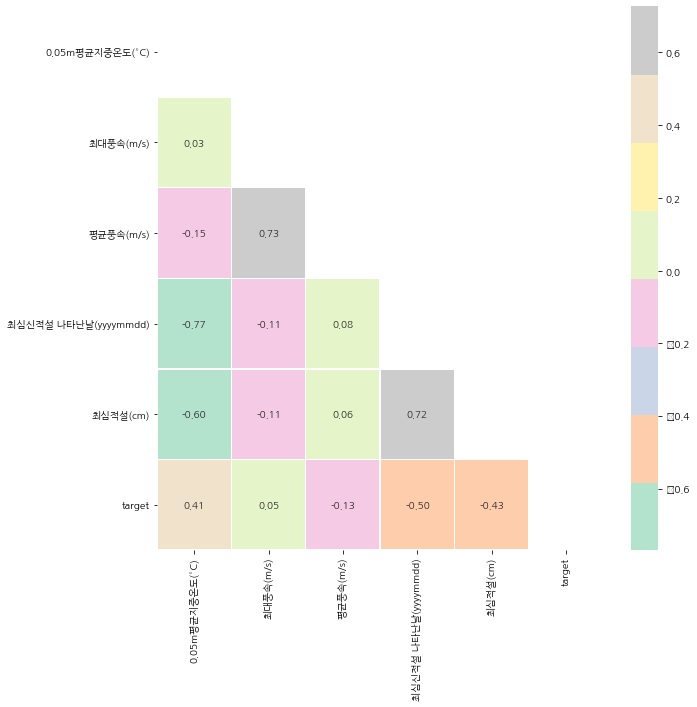

In [344]:
heatmap(GyeongBokGung)

종묘
--

In [326]:
statsmodel(JongMyo)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     4.455
Date:                Thu, 22 Jul 2021   Prob (F-statistic):           6.55e-05
Time:                        09:57:44   Log-Likelihood:                -1179.0
No. Observations:                 108   AIC:                             2378.
Df Residuals:                      98   BIC:                             2405.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.538e+04   4.43e+04      1.025      0.308   -4.24e+04    1.33e+05
평균상대습도(%)       385.6103    403.487      0.956      0.342    -415.097    1186.318
대형일최대증발량(mm)   1874.7929    732.910      2.558      0.012     420.358    3329.228
일조율(%)         -116.9527    362.455     -0.323      0.748    -836.234     602.328
평균풍속(m/s)     -8662.6547   3193.538     -2.713      0.008    -1.5e+04   -2325.182
최대풍속 풍향(16방위)    25.7105     19.770      1.300      0.196     -13.523      64.944
평균운량(1/10)    -1953.0653   3610.873     -0.541      0.590   -9118.724    5212.594
최심신적설(cm)      -719.5537    775.420     -0.928      0.356   -2258.349     819.242
일최다강수량(mm)       11.6962     47.248      0.248      0.805     -82.066     105.458
최소상대습도(%)     -1074.0964    366.884     -2.928      0.004   -1802.166    -346.026
==============================================================================
Omnibus:                       16.527   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.986
Skew:                           0.909   Prob(JB):                     7.54e-05
Kurtosis:                       3.956   Cond. No.                     8.53e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

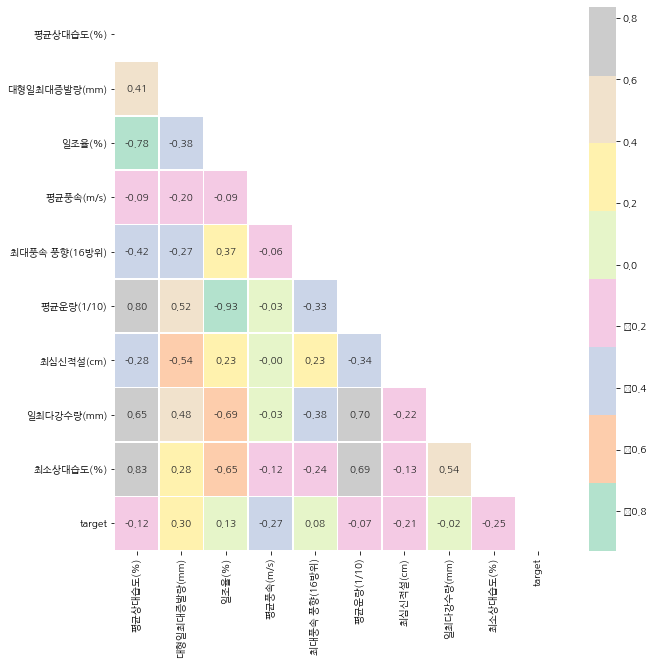

In [345]:
heatmap(JongMyo)

창경궁
--

In [327]:
statsmodel(ChangGyeongGung)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     10.43
Date:                Thu, 22 Jul 2021   Prob (F-statistic):           4.71e-15
Time:                        09:59:44   Log-Likelihood:                -1221.5
No. Observations:                 108   AIC:                             2481.
Df Residuals:                      89   BIC:                             2532.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -2.106e+06   3.06e+06     -0.687      0.494   -8.19e+06    3.98e+06
date                        0.9391     13.986      0.067      0.947     -26.850      28.728
평균최고기온(°C)                1.38e+04   4744.130      2.909      0.005    4374.144    2.32e+04
평균지면온도(°C)              -4890.5906   3145.975     -1.555      0.124   -1.11e+04    1360.395
평균수증기압(hPa)             -4785.1683   2016.608     -2.373      0.020   -8792.126    -778.211
최저기온(°C)                -2612.3795   1305.925     -2.000      0.049   -5207.225     -17.534
최고해면기압(hPa)              1693.5456   1228.225      1.379      0.171    -746.912    4134.003
3시간신적설합(cm)               933.5489    710.631      1.314      0.192    -478.460    2345.558
월합강수량(00~24h만)(mm)         36.6458     22.163      1.654      0.102      -7.391      80.682
최대풍속(m/s)                1008.9678   1654.506      0.610      0.544   -2278.501    4296.436
평균 최저초상온도(°C)           -4024.4472   3016.921     -1.334      0.186      -1e+04    1970.110
평균운량(1/10)               3262.0260   6893.842      0.473      0.637   -1.04e+04     1.7e+04
평균중하층운량(1/10)           -6742.8619   5367.668     -1.256      0.212   -1.74e+04    3922.580
평균해면기압(hPa)               150.2013   2077.693      0.072      0.943   -3978.131    4278.534
평균최저기온(°C)               4782.0504   6973.818      0.686      0.495   -9074.778    1.86e+04
5.0m평균지중온도(°C)          -2823.1936   3140.753     -0.899      0.371   -9063.803    3417.416
대형일최대증발량 나타난날(yyyymmdd)     0.0002      0.000      0.460      0.646      -0.001       0.001
합계 일사량(MJ/m2)             -76.1443     62.369     -1.221      0.225    -200.070      47.781
일조율(%)                    215.7808    641.615      0.336      0.737   -1059.094    1490.656
==============================================================================
Omnibus:                        5.243   Durbin-Watson:                   2.270
Prob(Omnibus):                  0.073   Jarque-Bera (JB):                6.448
Skew:                           0.211   Prob(JB):                       0.0398
Kurtosis:                       4.120   Cond. No.                     2.54e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

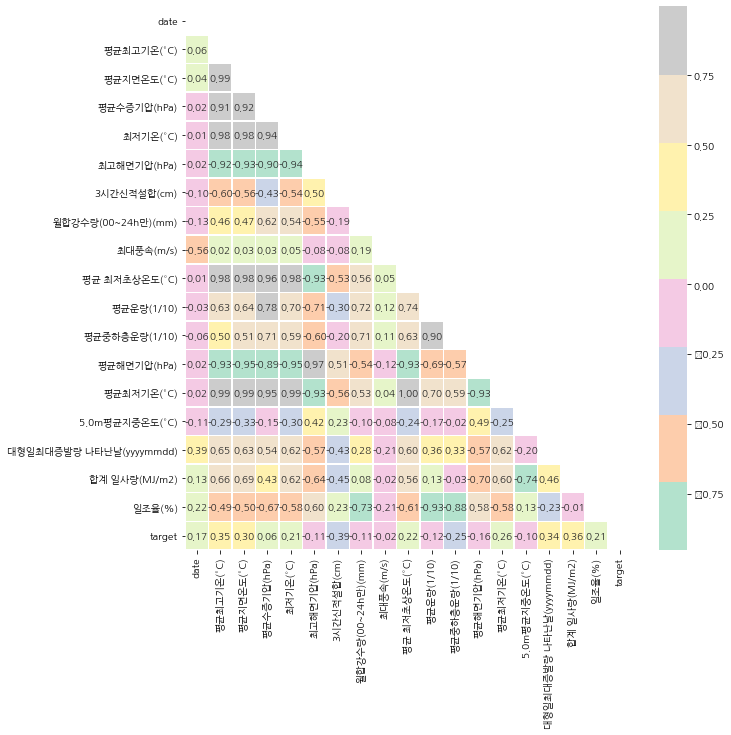

In [346]:
heatmap(ChangGyeongGung)

창덕궁
--

In [328]:
statsmodel(ChangDeokGung)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     8.313
Date:                Thu, 22 Jul 2021   Prob (F-statistic):           7.50e-06
Time:                        10:00:38   Log-Likelihood:                -1318.1
No. Observations:                 108   AIC:                             2646.
Df Residuals:                     103   BIC:                             2660.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           4.598e+05   1.02e+06      0.449      0.654   -1.57e+06    2.49e+06
0.5m평균지중온도(°C)  4265.6616    992.790      4.297      0.000    2296.696    6234.627
소형총증발량(mm)      -209.3236    164.006     -1.276      0.205    -534.592     115.945
최저해면기압(hPa)     -323.4565   1005.862     -0.322      0.748   -2318.346    1671.433
평균중하층운량(1/10)  -2.593e+04   5843.642     -4.437      0.000   -3.75e+04   -1.43e+04
==============================================================================
Omnibus:                       30.623   Durbin-Watson:                   1.483
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.565
Skew:                           1.137   Prob(JB):                     4.28e-14
Kurtosis:                       5.917   Cond. No.                     2.16e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

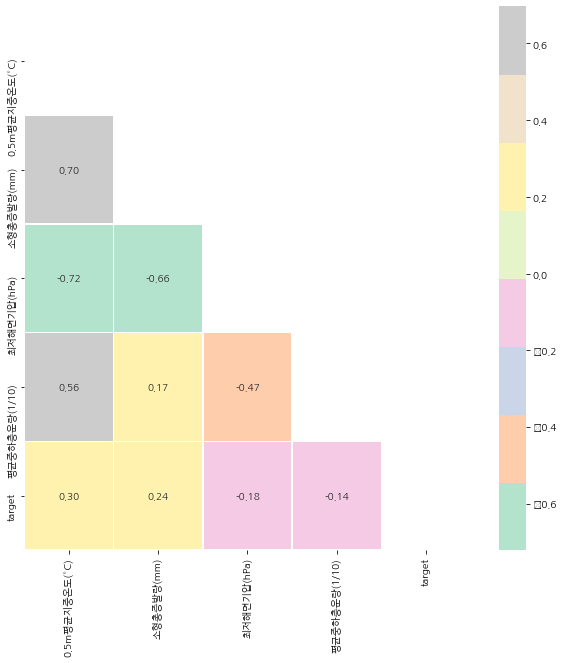

In [347]:
heatmap(ChangDeokGung)

남산골 한옥마을
--

In [329]:
statsmodel(NamSanGolHanOkVillage)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     6.378
Date:                Thu, 22 Jul 2021   Prob (F-statistic):           0.000126
Time:                        10:01:15   Log-Likelihood:                -1303.9
No. Observations:                 108   AIC:                             2618.
Df Residuals:                     103   BIC:                             2631.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             8.8e+04   1.47e+04      5.970      0.000    5.88e+04    1.17e+05
평균최고기온(°C)       -49.7747   2881.627     -0.017      0.986   -5764.802    5665.253
10분최다강수량(mm)   -3114.3911   1102.483     -2.825      0.006   -5300.907    -927.876
0.2m평균지중온도(°C)  2915.4547   3057.141      0.954      0.342   -3147.663    8978.572
최심적설(cm)       -1232.1049   2006.382     -0.614      0.541   -5211.290    2747.080
==============================================================================
Omnibus:                        1.305   Durbin-Watson:                   0.802
Prob(Omnibus):                  0.521   Jarque-Bera (JB):                1.340
Skew:                           0.189   Prob(JB):                        0.512
Kurtosis:                       2.607   Cond. No.                         99.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

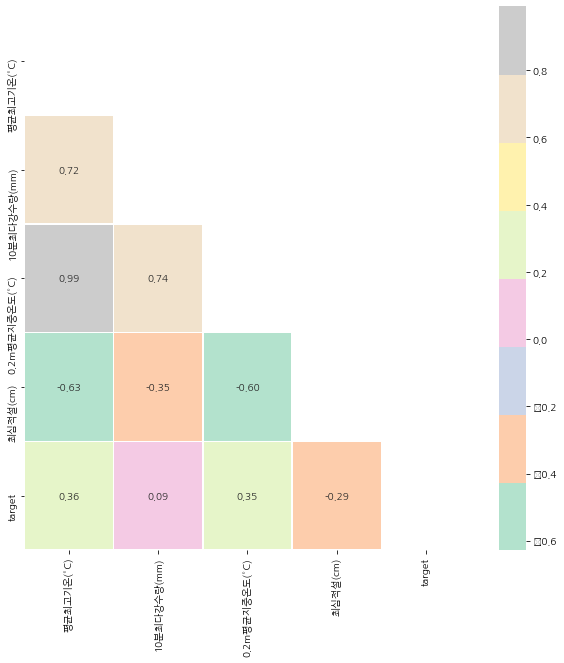

In [348]:
heatmap(NamSanGolHanOkVillage)

덕수궁
--

In [330]:
statsmodel(DuckSooGung)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     8.542
Date:                Thu, 22 Jul 2021   Prob (F-statistic):           8.73e-07
Time:                        10:01:56   Log-Likelihood:                -1320.8
No. Observations:                 108   AIC:                             2654.
Df Residuals:                     102   BIC:                             2670.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -1.649e+07   4.13e+06     -3.992      0.000   -2.47e+07    -8.3e+06
소형일최대증발량 나타난날(yyyymmdd)     0.8231      0.205      4.024      0.000       0.417       1.229
0.2m평균지중온도(°C)           3142.1917    737.772      4.259      0.000    1678.824    4605.559
평균중하층운량(1/10)           -9107.2465   6422.708     -1.418      0.159   -2.18e+04    3632.164
1시간최다강수량(mm)            -1376.7480    574.628     -2.396      0.018   -2516.521    -236.976
최대순간풍속(m/s)               730.8012   1773.764      0.412      0.681   -2787.451    4249.054
==============================================================================
Omnibus:                      110.885   Durbin-Watson:                   1.596
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2049.349
Skew:                           3.299   Prob(JB):                         0.00
Kurtosis:                      23.295   Cond. No.                     1.70e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

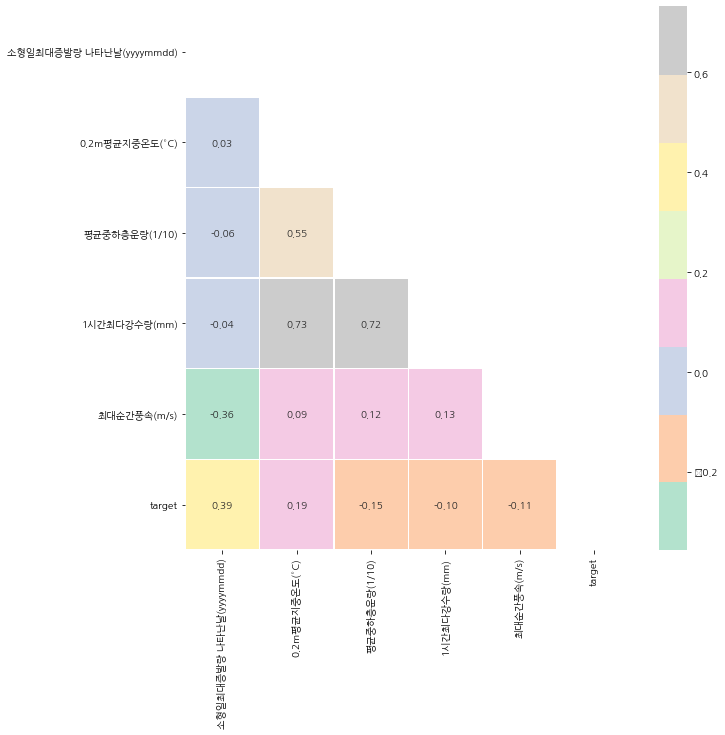

In [349]:
heatmap(DuckSooGung)

서울시립미술관
--

In [331]:
statsmodel(SeoulMuseumOfArt)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1.226
Date:                Thu, 22 Jul 2021   Prob (F-statistic):              0.296
Time:                        10:02:32   Log-Likelihood:                -1342.2
No. Observations:                 108   AIC:                             2700.
Df Residuals:                     100   BIC:                             2722.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.575e+06    5.3e+06     -0.485      0.628   -1.31e+07    7.95e+06
평균상대습도(%)              -827.5582   1592.179     -0.520      0.604   -3986.396    2331.279
최대풍속 풍향(16방위)           -86.9075     92.186     -0.943      0.348    -269.802      95.988
최저해면기압(hPa)            1296.2038   1360.966      0.952      0.343   -1403.914    3996.322
최소상대습도 나타난날(yyyymmdd)     0.0717      0.259      0.277      0.782      -0.441       0.585
5.0m평균지중온도(°C)        -3462.7856   3983.620     -0.869      0.387   -1.14e+04    4440.603
최소상대습도(%)              2304.3253   1605.960      1.435      0.154    -881.854    5490.505
대형일최대증발량(mm)           4931.8698   3862.097      1.277      0.205   -2730.421    1.26e+04
==============================================================================
Omnibus:                       31.755   Durbin-Watson:                   1.179
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.145
Skew:                           1.382   Prob(JB):                     2.13e-11
Kurtosis:                       4.812   Cond. No.                     1.77e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

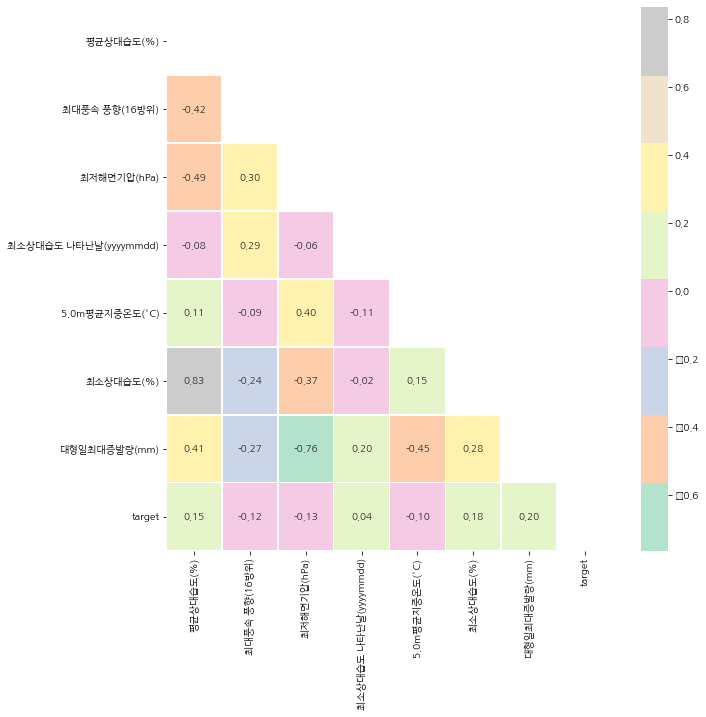

In [351]:
heatmap(SeoulMuseumOfArt)

국립중앙박물관
--

In [332]:
statsmodel(NationalMuseumOfKorea)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     6.596
Date:                Thu, 22 Jul 2021   Prob (F-statistic):           7.01e-07
Time:                        10:03:13   Log-Likelihood:                -1353.5
No. Observations:                 108   AIC:                             2725.
Df Residuals:                      99   BIC:                             2749.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    4.851e+06   6.92e+06      0.701      0.485   -8.88e+06    1.86e+07
date                      -29.4574     33.211     -0.887      0.377     -95.356      36.441
평균수증기압(hPa)              2.095e+04   4164.735      5.031      0.000    1.27e+04    2.92e+04
대형일최대증발량 나타난날(yyyymmdd)     0.0017      0.002      1.059      0.292      -0.001       0.005
대형총증발량(mm)                263.6772    497.301      0.530      0.597    -723.076    1250.430
평균중하층운량(1/10)           -1.253e+04   1.03e+04     -1.222      0.225   -3.29e+04    7814.415
최저초상온도(°C)              -2323.3352   5391.183     -0.431      0.667    -1.3e+04    8373.942
평균해면기압(hPa)              1110.0694   3736.241      0.297      0.767   -6303.443    8523.582
최저기온(°C)                -8239.1495   4805.911     -1.714      0.090   -1.78e+04    1296.821
==============================================================================
Omnibus:                        8.628   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                8.334
Skew:                           0.624   Prob(JB):                       0.0155
Kurtosis:                       3.541   Cond. No.                     1.78e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

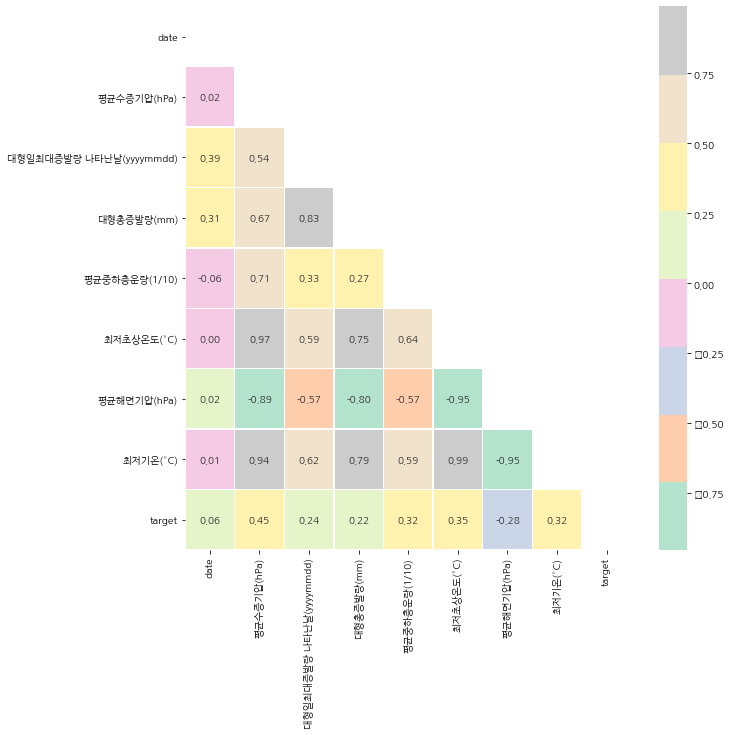

In [360]:
heatmap(NationalMuseumOfKorea)

태릉 · 강릉 · 조선왕릉전시관
--

In [333]:
statsmodel(TaeReungGangNeung)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     13.96
Date:                Thu, 22 Jul 2021   Prob (F-statistic):           1.03e-07
Time:                        10:03:52   Log-Likelihood:                -1071.0
No. Observations:                 108   AIC:                             2150.
Df Residuals:                     104   BIC:                             2161.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -8.724e+05   2.02e+05     -4.319      0.000   -1.27e+06   -4.72e+05
0.05m평균지중온도(°C)   754.5369    128.197      5.886      0.000     500.317    1008.757
최대순간풍속 풍향(16방위)    12.1018      5.618      2.154      0.034       0.961      23.243
평균현지기압(hPa)       860.5422    199.057      4.323      0.000     465.806    1255.279
==============================================================================
Omnibus:                       18.797   Durbin-Watson:                   1.441
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.527
Skew:                           0.991   Prob(JB):                     1.28e-05
Kurtosis:                       4.039   Cond. No.                     4.33e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

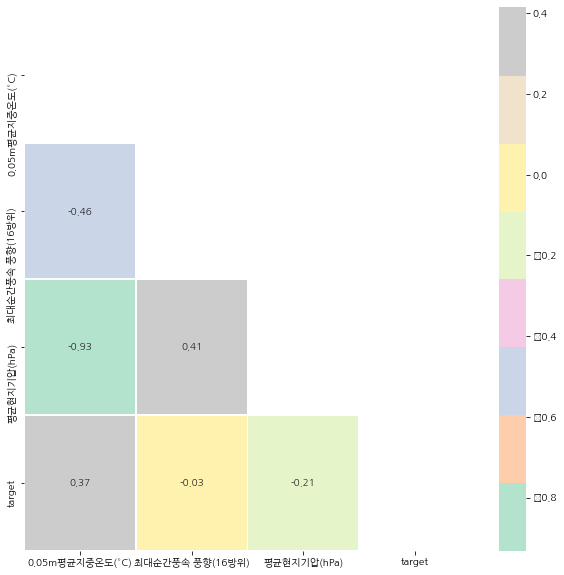

In [361]:
heatmap(TaeReungGangNeung)

서대문자연사박물관
--

In [335]:
statsmodel(SeoDaeMunNaturalHistoryMuseum)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     3.845
Date:                Thu, 22 Jul 2021   Prob (F-statistic):           0.000210
Time:                        10:04:59   Log-Likelihood:                -1115.3
No. Observations:                 108   AIC:                             2253.
Df Residuals:                      97   BIC:                             2282.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -1.273e+05   7.02e+05     -0.181      0.857   -1.52e+06    1.27e+06
평균최고기온(°C)               1195.3058   1933.439      0.618      0.538   -2642.036    5032.647
최대순간풍속(m/s)               356.2269    276.043      1.290      0.200    -191.642     904.096
0.3m평균지중온도(°C)           -204.3551    320.168     -0.638      0.525    -839.799     431.089
소형일최대증발량 나타난날(yyyymmdd)     0.0075      0.035      0.215      0.830      -0.061       0.076
1시간최다강수량 나타난날(yyyymmdd)  5.985e-05      0.000      0.280      0.780      -0.000       0.000
열지수                      -695.5279    804.588     -0.864      0.389   -2292.412     901.357
10분최다강수량(mm)              -23.0703    251.867     -0.092      0.927    -522.957     476.817
평균수증기압(hPa)              1055.2012    581.244      1.815      0.073     -98.407    2208.809
대형일최대증발량(mm)             -600.6844    779.121     -0.771      0.443   -2147.025     945.656
평균중하층운량(1/10)             820.7012   1685.153      0.487      0.627   -2523.861    4165.263
==============================================================================
Omnibus:                       10.702   Durbin-Watson:                   2.548
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               24.029
Skew:                          -0.235   Prob(JB):                     6.06e-06
Kurtosis:                       5.262   Cond. No.                     2.24e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.24e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

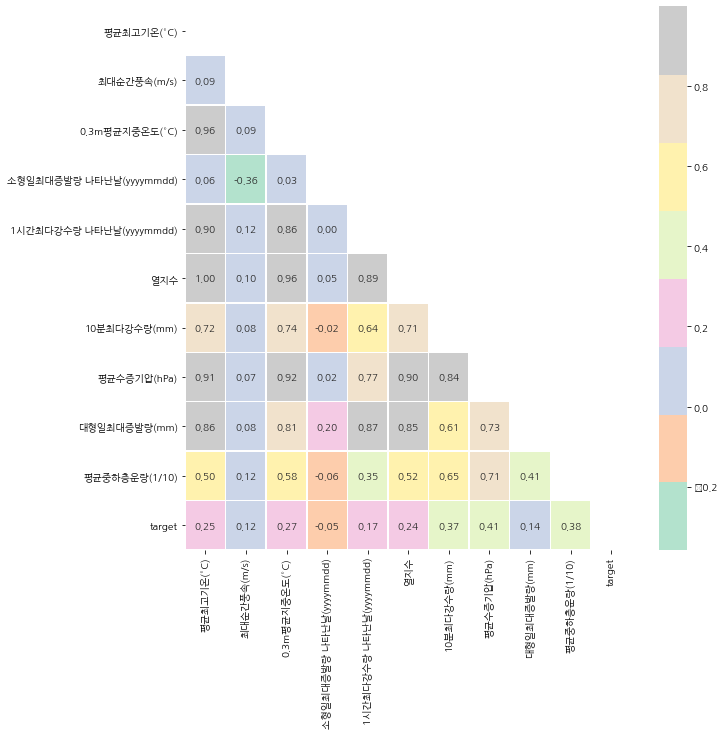

In [362]:
heatmap(SeoDaeMunNaturalHistoryMuseum)

서대문형무소역사관
--

In [336]:
statsmodel(SeoDaeMunPrisonHistoryMuseum)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     5.700
Date:                Thu, 22 Jul 2021   Prob (F-statistic):           2.48e-06
Time:                        10:05:51   Log-Likelihood:                -1244.3
No. Observations:                 108   AIC:                             2509.
Df Residuals:                      98   BIC:                             2535.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -4.198e+06   2.16e+06     -1.942      0.055   -8.49e+06    9.23e+04
1.5m평균지중온도(°C)           1152.1547    723.705      1.592      0.115    -284.014    2588.323
소형일최대증발량(mm)              646.3154   1662.933      0.389      0.698   -2653.721    3946.352
소형일최대증발량 나타난날(yyyymmdd)     0.2492      0.104      2.405      0.018       0.044       0.455
평균현지기압(hPa)              -711.1815    833.199     -0.854      0.395   -2364.638     942.275
최다풍향(16방위)                  2.8932     34.233      0.085      0.933     -65.041      70.827
3시간신적설합(cm)              -528.6296   1382.159     -0.382      0.703   -3271.478    2214.219
평균상대습도(%)               -1217.0765    530.933     -2.292      0.024   -2270.696    -163.457
최심적설(cm)                   17.0791   2490.591      0.007      0.995   -4925.418    4959.577
최심신적설 나타난날(yyyymmdd)       -0.0008      0.000     -1.692      0.094      -0.002       0.000
==============================================================================
Omnibus:                        7.650   Durbin-Watson:                   2.263
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                7.301
Skew:                           0.614   Prob(JB):                       0.0260
Kurtosis:                       3.336   Cond. No.                     1.85e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

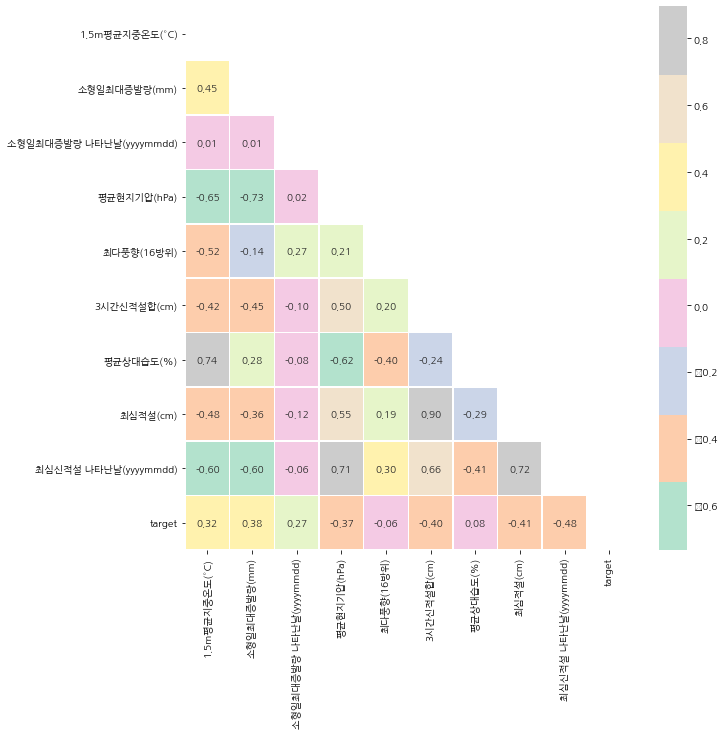

In [363]:
heatmap(SeoDaeMunPrisonHistoryMuseum)

트릭아이미술관
--

In [337]:
statsmodel(TrickEyeMuseum)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     14.38
Date:                Thu, 22 Jul 2021   Prob (F-statistic):           2.33e-09
Time:                        10:06:40   Log-Likelihood:                -1125.7
No. Observations:                 108   AIC:                             2261.
Df Residuals:                     103   BIC:                             2275.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    3.292e+06    6.3e+05      5.229      0.000    2.04e+06    4.54e+06
소형일최대증발량 나타난날(yyyymmdd)    -0.1634      0.031     -5.231      0.000      -0.225      -0.101
0.05m평균지중온도(°C)            88.3970    108.594      0.814      0.418    -126.974     303.768
최소상대습도(%)                 536.2532    135.516      3.957      0.000     267.489     805.017
3시간신적설합(cm)               109.2811    224.930      0.486      0.628    -336.815     555.377
==============================================================================
Omnibus:                      145.902   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5316.051
Skew:                           4.778   Prob(JB):                         0.00
Kurtosis:                      36.016   Cond. No.                     1.58e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

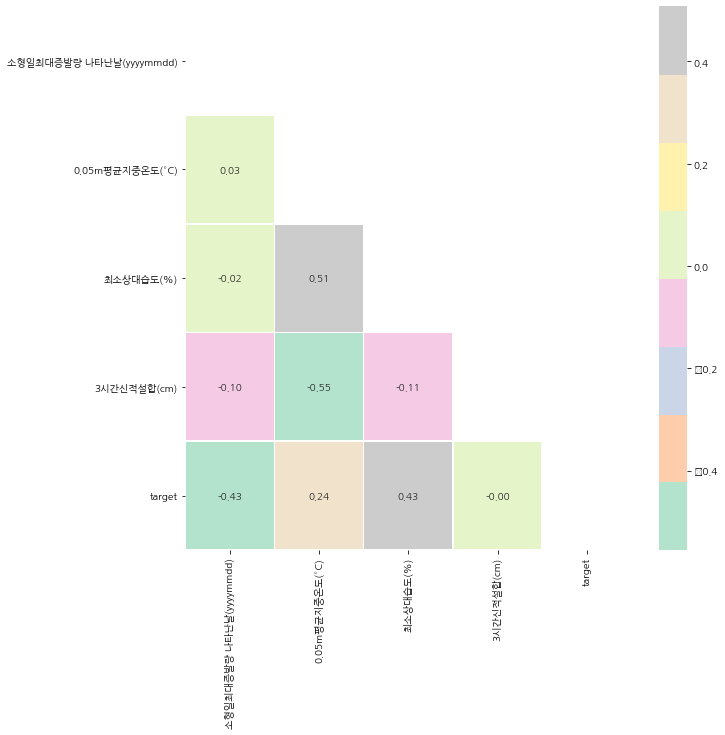

In [364]:
heatmap(TrickEyeMuseum)

헌릉ㆍ인릉
--

In [339]:
statsmodel(HeonLeungInReung)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     42.61
Date:                Thu, 22 Jul 2021   Prob (F-statistic):           2.83e-14
Time:                        10:08:11   Log-Likelihood:                -938.62
No. Observations:                 108   AIC:                             1883.
Df Residuals:                     105   BIC:                             1891.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           4065.9367    404.716     10.046      0.000    3263.459    4868.415
0.5m평균지중온도(°C)   170.7793     18.974      9.001      0.000     133.157     208.401
평균중하층운량(1/10)  -1042.6770    153.998     -6.771      0.000   -1348.026    -737.328
==============================================================================
Omnibus:                        0.723   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.697   Jarque-Bera (JB):                0.364
Skew:                           0.111   Prob(JB):                        0.833
Kurtosis:                       3.177   Cond. No.                         52.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

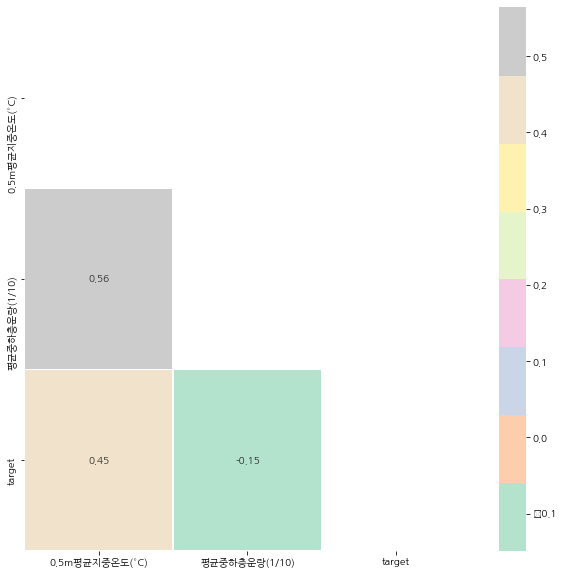

In [365]:
heatmap(HeonLeungInReung)

선릉·정릉
--

In [340]:
statsmodel(SunReungJungReung)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     14.55
Date:                Thu, 22 Jul 2021   Prob (F-statistic):           1.87e-09
Time:                        10:09:05   Log-Likelihood:                -1154.4
No. Observations:                 108   AIC:                             2319.
Df Residuals:                     103   BIC:                             2332.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5858.3525   7382.188     -0.794      0.429   -2.05e+04    8782.476
평균 최저초상온도(°C)  1713.9331    666.047      2.573      0.011     392.986    3034.880
최저초상온도(°C)    -1175.1665    604.505     -1.944      0.055   -2374.059      23.726
합계 일조시간(hr)     127.8275     25.744      4.965      0.000      76.770     178.885
최다풍향(16방위)      -11.8798     13.380     -0.888      0.377     -38.416      14.656
==============================================================================
Omnibus:                       44.990   Durbin-Watson:                   1.242
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.919
Skew:                           1.406   Prob(JB):                     8.42e-35
Kurtosis:                       8.193   Cond. No.                     2.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

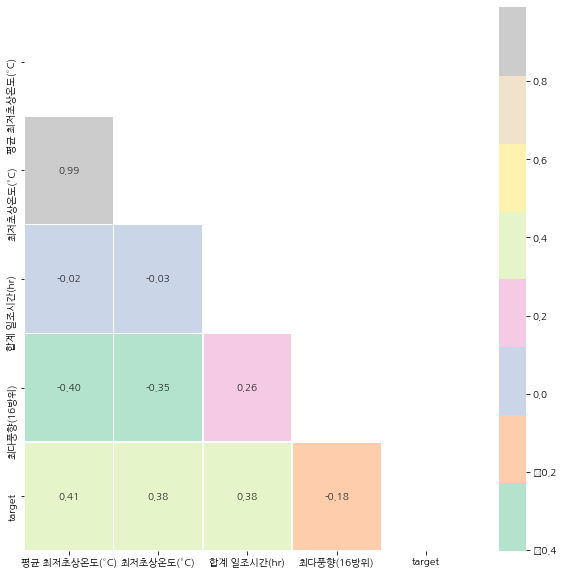

In [366]:
heatmap(SunReungJungReung)

# Hypothesis 1. MODEL Focusing to 2019 TEST

첫 칼럼부터 마지막까지 칼럼별로 모델 9개가 돌면서 한 칼럼의 best였던 model name, columns number, rmse, smape, train_score(=model.score(x_train, y_train)),
test_score(=model.score(x_test, y_test) 를 출력하고 칼럼별로 데이터프레임에 적재한 후, 다시 그 데이터프레임의 best를 출력한 뒤 저장합니다. 그렇게 더 이상 test_score가 떨어지지 않는 지점에서 칼럼 추가를 멈춥니다.


장점: 

1) 2019년 실제 관광객수를 맞추는데 모든 부분에서 가장 최적화 되어 있음.

단점: 

1) 통계적으로 이유가 설명이 되지 않음. 

2) 2019년 관광지의 관광객을 맞추는데에만 초점이 맞춰져 있기 때문에, 만약 test가 바뀐다면, 모델의 정확도가 크게 휘둘릴 수 있음. 또한, 실제값이 있었기 때문에,
정교화해서 모델이 예측을 하게 만들 수 있었으나, 만약 실제값이 그 때 그 때 다르게 들어오는 상황이였다면, 최악의 방법이 될 수 있음.

장점이자 단점:

1) 모델별로 최적 칼럼이 있다고 가정하면, 이러한 부분에서 추가되는 칼럼이 전부 섞일 수 있음. 그러나, 이 논리대로라면 A모델의 최적칼럼을 계속 추가해주면 다른 모델들 보다 A모델이 계속 best여야 하는데, 그렇지 않은 상황이 실제로도 발생했음. 즉, 다른 시선에서 본다면, 이렇게 모델의 순위가 역전되는 상황까지 고려한 것으로 볼 수도 있음.



다음편 (최적칼럼찾기 2편)에서는

Hypothesis 2. BIC Focusing to Tourist for Tourist Destination
--

Hypothesis 1. MODEL Focusing to 2019 TEST의 이러한 단점을 보완하기 위해,  

Statsmodel의 BIC가 낮아지지 않는 지점까지 변수를 추가하는 방식으로 진행하도록 한다.


 -- 끝 --
 --